## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 4: EM, Heirarchical Clustering and HMM
### Total Points: 100 points

In Assignment 4, you will: 1. implement expectation-maximization to train a word-sense induction system; 2. implement Heirarchical Clustering for Name Entity Tagging; 3. implement Viterbi Algorithm based on Hidden Markov Model for Part-of-speech tagging. We recommend you to start this assignment a little early and fully understand these algorithms before jumping into coding. 

# Q1. Expectation Maximization ( points) 

For this part, you will implement question 4 of chapter 5 from the reference book: Introduction to Natural Language Processing (Jacob Eisentein). We recommend you to read from the beginning of chapter 5 to section 5.2.1. Here are some formulas for reference:

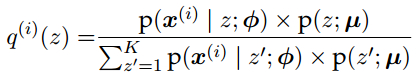

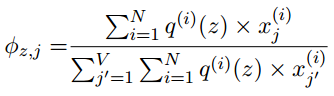

Use expectation-maximization clustering to train a word-sense induction system, applied to the word 'say'.  
• 1.1 Import NLTK, run NLTK.DOWNLOAD() and select SEMCOR. Import SEMCOR from NLTK.CORPUS.  
• 1.2 The command SEMCOR.TAGGED_SENTS(TAG=’SENSE’) returns an iterator over sense-tagged sentences in the corpus. Each sentence can be viewed as an iterator over TREE objects. For TREE objects that are sense-annotated words, you can access the annotation as TREE.LABEL(), and the word itself with TREE.LEAVES(). So SEMCOR.TAGGED_SENTS(TAG=’SENSE’)[0][2].LABEL() would return the sense annotation of the third word in the first sentence.  
• 1.3 Extract all sentences containing the senses SAY.V.01 and SAY.V.02.  
• 2. Build bag-of-words vectors x(i), containing the counts of other words in those sentences, including all words that occur in at least two sentences.  
• 3.1 Implement and run expectation-maximization clustering on the merged data.  
• 3.2 Compute the frequency with which each cluster includes instances of SAY.V.01 and SAY.V.02.

The following code is based on Multinomial distribution. You are free to use another one, like Gaussian distribution.

In [429]:
!pip3 install svgling
import svgling

import nltk
nltk.download('semcor')
from nltk.corpus import semcor

import numpy as np
from scipy.stats import multinomial

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


[nltk_data] Downloading package semcor to /Users/neo/nltk_data...
[nltk_data]   Package semcor is already up-to-date!


In [454]:
iterator = semcor.tagged_sents(tag='sense')
print(len(iterator))
#print(iterator)
# for obj in iterator:
#     #print(obj)
#     for treeObj in obj:
# #         print(treeObj)
#         print(treeObj.leaves())
#         print(treeObj.leaves())
# tree.label()
# tree.leaves()
# sentence_fetch = semcor.tagged_sents(tag='sense')[0][2]
# print(sentence_fetch)
#semcor.words()
# semcor.chunks()
# semcor.sents()

AttributeError: 'SemcorSentence' object has no attribute 'leaves'

## 1. Extract all sentences containing the senses SAY.V.01 and SAY.V.02.

In [ ]:
# get tagged sentences
tagged_sents = semcor.tagged_sents(tag='sense')

# tokenize sentences
sentences = []
tokens = set()



# counts of sentences with say.v.01/say.v.02
labels = [] #1/2
labels1_cnt = 0
labels2_cnt = 0


#for tagged_sts in tagged_sents:
  ### Your Code Goes Here ###       
say_word = None             
for i in range(len(tagged_sents)):
    tagged_sts = tagged_sents[i]    
#     print(tagged_sts)
    print("tagged sentence")
    say_word = None
    for j in range(len(tagged_sts)): 
        
         label = tagged_sts[j].label()
         print(label)
         if str(label) == "Lemma('state.v.01.say')":      
            labels1_cnt +=1
            labels.append(1)
            say_word = True
            print("test")
         elif str(label) == "Lemma('state.v.02.say')":
            labels2_cnt +=1
            say_word = True
            labels.append(2)
            print("test")
    if say_word == True:
        sentences.append(semcor.sents()[i])




#for tagged_sts in tagged_sents:
  ## Your Code Goes Here ###       
# say_word = None             
# for i in range(len(tagged_sents)):
#     tagged_sts = tagged_sents[i]    
# #     print(tagged_sts)
#     print("tagged sentence")
#     say_word = None
#     for j in range(len(tagged_sts)): 
        
#          label = tagged_sts[j].label()
#          print(label)
#          if str(label) == "Lemma('state.v.01.say')":      
#             labels1_cnt +=1
#             labels.append(1)
#             say_word = True
#             print("test")
#             sentences.append(tagged_sts[j].leaves())
#          if str(label) == "Lemma('state.v.02.say')":
#             labels2_cnt +=1
#             say_word = True
#             labels.append(2)
#             print("test")
#             sentences.append(tagged_sts[j].leaves())
#     if say_word == True:
#         sentences.append(semcor.sents()[i])
        
        
        
        
        
# for tagged_sts in tagged_sents:

#   ### Your Code Goes Here ###

#     sent = []

#     label = 0

#     tree_label = []

#     for tree in tagged_sts:

#         if (str(tree.label()))=="Lemma('state.v.01.say')":

#             tree_label.append(str(tree.label()))

#             continue

#             sent+=tree.leaves()
#         if (str(tree.label()))=="Lemma('state.v.02.say')":

#             tree_label.append(str(tree.label()))

#             continue

#             sent+=tree.leaves()



#     if "Lemma('state.v.01.say')" in tree_label:

#         labels1_cnt+=1

#         sentences.append(sent)

#         labels.append(1)

#         tokens = tokens.union(sent)

#     elif "Lemma('state.v.02.say')" in tree_label:

#         labels2_cnt+=1

#         sentences.append(sent)

#         labels.append(2)

#         tokens = tokens.union(sent)
        
        
 
        

tagged sentence
DT
Lemma('group.n.01.group')
Lemma('state.v.01.say')
test
Lemma('friday.n.01.Friday')
DT
Lemma('probe.n.01.investigation')
IN
Lemma('atlanta.n.01.Atlanta')
POS
Lemma('late.s.03.recent')
Lemma('primary.n.01.primary_election')
Lemma('produce.v.04.produce')
None
DT
Lemma('evidence.n.01.evidence')
None
IN
DT
Lemma('abnormality.n.04.irregularity')
Lemma('happen.v.01.take_place')
None
tagged sentence
DT
Lemma('jury.n.01.jury')
Lemma('far.r.02.far')
Lemma('state.v.01.say')
test
IN
Lemma('term.n.02.term')
Lemma('end.n.02.end')
Lemma('presentment.n.01.presentment')
IN
DT
Lemma('group.n.01.group')
None
WDT
Lemma('own.v.01.have')
Lemma('overall.s.02.overall')
Lemma('mission.n.03.charge')
IN
DT
Lemma('election.n.01.election')
None
None
Lemma('deserve.v.01.deserve')
DT
Lemma('praise.n.01.praise')
CC
Lemma('thanks.n.01.thanks')
IN
DT
Lemma('location.n.01.location')
None
IN
DT
Lemma('manner.n.01.manner')
RB
RB
DT
Lemma('election.n.01.election')
VBD
Lemma('conduct.v.01.conduct')
None
t

tagged sentence
Lemma('person.n.01.person')
Lemma('add.v.02.add')
IN
Lemma('enthusiasm.n.03.enthusiasm')
VBD
Lemma('turn_around.v.03.pick_up')
IN
DT
Lemma('state.n.01.state')
Lemma('rally.n.01.rally')
TO
VB
Lemma('hold.v.03.hold')
Lemma('september.n.01.Sept')
CD
IN
Lemma('savannah.n.01.Savannah')
IN
WDT
Lemma('newly.r.01.newly')
Lemma('elective.a.01.elected')
Lemma('texas.n.01.Texas')
Lemma('person.n.01.person')
MD
Lemma('be.v.02.be')
DT
Lemma('featured.s.01.featured')
Lemma('speaker.n.01.speaker')
None
tagged sentence
IN
DT
Lemma('location.n.01.location')
Lemma('meeting.n.01.meeting')
None
DT
Lemma('audience.n.01.audience')
VBD
Lemma('warn.v.01.warn')
IN
Lemma('enroll.v.01.enter')
DT
Lemma('campaigner.n.01.candidate')
IN
Lemma('governor.n.01.governor')
MD
Lemma('coerce.v.01.force')
PRP
TO
Lemma('bring.v.01.take')
Lemma('request.n.01.petition')
out.r.00
IN
Lemma('voting_precinct.n.01.voting_precinct')
TO
Lemma('obtain.v.01.obtain')
DT
Lemma('signature.n.01.signature')
IN
Lemma('registe

tagged sentence
IN
Lemma('stress.v.01.emphasize')
IN
Lemma('technical.a.01.technical')
Lemma('detail.n.01.detail')
VBD
Lemma('not.r.01.not')
Lemma('fully.r.01.fully')
Lemma('work_out.v.01.work_out')
None
Lemma('person.n.01.person')
Lemma('state.v.01.say')
test
PRP$
Lemma('resolution.n.01.resolution')
MD
Lemma('search.v.01.seek')
TO
Lemma('allow.v.04.set_aside')
DT
Lemma('prerogative.n.01.privilege')
Lemma('resolution.n.01.resolution')
WDT
DT
Lemma('group.n.01.group')
Lemma('vote.v.01.vote')
IN
CD
None
CD
None
tagged sentence
DT
Lemma('similar.a.01.similar')
Lemma('resolution.n.01.resolution')
Lemma('pass.v.09.pass')
IN
DT
Lemma('senate.n.01.senate')
IN
DT
Lemma('vote.n.01.vote')
IN
Lemma('twenty-nine.n.01.29')
None
Lemma('five.n.01.5')
None
tagged sentence
IN
IN
Lemma('sunday.n.01.Sunday')
Lemma('night.n.01.night')
None
EX
Lemma('exist.v.01.be')
DT
Lemma('word.n.02.word')
IN
DT
Lemma('resolution.n.01.resolution')
VBG
Lemma('offer.v.02.offer')
Lemma('there.r.01.there')
TO
Lemma('revoke.

tagged sentence
None
EX
Lemma('be.v.02.be')
n't.r.00
Lemma('a_bit.r.01.a_bit')
IN
Lemma('fuss.n.02.trouble')
None
None
tagged sentence
Lemma('committee.n.01.committee')
Lemma('blessing.n.01.approval')
IN
Lemma('person.n.01.person')
POS
None
Lemma('abandoned.s.01.abandoned')
Lemma('property.n.01.property')
None
Lemma('act.n.01.act')
Lemma('look.v.02.seem')
Lemma('certain.a.04.certain')
Lemma('thursday.n.01.Thursday')
IN
DT
Lemma('adamant.s.01.adamant')
Lemma('protest.n.01.protest')
IN
Lemma('texas.n.01.Texas')
Lemma('banker.n.01.banker')
None
tagged sentence
Lemma('person.n.01.person')
Lemma('personally.r.01.personally')
Lemma('head.v.02.lead')
DT
Lemma('fight.n.02.fight')
VB
DT
Lemma('bill.n.01.measure')
None
WDT
PRP
VBD
Lemma('water_down.v.01.water_down')
Lemma('well.r.07.considerably')
IN
PRP$
Lemma('rejection.n.01.rejection')
IN
Lemma('two.s.01.two')
Lemma('former.s.03.previous')
Lemma('legislature.n.01.legislature')
None
IN
DT
Lemma('public.a.01.public')
Lemma('hearing.n.01.hearing

tagged sentence
None
CC
PRP
Lemma('believe.v.03.believe')
IN
Lemma('people.n.01.people')
Lemma('be.v.01.be')
Lemma('better.r.01.better')
Lemma('inform.v.01.inform')
JJ
DT
Lemma('question.n.02.question')
None
JJ
PRP
MD
Lemma('fight.v.02.oppose')
PRP
Lemma('besides.r.02.also')
None
tagged sentence
PRP
Lemma('willing.a.01.willing')
TO
Lemma('bet_on.v.01.stake')
PRP$
Lemma('political.a.03.political')
Lemma('career.n.01.career')
Lemma('thereon.r.01.on_it')
None
None
tagged sentence
Lemma('person.n.01.person')
None
DT
Lemma('ex-gambler.n.01.ex-gambler')
IN
Lemma('location.n.01.location')
None
VBD
Lemma('elect.v.01.elect')
IN
PRP$
Lemma('advocacy.n.01.advocacy')
IN
Lemma('bet_on.v.01.bet_on')
DT
Lemma('pony.n.02.pony')
None
tagged sentence
DT
Lemma('group.n.01.group')
Lemma('committee.n.01.committee')
WDT
Lemma('hear.v.03.hear')
PRP$
Lemma('local_option.n.01.local_option')
Lemma('proposal.n.01.proposal')
VBZ
Lemma('expect.v.01.expect')
TO
Lemma('give.v.05.give')
PRP
DT
Lemma('favorable.a.01.f

tagged sentence
Lemma('person.n.01.person')
IN
Lemma('location.n.01.location')
Lemma('insist.v.01.insist')
IN
DT
Lemma('water_development.n.01.water_development')
Lemma('bill.n.01.bill')
Lemma('legislate.v.01.pass')
VB
DT
Lemma('texas.n.01.Texas')
Lemma('united_states_house_of_representatives.n.01.House_of_Representatives')
Lemma('be.v.03.be')
DT
Lemma('attempt.n.01.effort')
IN
Lemma('large.a.01.big')
Lemma('city.n.01.city')
IN
Lemma('dallas.n.01.Dallas')
CC
Lemma('fort_worth.n.01.Fort_Worth')
TO
cover_up.v.00
Lemma('place.n.04.place')
IN
Lemma('location.n.01.location')
None
DT
Lemma('location.n.01.location')
Lemma('hamlet.n.01.hamlet')
IN
CD
Lemma('people.n.01.people')
None
tagged sentence
WRB
DT
Lemma('cheering.n.01.shouting')
Lemma('end.v.03.end')
None
DT
Lemma('bill.n.01.bill')
Lemma('pass.v.09.pass')
None
CD
TO
Lemma('four.n.01.4')
None
Lemma('send.v.01.send')
PRP
TO
DT
Lemma('senate.n.01.senate')
None
WRB
DT
Lemma('similar.a.01.similar')
Lemma('proposal.n.01.proposal')
VBZ
VBG
Le

tagged sentence
None
PRP
VB
Lemma('solve.v.01.solve')
DT
Lemma('problem.n.01.problem')
WDT
VBP
Lemma('impel.v.01.force')
DT
Lemma('people.n.01.people')
TO
Lemma('depend_on.v.01.depend_upon')
Lemma('group.n.01.group')
IN
Lemma('subsistence.n.01.subsistence')
None
None
Lemma('person.n.01.person')
Lemma('state.v.01.say')
test
None
tagged sentence
DT
Lemma('bulk.n.02.volume')
IN
Lemma('group.n.01.group')
Lemma('case.n.06.case')
MD
Lemma('decrease.v.01.decrease')
None
Lemma('person.n.01.person')
Lemma('report.v.01.report')
None
WRB
DT
Lemma('community.n.01.community')
Lemma('be.v.01.be')
Lemma('able.a.01.able')
VB
Lemma('cope.v.01.deal')
Lemma('efficaciously.r.01.effectively')
IN
Lemma('two.s.01.two')
Lemma('problem.n.01.problem')
None
Lemma('relatively.r.01.relatively')
Lemma('limited.a.01.limited')
Lemma('skill.n.01.skill')
CC
Lemma('discrimination.n.01.discrimination')
IN
Lemma('employment.n.03.employment')
IN
IN
Lemma('color.n.04.color')
None
tagged sentence
DT
None
PRP
Lemma('state.v.0

tagged sentence
None
PRP
Lemma('feel.v.04.feel')
Lemma('well.r.01.good')
Lemma('physically.r.01.physically')
None
None
Lemma('person.n.01.person')
Lemma('add.v.02.add')
None
None
CC
PRP
Lemma('think.v.02.think')
PRP
MD
Lemma('be_active.v.01.move')
Lemma('better.r.01.better')
Lemma('hold.v.14.carry')
Lemma('a_bit.r.01.a_little')
Lemma('less.a.01.less')
Lemma('weight.n.01.weight')
IN
PRP
Lemma('hold.v.14.carry')
Lemma('nowadays.r.01.now')
None
None
tagged sentence
DT
Lemma('gangling.s.01.rangy')
None
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
Lemma('native.n.01.native')
None
DT
Lemma('surprise.n.02.surprise')
Lemma('slug.v.01.slug')
Lemma('ace.n.03.sensation')
IN
DT
Lemma('group.n.01.group')
Lemma('last.s.01.last')
Lemma('year.n.01.year')
Lemma('besides.r.02.as_well')
IN
DT
Lemma('defensive.a.01.defensive')
Lemma('ace.n.03.whiz')
None
Lemma('determine.v.03.set')
None
Lemma('improved.a.01.improved')
Lemma('fielding.n.01.fielding')
None
IN
PRP$
CD
Lemma('goal

tagged sentence
ex.s.00
Lemma('group.n.01.group')
Lemma('person.n.01.person')
None
Lemma('nowadays.r.01.now')
Lemma('catching.n.01.catching')
IN
DT
DT
VBZ
Lemma('be.v.01.be')
DT
IN
DT
Lemma('group.n.01.group')
POS
CD
Lemma('expansion.n.01.expansion')
TO
DT
Lemma('location.n.01.location')
None
tagged sentence
None
CC
PRP
MD|VB
VB
Lemma('tokyo.n.01.Tokyo')
None
Lemma('besides.r.02.too')
None
None
Lemma('add.v.02.add')
Lemma('person.n.01.person')
None
tagged sentence
None
Lemma('then.r.02.then')
PRP
MD
Lemma('truly.r.01.really')
Lemma('own.v.01.have')
RB
TO
Lemma('travel.v.01.go')
None
None
tagged sentence
Lemma('acquire.v.05.gain')
PRP$
Lemma('second.s.01.second')
Lemma('straight.s.01.straight')
Lemma('victory.n.01.victory')
None
Lemma('person.n.01.person')
POS
NE
None
DT
Lemma('three.s.01.3')
None
Lemma('year.n.01.year')
Lemma('old.a.01.old')
Lemma('filly.n.01.filly')
None
Lemma('down.v.03.down')
Lemma('promising.s.01.promising')
Lemma('colt.n.01.colt')
IN
DT
None
CD
NE
None
Lemma('spor

tagged sentence
None
RB
PRP
Lemma('get_down.v.07.start')
Lemma('drill.v.03.practice')
RB
RB
IN
Lemma('spring_training.n.01.spring_training')
None
tagged sentence
Lemma('person.n.01.person')
VBD
Lemma('annoy.v.01.bother')
IN
DT
Lemma('first.a.01.first')
Lemma('two.s.01.two')
Lemma('game.n.02.game')
DT
Lemma('year.n.01.year')
IN
DT
Lemma('pull.v.08.pull')
Lemma('muscle.n.01.muscle')
IN
DT
Lemma('thigh.n.01.thigh')
IN
PRP$
Lemma('right.a.01.right')
None
Lemma('kick.v.01.kick')
None
Lemma('leg.n.01.leg')
CC
None
IN
DT
Lemma('result.n.03.result')
None
several.s.01
IN
PRP$
Lemma('successful.a.01.successful')
Lemma('conversion.n.03.conversion')
VBP
Lemma('travel.v.01.go')
Lemma('barely.r.01.barely')
Lemma('far.r.02.far')
Lemma('enough.r.01.enough')
None
tagged sentence
Lemma('person.n.01.person')
Lemma('state.v.01.say')
test
Lemma('monday.n.01.Monday')
PRP$
Lemma('leg.n.01.leg')
Lemma('feel.v.04.feel')
Lemma('very_well.r.02.fine')
CC
None
IN
DT
Lemma('result.n.03.result')
None
PRP
Lemma('hope

tagged sentence
PRP
VBD
n't.r.00
None
Lemma('monday.n.01.Monday')
None
PRP
Lemma('own.v.01.have')
Lemma('four.s.01.four')
Lemma('group.n.01.group')
IN
DT
Lemma('top.a.01.top')
Lemma('four.s.01.four')
None
tagged sentence
DT
Lemma('good.a.01.good')
Lemma('spirit.n.02.feeling')
Lemma('prevail.v.02.prevail')
VB
DT
Lemma('group.n.01.group')
Lemma('coach.v.01.coach')
Lemma('staff.n.03.staff')
Lemma('monday.n.01.Monday')
None
CC
Lemma('attention.n.01.attention')
Lemma('quickly.r.01.quickly')
Lemma('change_state.v.01.turn')
IN
Lemma('saturday.n.01.Saturday')
POS
Lemma('victory.n.01.victory')
TO
next.s.01
Lemma('week.n.01.week')
POS
Lemma('problem.n.01.problem')
None
Lemma('group.n.01.group')
None
tagged sentence
DT
Lemma('group.n.01.group')
VBP
n't.r.00
Lemma('play.v.01.play')
DT
Lemma('week.n.01.week')
None
tagged sentence
None
PRP
VBP
Lemma('merely.r.01.just')
Lemma('very.r.01.real')
Lemma('happy.a.01.happy')
IN
DT
Lemma('player.n.01.player')
None
None
Lemma('coach.n.01.coach')
Lemma('perso

tagged sentence
PRP
MD
Lemma('exercise.v.04.work_out')
IN
DT
Lemma('hour.n.01.hour')
IN
Lemma('saturday.n.01.Saturday')
None
Lemma('then.r.01.then')
PRP
MD
Lemma('exercise.v.03.work')
Lemma('monday.n.01.Monday')
CC
Lemma('tuesday.n.01.Tuesday')
IN
next.s.01
Lemma('week.n.01.week')
None
Lemma('then.r.01.then')
Lemma('taper_off.v.01.taper_off')
None
None
tagged sentence
Lemma('group.n.01.group')
MD
Lemma('play.v.01.play')
DT
Lemma('group.n.01.group')
IN
Lemma('location.n.01.location')
IN
Lemma('houston.n.01.Houston')
IN
DT
Lemma('night_game.n.01.night_game')
Lemma('saturday.n.01.Saturday')
None
Lemma('october.n.01.Oct')
CD
None
tagged sentence
None
Lemma('keep.v.01.hold')
IN
Lemma('group.n.01.group')
POS
Lemma('sweat_suit.n.01.sweat_suit')
Lemma('drill.v.03.drill')
Lemma('monday.n.01.Monday')
IN
Lemma('group.n.01.group')
VBD
Lemma('tackle.n.01.tackle')
Lemma('person.n.01.person')
None
WP
VBZ
undergo.v.00
Lemma('treatment.n.01.treatment')
IN
DT
Lemma('leg.n.01.leg')
Lemma('injury.n.02.inj

tagged sentence
DT
Lemma('early.a.01.early')
Lemma('group.n.01.group')
Lemma('football.n.01.football')
Lemma('leader.n.01.leader')
None
Lemma('group.n.01.group')
None
Lemma('group.n.01.group')
CC
Lemma('group.n.01.group')
None
Lemma('make.v.03.make')
DT
Lemma('large.a.01.big')
Lemma('dent.n.01.dent')
IN
DT
Lemma('statistic.n.01.statistic')
Lemma('last.s.01.last')
Lemma('week.n.01.week')
None
tagged sentence
Lemma('group.n.01.group')
None
CD
None
Lemma('yard.n.01.yard')
Lemma('spree.n.01.spree')
IN
Lemma('group.n.01.group')
Lemma('give.v.09.give')
DT
Lemma('group.n.01.group')
DT
Lemma('three.s.01.3')
None
Lemma('game.n.02.game')
Lemma('sum.n.05.total')
Lemma('discourtesy.n.03.offense')
IN
CD
Lemma('yard.n.01.yard')
None
CD
Lemma('rush.n.07.rushing')
CC
CD
Lemma('pass.n.03.passing')
None
DT
Lemma('new.a.01.new')
Lemma('group.n.01.group')
Lemma('high.n.01.high')
None
tagged sentence
Lemma('group.n.01.group')
Lemma('compound.v.05.combine')
CD
Lemma('yard.n.01.yard')
Lemma('rush.n.07.rushin

tagged sentence
None
PRP
VBP
VBN
PRP
None
None
PRP
Lemma('state.v.01.tell')
DT
Lemma('reporter.n.01.newsman')
None
tagged sentence
None
PRP
Lemma('know.v.01.know')
WRB
PRP$
Lemma('reflex.n.01.reflex')
Lemma('be.v.01.be')
Lemma('done_for.s.01.gone')
CC
PRP
Lemma('not.r.01.not')
VB
Lemma('be.v.01.be')
DT
Lemma('twenty-fifth.s.01.25th')
Lemma('man.n.01.man')
IN
DT
Lemma('baseball_club.n.01.ball_club')
None
None
tagged sentence
DT
VB
VB
Lemma('first.a.01.first')
Lemma('word.n.02.word')
IN
Lemma('person.n.01.person')
IN
PRP$
Lemma('sudden.a.01.sudden')
Lemma('walkout.n.01.walkout')
None
tagged sentence
Lemma('person.n.01.person')
Lemma('have.v.17.get')
Lemma('merely.r.01.only')
Lemma('six.s.01.six')
Lemma('hit.n.01.hit')
IN
CD
Lemma('bat.n.02.at-bat')
IN
DT
CD
Lemma('batting.n.01.batting')
Lemma('average.n.01.average')
IN
DT
Lemma('first.a.01.first')
Lemma('twelve.s.01.12')
Lemma('game.n.01.game')
None
tagged sentence
PRP
Lemma('take.v.09.take')
DT
Lemma('midnight.n.01.midnight')
Lemma('tra

tagged sentence
PRP
Lemma('remember.v.01.remember')
PRP$
Lemma('beardown.s.01.beardown')
Lemma('performance.n.03.performance')
IN
DT
Lemma('meaningless.a.01.meaningless')
Lemma('exhibition_game.n.01.exhibition_game')
IN
Lemma('location.n.01.location')
Lemma('october.n.01.Oct')
CD
None
CD
None
IN
DT
Lemma('new.a.01.new')
record.s.00
Lemma('crowd.n.01.crowd')
IN
DT
Lemma('time_period.n.01.period')
IN
CD
None
tagged sentence
None
Lemma('person.n.01.person')
VBZ
n't.r.00
Lemma('know.v.02.know')
WRB
TO
Lemma('merely.r.01.merely')
NNS
None
None
Lemma('note.v.01.remark')
Lemma('person.n.01.person')
None
DT
Lemma('all-out.s.01.all-out')
Lemma('guy.n.01.guy')
None
WP
Lemma('play.v.01.play')
Lemma('right_field.n.01.rightfield')
IN
Lemma('day.n.03.day')
CC
Lemma('pop.v.02.pop')
NN
IN
DT
Lemma('clubhouse.n.01.clubhouse')
None
tagged sentence
DT
Lemma('dramatic.s.02.spectacular')
Lemma('person.n.01.person')
None
WP
Lemma('reach.v.02.reach')
DT
Lemma('decade.n.01.decade')
IN
DT
Lemma('major_league.n

tagged sentence
DT
Lemma('group.n.01.group')
Lemma('never.r.01.never')
Lemma('get_off_the_ground.v.01.get_off_the_ground')
None
CC
IN
Lemma('two.s.01.two')
Lemma('year.n.01.year')
PRP
Lemma('impel.v.01.force')
DT
existing.s.01
Lemma('major_league.n.01.majors')
TO
Lemma('expand.v.01.expand')
None
tagged sentence
DT
Lemma('new_york.n.01.New_York')
Lemma('franchise.n.01.franchise')
VBZ
Lemma('head.v.02.head')
IN
Lemma('person.n.01.person')
None
tagged sentence
DT
Lemma('major_league.n.01.big_league')
Lemma('municipal.a.01.municipal')
Lemma('stadium.n.01.stadium')
IN
Lemma('location.n.01.location')
Lemma('be.v.01.be')
IN
None
CC
Lemma('once.r.02.once')
DT
Lemma('lease.n.01.lease')
VBZ
Lemma('sign.v.02.sign')
DT
local.s.00
Lemma('baseball_club.n.01.club')
MD
Lemma('be.v.02.be')
Lemma('formally.r.01.formally')
Lemma('accredit.v.01.recognize')
IN
Lemma('person.n.01.person')
None
tagged sentence
Lemma('person.n.01.person')
POS
Lemma('attempt.n.01.effort')
Lemma('figure.v.02.figure')
Lemma('pro

tagged sentence
DT
IN
DT
Lemma('four.s.01.four')
Lemma('contrary.s.03.wayward')
Lemma('stroke.n.01.shot')
Lemma('cost.v.02.cost')
PRP
Lemma('two.s.01.two')
Lemma('stroke.n.01.stroke')
None
tagged sentence
RB
PRP
Lemma('finish_up.v.02.wind_up')
IN
DT
Lemma('twelve.n.01.dozen')
None
tagged sentence
None
PRP
Lemma('be.v.01.be')
DT
Lemma('nice.a.01.nice')
Lemma('round.s.03.round')
Lemma('digit.n.01.figure')
None
IN
CD
None
None
PRP
Lemma('state.v.01.say')
test
IN
PRP
Lemma('head.v.01.head')
IN
DT
Lemma('clubhouse.n.01.clubhouse')
None
Lemma('not.r.01.not')
Lemma('overmuch.r.01.too_much')
Lemma('perturb.v.01.perturb')
None
tagged sentence
IN
DT
Lemma('point_of_view.n.01.standpoint')
IN
DT
Lemma('army.n.02.army')
IN
Lemma('duffer.n.01.duffer')
None
Lemma('however.r.01.however')
None
DT
Lemma('be.v.01.be')
Lemma('easily.r.02.easily')
RB
Lemma('most.r.01.most')
Lemma('heartening.s.01.heartening')
Lemma('exhibition.n.01.exhibition')
PRP
VBD
Lemma('hold.v.03.have')
IN
Lemma('person.n.01.person')

tagged sentence
None
DT
Lemma('group.n.01.group')
Lemma('show.v.01.show')
PRP
MD
Lemma('outclass.v.01.outclass')
DT
Lemma('field.n.13.field')
Lemma('last.s.01.last')
Lemma('year.n.01.year')
None
tagged sentence
PRP
Lemma('own.v.01.have')
DT
Lemma('same.a.01.same')
Lemma('work_force.n.01.men')
None
DT
Lemma('age.n.01.age')
Lemma('problem.n.01.problem')
None
DT
Lemma('injury.n.01.injury')
CC
PRP
Lemma('besides.r.02.also')
Lemma('own.v.01.have')
Lemma('person.n.01.person')
IN
DT
Lemma('entire.s.01.full')
Lemma('season.n.01.season')
None
IN
IN
Lemma('person.n.01.person')
None
None
tagged sentence
Lemma('tonight.r.01.tonight')
IN
CD
Lemma('o'clock.r.01.o'clock')
DT
Lemma('group.n.01.group')
None
WP
Lemma('give.v.01.give')
DT
Lemma('group.n.01.group')
IN
Lemma('much.a.01.much')
trouble.n.00
IN
NN
VB
VB
CD
None
Lemma('break_even.v.02.break_even')
IN
PRP
None
MD
Lemma('receive.v.02.get')
PRP$
Lemma('first.a.01.first')
CD
Lemma('shot.n.04.shot')
IN
Lemma('baseball.n.01.baseball')
POS
world.n.00

tagged sentence
None
Lemma('person.n.01.person')
VBZ
VBN
Lemma('smash.v.01.blast')
DT
Lemma('ball.n.01.ball')
None
tagged sentence
DT
Lemma('plunk.n.02.plunker')
IN
PRP
None
None
tagged sentence
DT
Lemma('group.n.01.group')
Lemma('jump_off.v.01.jump_off')
TO
DT
CD
None
CD
Lemma('start.n.01.start')
IN
Lemma('may.n.01.May')
CD
Lemma('last.s.01.last')
Lemma('year.n.01.year')
None
WRB
DT
Lemma('group.n.01.group')
RB
DT
Lemma('group.n.01.group')
Lemma('keep.v.01.hold')
PRP
Lemma('even.a.03.even')
IN
DT
Lemma('season.n.01.season')
None
tagged sentence
IN
Lemma('last.s.01.last')
Lemma('may.n.01.May')
CD
None
DT
Lemma('group.n.01.group')
Lemma('stand.v.02.stand')
IN
CD
None
CD
None
Lemma('end.v.02.end')
DT
Lemma('two.s.01.two')
Lemma('season.n.01.season')
Lemma('slump.n.01.falloff')
RB
RB
Lemma('milestone.n.01.milestone')
None
tagged sentence
IN
CD
None
Lemma('group.n.01.group')
Lemma('be.v.01.be')
CD
None
CD
IN
Lemma('may.n.01.May')
CD
None
tagged sentence
DT
Lemma('year.n.01.year')
Lemma('su

tagged sentence
Lemma('person.n.01.person')
Lemma('admire.v.01.admire')
Lemma('person.n.01.person')
POS
Lemma('spirit.n.03.spirit')
CC
Lemma('make.v.01.do')
WP
PRP
MD
TO
Lemma('carry.v.23.persuade')
PRP$
Lemma('husband.n.01.husband')
IN
DT
Lemma('male_child.n.01.boy')
MD
Lemma('help.v.01.help')
DT
Lemma('team.n.01.team')
None
tagged sentence
IN
Lemma('person.n.01.person')
Lemma('accept.v.02.accept')
PRP$
Lemma('silver.n.02.silver')
Lemma('bowl.n.02.bowl')
None
PRP
Lemma('state.v.01.say')
test
None
None
PRP
Lemma('desire.v.01.want')
VB
Lemma('thank.v.01.thank')
Lemma('coach.n.01.coach')
POS
Lemma('wife.n.01.wife')
IN
Lemma('talk_into.v.01.talk_into')
PRP
IN
Lemma('let.v.01.let')
PRP
Lemma('play.v.01.play')
None
None
tagged sentence
Lemma('person.n.01.person')
None
Lemma('sports_editor.n.01.sports_editor')
IN
DT
NE
None
Lemma('award.v.01.present')
Lemma('person.n.01.person')
IN
PRP$
Lemma('award.n.02.award')
None
tagged sentence
Lemma('person.n.01.person')
VBD
Lemma('compliment.v.01.cong

tagged sentence
in_addition.r.00
None
DT
Lemma('motor.n.01.motor')
Lemma('own.v.01.have')
DT
Lemma('cachet.n.01.seal_of_approval')
IN
DT
Lemma('group.n.01.group')
None
WDT
Lemma('entail.v.01.mean')
PRP
Lemma('be.v.01.be')
Lemma('safe.a.01.safe')
None
tagged sentence
DT
unit.n.00
consist_of.v.00
DT
Lemma('small.a.01.small')
Lemma('motor.n.01.motor')
RB
Lemma('go_on.v.05.go_on')
RB
RB
RB
Lemma('plug_in.v.01.plug_in')
None
tagged sentence
DT
Lemma('speed.n.01.speed')
VBZ
Lemma('control.v.02.control')
IN
Lemma('press.v.01.press')
VB
DT
Lemma('two.s.01.two')
Lemma('brake.n.01.brake')
Lemma('push_button.n.01.button')
Lemma('located.s.01.located')
WRB
DT
Lemma('index.n.05.index_finger')
CC
Lemma('thumb.n.01.thumb')
VBP
Lemma('put.v.01.place')
WRB
Lemma('hold.v.02.hold')
DT
Lemma('motor.n.01.motor')
None
tagged sentence
DT
Lemma('brush.n.02.brush')
VB
VB
Lemma('clean.v.01.clean')
CC
Lemma('sterilize.v.01.sterilize')
IN
Lemma('boiling.n.01.boiling')
CC
Lemma('be.v.01.be')
Lemma('detachable.a.01

tagged sentence
IN
Lemma('dad.n.01.daddy')
POS
Lemma('book.n.01.book')
Lemma('be.v.01.be')
Lemma('off-limits.s.01.out-of-bounds')
PRP$
Lemma('own.s.01.own')
Lemma('picture_book.n.01.picture_book')
Lemma('be.v.01.be')
Lemma('not.r.01.not')
None
tagged sentence
Lemma('plaything.n.01.toy')
PRP
Lemma('own.v.01.have')
VB
VB
Lemma('induce.v.02.make')
TO
Lemma('act_as.v.01.act_as')
Lemma('substitute.n.01.substitute')
VB
Lemma('family.n.01.family')
Lemma('temptation.n.01.temptation')
such_as.s.00
Lemma('refrigerator.n.01.refrigerator')
CC
Lemma('gas_range.n.01.gas_stove')
None
tagged sentence
IN
DT
Lemma('precarious.s.01.precarious')
Lemma('time_period.n.01.period')
IN
Lemma('growth.n.01.development')
DT
Lemma('mother.n.01.mother')
VB
Lemma('continue.v.01.continue')
TO
Lemma('influence.v.01.influence')
DT
Lemma('growth.n.02.growth')
IN
DT
Lemma('child.n.02.child')
POS
Lemma('conscience.n.01.conscience')
None
tagged sentence
PRP
Lemma('tell.v.02.tell')
PRP
IN
DT
Lemma('consequence.n.01.conseque

tagged sentence
DT
Lemma('gallant.s.01.gallant')
Lemma('one-half.n.01.half')
Lemma('city.n.01.city')
VBZ
Lemma('die.v.01.die')
NNS
None
None
tagged sentence
DT
Lemma('piece.n.01.piece')
IN
Lemma('evidence.n.02.evidence')
Lemma('appear.v.03.appear')
IN
DT
Lemma('dispatch.n.01.dispatch')
IN
Lemma('bonn.n.01.Bonn')
IN
DT
NE
None
Lemma('london.n.01.London')
None
None
tagged sentence
Lemma('person.n.01.person')
Lemma('publish.v.03.write')
None
None
Lemma('people.n.01.people')
VBP
Lemma('leave.v.01.leave')
None
Lemma('location.n.01.location')
None
IN
PRP
Lemma('think.v.01.think')
PRP
VBZ
Lemma('die.v.01.die')
None
tagged sentence
PRP
VBP
Lemma('leave.v.01.leave')
Lemma('so.r.01.so')
Lemma('fast.r.01.fast')
IN
DT
Lemma('president.n.01.president')
IN
DT
Lemma('location.n.01.location')
Lemma('publish.v.02.issue')
DT
Lemma('entreaty.n.01.appeal')
DT
Lemma('week.n.01.week')
TO
Lemma('mill-hand.n.01.factory_worker')
IN
DT
Lemma('west.n.01.West')
TO
Lemma('volunteer.v.03.volunteer')
IN
Lemma('six.s

tagged sentence
Lemma('person.n.01.person')
POS
Lemma('joust.n.01.joust')
IN
Lemma('person.n.01.person')
Lemma('tune.n.01.tune')
Lemma('be.v.01.be')
DT
Lemma('well.r.07.considerably')
Lemma('more.r.01.more')
Lemma('serious.s.02.serious')
Lemma('misfortune.n.01.misfortune')
None
IN
PRP
Lemma('necessitate.v.01.demand')
Lemma('translucent.s.01.translucent')
Lemma('texture.n.01.texture')
None
Lemma('buoyant.s.02.buoyant')
Lemma('rhythm.n.01.rhythm')
None
CC
Lemma('acerb.s.01.astringent')
Lemma('wit.n.01.wit')
None
tagged sentence
PRP
Lemma('receive.v.02.get')
DT
Lemma('kind.n.01.kind')
RB
Lemma('scrambled.s.01.scrambled')
None
Lemma('coarsened.s.01.coarsened')
Lemma('performance.n.01.performance')
WDT
MD
Lemma('happen.v.01.happen')
VB
Lemma('best.a.01.best')
IN
Lemma('orchestra.n.01.orchestra')
WRB
DT
Lemma('man.n.01.man')
IN
DT
Lemma('baton.n.01.baton')
Lemma('miss.v.06.lack')
Lemma('proficiency.n.02.technique')
CC
Lemma('expressive_style.n.01.style')
None
tagged sentence
DT
NE
Lemma('ope

tagged sentence
PRP
VBZ
DT
Lemma('up_in_the_air.s.01.up_in_the_air')
Lemma('again.r.01.again')
None
None
tagged sentence
RB
DT
Lemma('group.n.01.group')
MD
Lemma('fly.v.01.fly')
Lemma('back.r.01.back')
TO
Lemma('soviet_union.n.01.Russia')
None
CC
DT
Lemma('chicago.n.01.Chicago')
Lemma('employment.n.03.engagement')
None
DT
Lemma('serious.s.02.serious')
Lemma('loss.n.04.loss')
IN
Lemma('dance.n.01.dance')
Lemma('fan.n.03.fan')
None
CC
IN
DT
Lemma('defeated.s.02.frustrated')
Lemma('booker.n.01.booker')
None
Lemma('cancellation.n.01.cancellation')
IN
NN
IN
DT
Lemma('rich.s.03.rich')
Lemma('engagement.n.05.booking')
IN
DT
Lemma('country.n.02.country')
None
tagged sentence
MD
NN
VB
Lemma('reopen.v.01.reopen')
DT
Lemma('auditorium.n.01.auditorium')
None
tagged sentence
Lemma('painting.n.01.painting')
CC
Lemma('drawing.n.02.drawing')
IN
Lemma('person.n.01.person')
IN
Lemma('location.n.01.location')
None
Lemma('virgin_islands.n.01.Virgin_Islands')
None
VB
Lemma('show.v.01.show')
NN
Lemma('novem

tagged sentence
DT
Lemma('broadcast.n.02.program')
Lemma('appear.v.03.come_out')
IN
DT
Lemma('group.n.01.group')
Lemma('special.s.02.special')
Lemma('undertaking.n.01.project')
Lemma('department.n.01.department')
None
CC
VBD
Lemma('slot.v.01.slot')
IN
DT
NE
IN
DT
Lemma('week.n.01.week')
Lemma('serial.n.01.series')
None
tagged sentence
Lemma('possibly.r.01.perhaps')
Lemma('special.s.02.special')
Lemma('undertaking.n.01.project')
Lemma('necessarily.r.01.necessarily')
Lemma('think.v.03.think')
IN
Lemma('documentary.n.01.documentary')
Lemma('argumentation.n.02.line')
None
tagged sentence
IN
Lemma('so.r.03.so')
None
PRP
MD
Lemma('be.v.01.be')
Lemma('worthwhile.s.01.worthwhile')
TO
Lemma('delegate.v.02.assign')
DT
Lemma('future.a.01.future')
jazz.n.00
Lemma('show.n.01.show')
TO
DT
Lemma('different.s.02.different')
Lemma('department.n.01.department')
None
CD
IN
Lemma('adequate.s.02.enough')
Lemma('assurance.n.01.confidence')
IN
DT
Lemma('musical.a.01.musical')
Lemma('material.n.01.material')


tagged sentence
IN
DT
IN
DT
Lemma('act.n.04.number')
DT
Lemma('instrumental.a.01.instrumental')
Lemma('part.n.11.part')
Lemma('have.v.07.have')
Lemma('even.r.01.even')
VBN
Lemma('record.v.02.record')
IN
Lemma('different.a.01.different')
Lemma('time.n.01.time')
RB
Lemma('then.r.01.then')
Lemma('subsequently.r.01.later')
Lemma('compound.v.02.combine')
IN
DT
Lemma('master.n.06.master')
Lemma('tape.n.02.tape')
TO
Lemma('produce.v.01.produce')
Lemma('special_effect.n.01.special_effect')
None
tagged sentence
DT
Lemma('hint.n.02.clue')
TO
DT
Lemma('quality.n.03.character')
IN
Lemma('group.n.01.group')
POS
Lemma('approach.n.01.approach')
IN
DT
Lemma('phonograph_record.n.01.disc')
MD
VB
Lemma('derive.v.02.gain')
Lemma('immediately.r.01.immediately')
IN
DT
Lemma('fact.n.01.fact')
IN
Lemma('ten.n.01.ten')
IN
DT
Lemma('twelve.s.01.12')
Lemma('title.n.03.title')
Lemma('include.v.01.include')
DT
Lemma('word.n.01.word')
None
Lemma('percussion.n.01.percussion')
None
CC
None
Lemma('percussive.a.01.perc

tagged sentence
MD
PRP
Lemma('desire.v.01.want')
DT
Lemma('future_day.s.01.future_day')
Lemma('person.n.01.person')
CC
Lemma('person.n.01.person')
Lemma('tell.v.03.recount')
DT
Lemma('saga.n.01.saga')
IN
Lemma('united_states.n.01.America')
RB
Lemma('movie.n.01.movie')
IN
PRP$
Lemma('premier.s.01.prime')
Lemma('source.n.02.source')
IN
Lemma('cognition.n.01.knowledge')
None
tagged sentence
RB
IN
Lemma('much.n.01.much')
IN
DT
Lemma('earth.n.01.globe')
None
Lemma('hollywood.n.01.Hollywood')
Lemma('be.v.01.be')
Lemma('precisely.r.01.just')
IN
None
Lemma('premier.s.01.prime')
None
Lemma('if_not.r.01.if_not')
sole.s.00
None
Lemma('source.n.02.source')
IN
Lemma('cognition.n.01.knowledge')
None
tagged sentence
IN
DT
Lemma('homo.n.02.man')
Lemma('wholly.r.01.totally')
ignorant.s.00
JJ
Lemma('united_states.n.01.America')
VBD
TO
Lemma('evaluate.v.02.judge')
PRP$
Lemma('nation.n.02.land')
CC
PRP$
Lemma('civilization.n.01.civilization')
Lemma('establish.v.08.base')
IN
Lemma('hollywood.n.01.Hollywood

tagged sentence
None
tagged sentence
PRP
VBZ
DT
VBN
VB
VB
Lemma('brilliant.s.01.superb')
Lemma('manner.n.01.style')
None
CC
DT
Lemma('consequence.n.01.result')
Lemma('be.v.02.be')
DT
Lemma('show.n.01.show')
WDT
Lemma('deserve.v.01.deserve')
DT
Lemma('support.n.02.support')
IN
DT
Lemma('person.n.01.person')
Lemma('hereabout.r.01.hereabouts')
WP
Lemma('enjoy.v.01.enjoy')
Lemma('good.a.01.good')
Lemma('musical.n.01.musical_theater')
None
tagged sentence
Lemma('group.n.01.group')
Lemma('stage.v.01.present')
None
NE
None
None
DT
Lemma('group.n.01.group')
Lemma('movie.n.01.picture')
Lemma('produce.v.06.produce')
IN
Lemma('person.n.01.person')
CC
Lemma('direct.v.03.direct')
IN
Lemma('person.n.01.person')
IN
DT
Lemma('screenplay.n.01.screenplay')
IN
Lemma('person.n.01.person')
None
tagged sentence
DT
Lemma('cast.n.01.cast')
None
tagged sentence
IN
DT
Lemma('hero.n.02.hero')
None
DT
Lemma('greatest.s.01.sterling')
CC
Lemma('good.s.07.upright')
Lemma('chap.n.01.fellow')
None
Lemma('be.v.02.be')


tagged sentence
PRP
Lemma('hear.v.01.hear')
DT
Lemma('boot.n.01.boot')
IN
Lemma('satan.n.01.Lucifer')
None
PRP
Lemma('see.v.01.see')
PRP$
Lemma('filthy.s.01.filthy')
Lemma('face.n.03.face')
None
None
tagged sentence
DT
Lemma('tragic.a.02.tragic')
Lemma('sarcasm.n.01.irony')
IN
DT
Lemma('play.n.01.play')
Lemma('be.v.02.be')
IN
DT
Lemma('identical.s.02.very')
belief.n.00
RB
CC
Lemma('concern.n.02.concern')
IN
DT
Lemma('satan.n.01.Devil')
WP
VB
VB
Lemma('meet.v.01.meet')
IN
DT
Lemma('forest.n.01.woods')
CC
Lemma('battle.v.01.combat')
IN
Lemma('recipe.n.01.formula')
Lemma('range.v.05.set_out')
IN
Lemma('book.n.01.book')
Lemma('be.v.02.be')
DT
Lemma('identical.s.02.very')
Lemma('thing.n.03.thing')
WDT
Lemma('prevent.v.02.prevent')
PRP
IN
Lemma('detect.v.01.detect')
DT
Lemma('real.a.01.real')
Lemma('satan.n.01.Devil')
WRB
PRP
Lemma('arrive.v.01.come')
IN
PRP
None
tagged sentence
PRP
Lemma('wonder.v.03.marvel')
VB
PRP$
Lemma('blindness.n.01.blindness')
IN
Lemma('not.r.01.not')
Lemma('understa

tagged sentence
Lemma('fabulous.s.02.mythological')
Lemma('concept.n.01.concept')
MD
Lemma('by_all_means.r.01.by_all_means')
Lemma('still.r.01.still')
VB
Lemma('use.v.01.use')
None
CC
PRP
MD
VB
Lemma('use.v.01.use')
Lemma('responsibly.r.01.responsibly')
Lemma('entirely.r.02.only')
IN
None
Lemma('symbol.n.01.symbol')
None
CC
None
Lemma('cipher.n.01.cipher')
None
None
that_is.r.00
None
Lemma('entirely.r.02.only')
IN
PRP
VBP
Lemma('besides.r.02.also')
Lemma('constantly.r.01.constantly')
Lemma('interpret.v.01.interpret')
IN
non.s.00
Lemma('fabulous.s.02.mythological')
None
CC
Lemma('experiential.s.02.existential')
None
Lemma('term.n.01.term')
None
tagged sentence
DT
Lemma('argument.n.01.statement')
VBZ
Lemma('frequently.r.01.often')
VBN
IN
WRB
Lemma('person.n.01.person')
Lemma('argue.v.01.argue')
RB
RB
Lemma('manner.n.01.way')
None
PRP
None
Lemma('overestimate.v.01.overestimate')
DT
intellectual.a.00
Lemma('stumbling_block.n.01.stumbling_block')
WDT
Lemma('myth.n.01.myth')
Lemma('be.v.01.b

tagged sentence
IN
TO
Lemma('be.v.01.be')
DT
Lemma('christian.n.01.Christian')
Lemma('entail.v.01.mean')
TO
Lemma('state.v.01.say')
test
UH
WRB
PRP
Lemma('otherwise.r.01.otherwise')
Lemma('state.v.01.say')
test
DT
None
CC
WRB
PRP
VBP
Lemma('not.r.01.not')
Lemma('have.v.01.have')
DT
Lemma('right.n.01.right')
TO
Lemma('state.v.01.say')
test
NN
Lemma('at_all.r.01.at_all')
None
Lemma('then.r.02.then')
PRP$
only.s.00
Lemma('option.n.02.choice')
Lemma('be.v.02.be')
TO
Lemma('refuse.v.01.refuse')
TO
Lemma('be.v.01.be')
DT
Lemma('christian.n.01.Christian')
None
tagged sentence
Lemma('express.v.02.express')
Lemma('differently.r.01.differently')
None
IN
DT
Lemma('price.n.04.price')
IN
Lemma('become.v.01.become')
DT
Lemma('faithful.a.01.faithful')
Lemma('follower.n.01.follower')
IN
Lemma('jesus.n.01.Jesus_Christ')
Lemma('be.v.02.be')
DT
Lemma('kind.n.01.form')
IN
Lemma('suicide.n.01.self-destruction')
None
IN
IN
DT
Lemma('body.n.01.body')
CC
IN
DT
Lemma('mind.n.01.mind')
None
FW
FW
None
FW
FW
Non

tagged sentence
IN
DT
Lemma('demand.n.01.demand')
IN
Lemma('demythologization.n.01.demythologization')
Lemma('be.v.01.be')
Lemma('ineluctable.s.01.unavoidable')
CC
RB
MD
VB
Lemma('accept.v.03.accept')
IN
Lemma('theology.n.01.theology')
Lemma('unconditionally.r.01.unconditionally')
None
DT
Lemma('position.n.03.position')
IN
DT
None
Lemma('right.n.04.right')
None
Lemma('be.v.01.be')
Lemma('clearly.r.01.clearly')
Lemma('indefensible.s.01.untenable')
None
tagged sentence
IN
Lemma('person.n.01.person')
POS
None
Lemma('center.n.12.center')
None
Lemma('position.n.03.position')
Lemma('be.v.01.be')
Lemma('structurally.r.01.structurally')
Lemma('inconsistent.s.02.inconsistent')
CC
Lemma('be.v.01.be')
Lemma('therefore.r.01.therefore')
Lemma('indefensible.s.01.indefensible')
IN
Lemma('formal.a.03.formal')
Lemma('reason.n.01.ground')
Lemma('entirely.r.02.alone')
None
DT
Lemma('general.a.01.general')
Lemma('position.n.03.position')
IN
DT
None
Lemma('right.n.04.right')
None
None
IN
Lemma('represent.v

tagged sentence
IN
DT
Lemma('protestant.a.01.Protestant')
Lemma('clergy.n.01.clergy')
Lemma('largely.r.01.for_the_most_part')
Lemma('wear.v.01.wear')
Lemma('grey.n.06.gray')
CC
DT
Lemma('variant.s.01.variant')
IN
DT
Lemma('wholly.r.01.wholly')
Lemma('black.a.01.black')
Lemma('suit.n.01.suit')
None
PRP$
Lemma('clerical_collar.n.01.Roman_collar')
CC
Lemma('black.a.01.black')
Lemma('attire.n.01.garb')
Lemma('normally.r.01.usually')
Lemma('identify.v.01.identify')
PRP
RB
Lemma('england.n.01.England')
RB
DT
Lemma('roman_catholic.n.01.Roman_Catholic')
Lemma('cleric.n.01.cleric')
None
tagged sentence
Lemma('anyhow.r.01.in_any_case')
None
PRP
VBP
Lemma('always.r.01.always')
VBN
Lemma('treat.v.01.treat')
VB
DT
Lemma('extreme.s.01.utmost')
Lemma('courtesy.n.01.courtesy')
IN
Lemma('englishman.n.01.Englishman')
None
Lemma('even.r.01.even')
IN
Lemma('location.n.01.location')
CC
Lemma('location.n.01.location')
None
WRB
Lemma('anti.a.01.anti')
Lemma('catholic.a.01.Catholic')
Lemma('spirit.n.02.feelin

tagged sentence
PRP
MD
VB
Lemma('admit.v.01.admit')
None
Lemma('besides.r.02.too')
None
IN
EX
Lemma('exist.v.01.be')
DT
Lemma('full.s.06.good')
Lemma('percentage.n.01.percentage')
IN
Lemma('lapsed.s.01.lapsed')
CC
Lemma('lapsed.s.01.nonchurchgoing')
Lemma('catholic.n.01.Catholic')
None
Lemma('one.s.01.one')
Lemma('newspaper.n.01.paper')
Lemma('publish.v.03.write')
Lemma('fifty.s.01.50')
Lemma('percentage.n.01.percent')
None
None
tagged sentence
RB
None
PRP
Lemma('be.v.01.be')
Lemma('clear.a.01.clear')
IN
such.s.00
Lemma('report.n.03.report')
None
CC
Lemma('apparently.r.01.apparently')
Lemma('clear.a.01.clear')
IN
DT
Lemma('remark.n.01.remark')
IN
Lemma('many.a.01.many')
Lemma('person.n.01.person')
None
IN
Lemma('protestant.n.01.Protestant')
VBP
Lemma('decrease.v.01.decrease')
CC
Lemma('catholic.n.01.Catholic')
Lemma('increase.v.01.increase')
None
tagged sentence
DT
Lemma('anglican.a.01.Anglican')
Lemma('clergyman.n.01.clergyman')
IN
Lemma('oxford.n.01.Oxford')
Lemma('sadly.r.01.sadly')

tagged sentence
Lemma('jesus.n.01.Christ')
Lemma('be.v.01.be')
DT
unique.s.00
CC
Lemma('cosmopolitan.s.03.universal')
None
tagged sentence
DT
Lemma('first.a.01.first')
Lemma('bend.n.01.turn')
IN
DT
Lemma('spiral.n.01.spiral')
Lemma('be.v.02.be')
DT
Lemma('aboriginal.s.03.primeval')
Lemma('history.n.01.history')
IN
humanity.n.00
IN
Lemma('adam.n.01.Adam')
None
tagged sentence
IN
Lemma('person.n.01.person')
Lemma('interpret.v.01.interpret')
DT
Lemma('end.n.03.end')
IN
Lemma('history.n.04.history')
IN
DT
Lemma('basis.n.02.basis')
IN
PRP$
Lemma('beginning.n.01.beginning')
None
RB
Lemma('person.n.01.person')
Lemma('portray.v.01.portray')
DT
Lemma('narrative.n.01.story')
IN
Lemma('adam.n.01.Adam')
IN
DT
Lemma('basis.n.02.basis')
IN
DT
Lemma('narrative.n.01.story')
IN
Lemma('jesus.n.01.Christ')
None
tagged sentence
None
Lemma('whence.r.01.whence')
None
Lemma('then.r.02.then')
None
Lemma('come.v.05.come')
DT
Lemma('substance.n.01.substance')
IN
DT
Lemma('first.a.01.first')
Lemma('man.n.01.man'

tagged sentence
DT
Lemma('apply.v.02.apply')
VB
PRP$
Lemma('mental_picture.n.01.picture')
IN
Lemma('adam.n.01.Adam')
None
tagged sentence
PRP
VBZ
Lemma('corroborate.v.03.bear_out')
Lemma('besides.r.02.also')
IN
DT
Lemma('absence.n.01.absence')
IN
DT
Lemma('developed.a.01.developed')
Lemma('hypothesis.n.02.theory')
IN
WRB
Lemma('sin.n.01.sin')
Lemma('pass.v.01.pass')
IN
Lemma('one.s.01.one')
Lemma('generation.n.02.generation')
TO
DT
next.s.01
None
tagged sentence
PRP
Lemma('become.v.01.become')
Lemma('most.r.01.most')
Lemma('apparent.s.01.evident')
IN
PRP$
Lemma('description.n.01.description')
RB
Lemma('jesus.n.01.Christ')
IN
DT
Lemma('second.s.01.second')
Lemma('adam.n.01.Adam')
None
WP
VBZ
Lemma('indeed.r.01.indeed')
Lemma('come.v.03.come')
VB
Lemma('destroy.v.01.destroy')
Lemma('sin.n.01.sin')
None
CC
WP$
Lemma('work.n.01.work')
Lemma('culminate.v.01.culminate')
IN
DT
Lemma('accomplishment.n.01.achievement')
IN
Lemma('immortality.n.01.immortality')
None
tagged sentence
DT
Lemma('vehe

tagged sentence
None
PRP
Lemma('never.r.01.never')
Lemma('look.v.02.seem')
TO
Lemma('widen.v.01.widen')
None
PRP
Lemma('merely.r.01.just')
Lemma('become.v.01.get')
Lemma('long.a.02.long')
CC
Lemma('long.a.02.long')
None
None
tagged sentence
DT
VBZ
WRB
PRP
go_to.v.0;0
Lemma('person.n.01.person')
None
tagged sentence
CC
Lemma('immediately.r.01.at_once')
Lemma('person.n.01.person')
Lemma('understand.v.02.see')
WP
DT
Lemma('trouble.n.01.trouble')
Lemma('be.v.02.be')
CC
PRP
Lemma('know.v.02.know')
Lemma('precisely.r.01.just')
WRB
TO
Lemma('right.v.01.correct')
PRP
None
tagged sentence
IN
PRP$
Lemma('gymnasium.n.02.gym')
DT
Lemma('professor.n.01.professor')
Lemma('have.v.01.have')
Lemma('some.a.01.some')
IN
RB
Lemma('most.r.01.most')
None
JJ
None
Lemma('equipment.n.01.equipment')
IN
Lemma('person.n.01.person')
None
tagged sentence
Lemma('person.n.01.person')
Lemma('be.v.02.be')
DT
Lemma('specialist.n.01.specialist')
IN
Lemma('torso.n.01.torso')
development.n.3;1
CC
PRP
VBZ
Lemma('long.r.01.l

tagged sentence
PRP
MD
Lemma('have.v.07.have')
Lemma('a_few.s.01.a_couple_of')
Lemma('training.n.01.training')
Lemma('collaborator.n.03.partner')
TO
Lemma('stand_by.v.02.stand_by')
WRB
PRP
Lemma('make.v.01.make')
PRP$
Lemma('first.a.01.first')
Lemma('experiment.n.03.experiment')
None
Lemma('merely.r.01.just')
IN
Lemma('safety.n.01.safety')
None
tagged sentence
PRP
MD
Lemma('besides.r.02.also')
Lemma('begin.v.03.begin')
DT
Lemma('exercise.n.01.exercise')
IN
DT
Lemma('very.r.01.very')
Lemma('light.a.01.light')
Lemma('barbell.n.01.barbell')
IN
PRP
VBP
Lemma('accustomed.a.01.accustomed')
JJ
PRP
NN
None
tagged sentence
UH
None
PRP
MD
Lemma('wobble.v.01.wobble')
CC
Lemma('waver.v.06.weave')
Lemma('quite.r.01.quite')
Lemma('a_bit.r.01.a_bit')
at_first.r.00
None
tagged sentence
CC
VBP
n't.r.00
Lemma('worry.v.01.worry')
None
tagged sentence
IN
PRP$
Lemma('first.a.01.first')
Lemma('training.n.01.training')
Lemma('experiment.n.03.experiment')
VBZ
Lemma('end.v.01.end')
EX
VB
Lemma('be.v.05.be')
DT

tagged sentence
DT
Lemma('delightful.s.01.delightful')
Lemma('tropical.s.01.tropical')
Lemma('fruit.n.01.fruit')
VBZ
Lemma('become.v.01.become')
Lemma('well-known.s.01.well-known')
RB
RB
Lemma('past.s.02.past')
Lemma('thirty.s.01.thirty')
Lemma('year.n.01.year')
IN
Lemma('modern.a.01.modern')
Lemma('transportation.n.02.transportation')
Lemma('method.n.01.method')
VBP
Lemma('make.v.02.make')
VB
Lemma('possible.a.01.possible')
TO
Lemma('transport.v.04.ship')
Lemma('avocado.n.01.avocado')
Lemma('anywhere.r.01.anywhere')
IN
DT
Lemma('united_states.n.01.United_States')
None
tagged sentence
PRP
Lemma('have.v.02.have')
DT
Lemma('great.s.01.great')
Lemma('many.a.01.many')
asset.n.00
TO
Lemma('commend.v.04.recommend')
PRP
CC
IN
PRP
VBP
n't.r.00
Lemma('make.v.02.make')
Lemma('avocado.n.01.avocado')
DT
Lemma('part.n.01.part')
IN
PRP$
Lemma('diet.n.01.diet')
Lemma('so_far.r.01.yet')
None
PRP
Lemma('truly.r.01.really')
MD
None
tagged sentence
PRP
MD
Lemma('discover.v.04.find')
IN
Lemma('avocado.n.0

tagged sentence
IN
Lemma('study.v.03.consider')
Lemma('alone.r.02.alone')
CC
in_relation_to.s.00
Lemma('other.a.01.other')
Lemma('edition.n.01.edition')
None
NNP
CD
Lemma('be.v.01.be')
DT
Lemma('document.n.02.document')
IN
Lemma('prime.s.02.prime')
Lemma('importance.n.01.importance')
None
tagged sentence
Lemma('person.n.01.person')
Lemma('be.v.01.be')
Lemma('one.s.01.one')
IN
DT
greatest.s.00
Lemma('person.n.01.person')
Lemma('musician.n.01.player')
Lemma('ever.r.01.of_all_time')
None
CC
DT
Lemma('comment.n.02.commentary')
IN
PRP
IN
DT
Lemma('repertory.n.01.repertory')
Lemma('be.v.01.be')
Lemma('valuable.a.01.valuable')
None
tagged sentence
CC
Lemma('person.n.01.person')
Lemma('be.v.01.be')
DT
Lemma('great.s.02.great')
Lemma('teacher.n.01.teacher')
RB
Lemma('be.v.01.be')
DT
Lemma('great.s.02.great')
Lemma('performer.n.01.performer')
None
CC
DT
Lemma('fact.n.02.fact')
IN
Lemma('four.s.01.four')
IN
DT
Lemma('ten.s.01.ten')
Lemma('version.n.01.version')
PRP
Lemma('listen.v.01.listen')
VB


tagged sentence
DT
Lemma('technology.n.01.engineering')
Lemma('intrinsically.r.01.as_such')
Lemma('never.r.01.never')
Lemma('intrude_on.v.01.obtrude_upon')
PRP$
Lemma('consciousness.n.01.consciousness')
None
tagged sentence
DT
Lemma('impression.n.02.effect')
IN
DT
Lemma('recording.n.01.recording')
Lemma('be.v.01.be')
Lemma('very.r.01.very')
Lemma('open.s.14.open')
CC
Lemma('natural.a.02.natural')
None
IN
DT
Lemma('frequency.n.01.frequency')
Lemma('vehemence.n.01.emphasis')
Lemma('precisely.r.01.exactly')
WP
PRP
VB
Lemma('expect.v.01.expect')
IN
DT
Lemma('live.a.01.live')
Lemma('performance.n.02.performance')
None
tagged sentence
DT
Lemma('absence.n.01.absence')
IN
Lemma('peaky.s.01.peaky')
Lemma('high.n.01.high')
CC
Lemma('beefed-up.s.01.beefed-up')
Lemma('bass.n.01.bass')
not_only.r.00
Lemma('produce.v.03.produce')
Lemma('greater.a.01.greater')
Lemma('fidelity.n.01.fidelity')
None
CC
PRP
Lemma('obviate.v.01.eliminate')
Lemma('hearer.n.01.listener')
Lemma('fatigue.n.01.fatigue')
None
t

tagged sentence
Lemma('check.v.01.check')
DT
Lemma('measure.n.02.quantity')
CC
Lemma('quality.n.01.quality')
IN
all_of.a.00
DT
Lemma('diversion.n.01.recreation')
Lemma('interest.n.03.interest')
Lemma('already.r.01.already')
Lemma('existing.s.03.existing')
IN
DT
Lemma('site.n.01.site')
None
tagged sentence
Lemma('naturally.r.01.naturally')
None
DT
Lemma('park.n.01.park')
Lemma('site.n.01.site')
IN
Lemma('scenic.s.01.scenic')
Lemma('view.n.02.view')
None
DT
Lemma('good.a.01.good')
Lemma('lake.n.01.lake')
None
Lemma('tree.n.01.tree')
None
CC
Lemma('dune.n.01.sand_dune')
None
VB
attract.v.00
Lemma('more.a.02.more')
Lemma('people.n.01.people')
IN
DT
Lemma('nearby.s.01.nearby')
Lemma('area.n.01.area')
IN
Lemma('merely.r.01.only')
Lemma('tree.n.01.tree')
CC
Lemma('dune.n.01.dune')
None
tagged sentence
Lemma('quality.n.01.quality')
Lemma('be.v.01.be')
Lemma('vitally.r.01.vitally')
Lemma('important.a.01.important')
None
tagged sentence
Lemma('frontage.n.01.frontage')
IN
DT
Lemma('body.n.04.body

tagged sentence
DT
Lemma('utility.n.01.utility')
Lemma('available.a.01.available')
Lemma('nearby.s.01.nearby')
VB
Lemma('supply.v.01.provide')
DT
Lemma('economy.n.04.saving')
IN
DT
Lemma('cost.n.01.cost')
IN
Lemma('widen.v.04.extend')
Lemma('electricity.n.02.electricity')
CC
Lemma('water_system.n.02.water')
TO
DT
Lemma('site.n.01.site')
None
tagged sentence
None
Lemma('topography.n.01.topography')
Lemma('be.v.01.be')
Lemma('very.r.01.very')
Lemma('important.a.01.important')
None
tagged sentence
Lemma('assay.n.01.check')
DT
Lemma('elevation.n.03.elevation')
IN
DT
Lemma('land.n.04.ground')
None
Lemma('degree.n.04.degree')
CC
Lemma('direction.n.02.direction')
IN
Lemma('slope.n.01.slope')
None
Lemma('drain.n.01.drainage')
None
Lemma('outcrop.n.01.rock_outcrop')
None
Lemma('topsoil.n.01.topsoil')
Lemma('type.n.01.type')
CC
Lemma('quality.n.01.quality')
None
IN
Lemma('subsoil.n.01.subsoil')
None
tagged sentence
Lemma('about.r.07.nearly')
Lemma('flat.s.01.level')
Lemma('area.n.01.area')
VBP
L

tagged sentence
IN
DT
Lemma('dance.n.01.dance')
Lemma('teacher.n.01.teacher')
IN
Lemma('united_states.n.01.America')
Lemma('cause.v.01.make')
VB
PRP$
Lemma('business.n.05.business')
TO
Lemma('prepare.v.05.prepare')
PRP$
Lemma('young.a.01.young')
Lemma('charge.n.07.charge')
IN
DT
Lemma('gymnastics.n.01.gymnastics')
WDT
MD
Lemma('come.v.03.come')
Lemma('someday.r.01.someday')
IN
PRP$
Lemma('school.n.01.school')
Lemma('be.v.01.be')
Lemma('truly.r.01.really')
Lemma('responsible.a.01.responsible')
None
PRP
MD
Lemma('be.v.01.be')
Lemma('that_much.r.01.that_much')
Lemma('ahead.s.01.ahead')
None
tagged sentence
Lemma('schoolteacher.n.01.school_teacher')
None
Lemma('all_too.r.01.all_too')
unprepared.s.00
IN
DT
Lemma('job.n.02.job')
PRP
MD
Lemma('do.v.03.do')
None
MD
Lemma('want.v.02.need')
Lemma('demonstrator.n.01.demonstrator')
None
tagged sentence
EX
MD
Lemma('exist.v.01.be')
Lemma('child.n.01.youngster')
WP
Lemma('know.v.02.know')
WRB
TO
Lemma('make.v.01.do')
DT
Lemma('headstand.n.01.headsta

tagged sentence
Lemma('get_down.v.07.start')
IN
Lemma('descend.v.01.fall')
Lemma('forward.r.01.forward')
TO
DT
Lemma('point.n.02.point')
Lemma('close.a.01.close')
RB
DT
Lemma('foot.n.01.foot')
None
CC
None
IN
Lemma('strength.n.01.strength')
Lemma('better.v.03.improve')
None
Lemma('descend.v.01.fall')
Lemma('far.r.03.far')
CC
Lemma('far.r.03.far')
out.r.00
None
tagged sentence
Lemma('try.v.01.try')
TO
Lemma('push.v.01.push')
Lemma('back.r.03.back')
TO
DT
Lemma('stand.n.02.stand')
Lemma('position.n.04.position')
IN
DT
Lemma('stretched.s.01.stretched')
Lemma('position.n.04.position')
IN
DT
Lemma('intermediate.a.01.intermediate')
Lemma('push.n.01.push')
IN
DT
Lemma('hand.n.01.hand')
None
tagged sentence
DT
Lemma('pushup.n.01.pushup')
PRP
VB
VB
Lemma('teach.v.01.teach')
IN
Lemma('get_down.v.07.start')
IN
DT
Lemma('top.n.01.top')
IN
DT
Lemma('pushup.n.01.pushup')
IN
Lemma('leg.n.01.leg')
Lemma('outspread.s.01.spread')
Lemma('wide.r.01.wide')
None
tagged sentence
Lemma('lower.v.01.let_down')


tagged sentence
DT
suggested.s.00
Lemma('course.n.01.course')
IN
DT
Lemma('group.n.01.group')
VB
Lemma('establish.v.08.base')
VB
DT
Lemma('usual.a.01.usual')
Lemma('course.n.01.course')
Lemma('offer.v.01.offer')
CC
IN
DT
Lemma('opinion.n.01.opinion')
IN
Lemma('many.a.01.many')
Lemma('educator.n.01.educator')
RB
TO
Lemma('curricular.a.01.curricular')
Lemma('necessity.n.02.necessity')
None
tagged sentence
Lemma('obviously.r.01.obviously')
None
DT
Lemma('four.s.01.four')
year.n.2;1
Lemma('provision.n.01.provision')
Lemma('limit.v.02.limit')
DT
TO
Lemma('fundamentals.n.01.fundamentals')
CC
Lemma('much.a.01.much')
Lemma('desirable.a.01.desirable')
Lemma('material.n.01.material')
MD
VB
Lemma('obviate.v.01.eliminate')
None
tagged sentence
IN
Lemma('compare.v.01.compare')
DT
Lemma('relative.a.01.relative')
Lemma('merit.n.01.merit')
IN
DT
Lemma('two.s.01.two')
Lemma('course.n.01.course')
None
Lemma('architecture.n.02.architecture')
IN
Lemma('interior_design.n.02.interior_design')
None
Lemma('le

tagged sentence
RB
None
PRP
VBZ
Lemma('merely.r.01.only')
Lemma('be.v.01.be')
DT
Lemma('topic.n.02.matter')
IN
DT
Lemma('last.s.01.last')
Lemma('few.a.01.few')
Lemma('year.n.01.year')
IN
Lemma('reputable.a.01.reputable')
Lemma('school.n.01.school')
IN
Lemma('art.n.02.art')
VBP
Lemma('award.v.02.grant')
Lemma('academic_degree.n.01.degree')
Lemma('at_all.r.01.at_all')
None
tagged sentence
DT
Lemma('question.n.02.question')
None
Lemma('however.r.01.however')
None
MD
VB
Lemma('dismiss.v.01.ignore')
IN
Lemma('long.r.01.long')
None
tagged sentence
DT
Lemma('basic.a.01.basic')
Lemma('problem.n.01.problem')
Lemma('involve.v.01.involve')
Lemma('be.v.02.be')
IN
DT
Lemma('college.n.01.college')
Lemma('establish.v.01.set_up')
DT
Lemma('graduate_school.n.01.graduate_school')
VB
Lemma('have.v.01.have')
DT
Lemma('wholly.r.01.entirely')
Lemma('separate.a.01.separate')
Lemma('staff.n.03.faculty')
IN
DT
Lemma('advanced.s.04.advanced')
Lemma('academic_degree.n.01.degree')
None
tagged sentence
Lemma('most

tagged sentence
CC
WRB
VBZ
PRP
Lemma('necessary.a.01.necessary')
TO
Lemma('reproduce.v.01.reproduce')
DT
Lemma('retinal.a.01.retinal')
Lemma('image.n.01.image')
IN
DT
Lemma('brain.n.01.brain')
None
tagged sentence
IN
Lemma('retinal.a.01.retinal')
Lemma('image.n.01.image')
VBP
Lemma('concede.v.01.concede')
TO
Lemma('be.v.01.be')
DT
Lemma('built-in.s.01.integral')
Lemma('function.n.03.function')
IN
DT
Lemma('brain.n.01.brain')
PRP
Lemma('look.v.02.seem')
Lemma('logical.a.01.logical')
TO
Lemma('speculate.v.01.suppose')
IN
DT
Lemma('nerve.n.01.nerve')
None
IN
DT
Lemma('inner.a.02.inner')
Lemma('brain.n.01.brain')
CC
DT
Lemma('eye.n.01.eye')
None
Lemma('impart.v.03.carry')
DT
Lemma('direct.a.01.direct')
Lemma('campaign.n.02.drive')
IN
Lemma('cooperation.n.01.cooperation')
IN
DT
Lemma('respective.s.01.various')
Lemma('brain.n.01.brain')
Lemma('center.n.07.center')
None
RB
TO
Lemma('speculate.v.01.theorize')
IN
DT
Lemma('transmission.n.01.transmission')
IN
DT
Lemma('image.n.01.image')
WDT
Lem

tagged sentence
PRP
Lemma('then.r.01.then')
Lemma('sell.v.01.sell')
PRP$
Lemma('mineral.n.01.mineral')
TO
Lemma('bring_around.v.02.cure')
PRP$
Lemma('kidney.n.01.kidney')
Lemma('ailment.n.01.ailment')
None
DT
Lemma('can.n.01.can')
IN
Lemma('sage.n.02.sage')
None
TO
Lemma('make.v.02.make')
PRP$
Lemma('look_like.v.01.look_like')
DT
Lemma('female_child.n.01.girl')
Lemma('again.r.01.again')
None
None
CC
DT
Lemma('application.n.03.application')
IN
Lemma('plain.s.06.plain')
Lemma('mud.n.01.mud')
TO
Lemma('take_away.v.03.take_away')
PRP$
Lemma('wrinkle.n.01.wrinkle')
RB
None
tagged sentence
Lemma('person.n.01.person')
Lemma('regenerate.v.01.renew')
PRP$
Lemma('pressure.n.02.pressure')
IN
Lemma('person.n.01.person')
TO
Lemma('buy.v.01.buy')
PRP$
Lemma('machine.n.01.machine')
WRB
PRP
Lemma('visit.v.01.visit')
PRP
DT
next.s.01
Lemma('day.n.03.day')
None
tagged sentence
IN
another.s.00
Lemma('treatment.n.01.treatment')
IN
DT
Lemma('machine.n.01.machine')
None
PRP
Lemma('state.v.01.tell')
PRP
IN
N

tagged sentence
None
CC
PRP
CC
PRP$
Lemma('wife.n.01.wife')
VBD
Lemma('help.v.02.help')
IN
IN
Lemma('chiropractor.n.01.chiropractor')
POS
Lemma('treatment.n.01.treatment')
None
None
tagged sentence
CC
EX
Lemma('be.v.05.be')
DT
Lemma('event.n.02.case')
IN
Lemma('person.n.01.person')
None
DT
Lemma('machinist.n.01.machinist')
None
WP
VBD
Lemma('refer.v.04.refer')
IN
DT
Lemma('friend.n.01.friend')
TO
DT
Lemma('health.n.01.health')
Lemma('machine.n.01.machine')
Lemma('quack.n.01.quack')
WP
Lemma('treat.v.03.treat')
PRP
IN
DT
Lemma('alleged.s.02.so-called')
Lemma('diagnostic.a.01.diagnostic')
Lemma('machine.n.01.machine')
IN
WP
Lemma('person.n.01.person')
Lemma('allege.v.01.say')
Lemma('be.v.02.be')
DT
Lemma('system.n.08.system')
Lemma('full.a.01.full')
IN
Lemma('arsenic.n.01.arsenic')
CC
Lemma('strychnine.n.01.strychnine')
None
tagged sentence
IN
PRP$
Lemma('pain.n.03.pain')
Lemma('get_worse.v.01.get_worse')
None
Lemma('person.n.01.person')
Lemma('decide.v.03.decide')
TO
Lemma('see.v.11.see

tagged sentence
Lemma('death.n.04.death')
None
tagged sentence
Lemma('have.v.02.have')
Lemma('to_be_sure.r.01.no_doubt')
IN
PRP
None
tagged sentence
DT
VBZ
WRB
Lemma('device.n.01.device')
Lemma('quackery.n.01.quackery')
MD
Lemma('lead.v.01.lead')
None
tagged sentence
DT
Lemma('evidence.n.01.evidence')
Lemma('testify.v.02.show')
IN
Lemma('bogus.s.01.fake')
Lemma('therapeutic.a.02.therapeutic')
Lemma('machine.n.01.machine')
None
Lemma('substitute.v.02.substitute')
VB
Lemma('valid.a.01.valid')
Lemma('medical.a.01.medical')
Lemma('bring_around.v.02.cure')
None
VBP
Lemma('induce.v.03.hasten')
DT
Lemma('death.n.04.death')
IN
Lemma('thousand.n.01.thousand')
None
tagged sentence
WP
Lemma('be.v.02.be')
DT
Lemma('victim.n.02.victim')
IN
DT
Lemma('device.n.01.device')
Lemma('quack.n.01.quack')
None
tagged sentence
Lemma('government.n.01.authorities')
Lemma('allege.v.01.say')
IN
Lemma('oldster.n.01.oldster')
Lemma('be.v.01.be')
DT
Lemma('premier.s.01.prime')
Lemma('prey.n.01.target')
None
tagged s

tagged sentence
Lemma('for_that_matter.r.01.for_that_matter')
None
DT
Lemma('expert.n.01.expert')
PRP
Lemma('be.v.01.be')
DT
Lemma('assorted.s.01.mixed')
breed.n.00
None
tagged sentence
Lemma('anthropologist.n.01.anthropologist')
None
Lemma('housewife.n.01.housewife')
None
Lemma('historian.n.01.historian')
CC
JJ
IN
Lemma('profession.n.02.profession')
None
PRP
Lemma('set_about.v.01.approach')
PRP$
Lemma('discipline.n.01.discipline')
RB
Lemma('amateur.n.01.amateur')
None
Lemma('collector.n.01.collector')
None
Lemma('commercial.a.01.commercial')
Lemma('propagandist.n.01.propagandist')
None
Lemma('analyst.n.01.analyst')
CC
DT
Lemma('combination.n.01.combination')
IN
DT
Lemma('four.s.01.four')
None
tagged sentence
PRP
Lemma('have.v.02.have')
Lemma('widely.r.01.widely')
Lemma('varying.s.01.varying')
Lemma('background.n.01.background')
CC
Lemma('purpose.n.01.aim')
None
tagged sentence
PRP
Lemma('have.v.02.have')
Lemma('little.a.02.little')
None
Lemma('esprit_de_corps.n.01.esprit_de_corps')
No

tagged sentence
DT
Lemma('discovery.n.01.discovery')
IN
Lemma('movie.n.01.movie')
Lemma('constitute.v.01.be')
DT
Lemma('kind.n.01.form')
IN
Lemma('fiction.n.01.fiction')
VBD
Lemma('make.v.01.make')
IN
DT
Lemma('early.a.01.early')
Lemma('year.n.01.year')
RB
RB
Lemma('century.n.01.century')
CC
PRP
VBD
Lemma('make.v.01.make')
Lemma('chiefly.r.01.chiefly')
IN
Lemma('two.s.01.two')
Lemma('man.n.01.man')
None
DT
Lemma('french.a.01.French')
Lemma('magician.n.01.magician')
None
Lemma('person.n.01.person')
None
CC
DT
Lemma('american.a.01.American')
Lemma('employee.n.01.employee')
IN
Lemma('person.n.01.person')
None
Lemma('person.n.01.person')
None
tagged sentence
IN
DT
Lemma('two.s.01.two')
None
Lemma('person.n.01.person')
Lemma('be.v.01.be')
Lemma('rightly.r.01.justly')
DT
better_known.s.00
None
IN
PRP
Lemma('go.v.02.go')
Lemma('far.r.01.far')
IN
DT
Lemma('critical.s.04.vital')
Lemma('determination.n.01.finding')
IN
Lemma('fiction.n.01.fiction')
IN
Lemma('movie.n.01.film')
TO
Lemma('take.v.01.

tagged sentence
DT
Lemma('simple.a.01.simple')
None
Lemma('naked.s.04.naked')
Lemma('idea.n.01.idea')
IN
Lemma('one.s.01.one')
Lemma('man.n.01.man')
Lemma('chase.v.01.chase')
DT
Lemma('be.v.01.be')
IN
PRP$
Lemma('nature.n.01.nature')
Lemma('better.r.01.better')
Lemma('meet.v.05.fit')
IN
DT
Lemma('film.n.02.film')
IN
PRP
VBZ
IN
any.s.01
Lemma('other.a.01.other')
Lemma('kind.n.01.form')
IN
Lemma('fiction.n.01.fiction')
None
tagged sentence
DT
Lemma('cowboy.n.01.cowboy')
Lemma('movie.n.01.film')
None
DT
Lemma('bull.n.05.cop')
CC
Lemma('robber.n.01.robber')
Lemma('movie.n.01.film')
None
CC
DT
Lemma('slapstick.n.01.slapstick')
Lemma('comedy.n.01.comedy')
Lemma('movie.n.01.film')
Lemma('culminate.v.01.culminate')
IN
DT
Lemma('insane.a.01.insane')
Lemma('pursuit.n.01.chase')
VBP
not_only.r.00
Lemma('provide.v.02.cater')
TO
WP
Lemma('critic.n.01.critic')
VB
Lemma('assume.v.01.assume')
TO
Lemma('be.v.01.be')
DT
Lemma('coarse.s.02.vulgar')
Lemma('preference.n.01.taste')
IN
Lemma('violence.n.03.v

tagged sentence
PRP$
Lemma('assumption.n.02.assumption')
Lemma('look.v.02.seem')
TO
Lemma('be.v.02.be')
IN
any.s.01
such.s.00
Lemma('friend.n.01.friend')
None
Lemma('be.v.01.be')
tolerable.s.00
human.n.00
None
VB
Lemma('be.v.01.be')
Lemma('more.r.01.more')
Lemma('broad.s.08.liberal')
IN
Lemma('most.a.01.most')
Lemma('southerner.n.01.Southerner')
CC
Lemma('therefore.r.01.therefore')
Lemma('at_least.r.02.at_least')
Lemma('partially.r.01.partly')
IN
PRP$
Lemma('opinion.n.01.view')
None
tagged sentence
Lemma('group.n.01.group')
POS
Lemma('editor.n.01.editor')
None
Lemma('person.n.01.person')
None
IN
PRP$
Lemma('book.n.01.book')
None
DT
Lemma('waist.n.01.waist')
Lemma('high.a.02.high')
Lemma('culture.n.01.culture')
None
Lemma('write.v.02.write')
None
None
most.n.00
JJ
WP
Lemma('be.v.01.be')
Lemma('different.a.01.different')
IN
PRP
None
DT
Lemma('deep_south.n.01.Deep_South')
None
PRP
Lemma('witness.v.02.find')
PRP
Lemma('unsympathetic.a.01.unsympathetic')
TO
None
None
tagged sentence
DT
None

tagged sentence
VBN
DT
Lemma('situation.n.01.situation')
VBN
Lemma('change_by_reversal.v.01.reverse')
None
VBD
None
Lemma('for_example.r.01.for_instance')
None
Lemma('england.n.01.England')
Lemma('be.v.02.be')
DT
Lemma('enemy.n.03.enemy')
IN
CD
IN
IN
Lemma('issue.n.01.issue')
IN
Lemma('concern.n.01.concern')
Lemma('chiefly.r.01.chiefly')
TO
Lemma('new_england.n.01.New_England')
None
EX
Lemma('exist.v.01.be')
Lemma('little.a.02.little')
Lemma('doubt.n.01.doubt')
IN
Lemma('battalion.n.02.large_number')
IN
Lemma('southerner.n.01.Southerner')
VB
VB
Lemma('happily.r.01.happily')
Lemma('wear.v.09.put_on')
PRP$
Lemma('old.a.02.old')
Lemma('confederate.s.01.Confederate')
Lemma('uniform.n.01.uniform')
TO
Lemma('contend.v.06.fight')
IN
Lemma('ally.n.02.ally')
IN
Lemma('united_kingdom.n.01.Britain')
None
tagged sentence
PRP
Lemma('be.v.01.be')
Lemma('extraordinary.a.01.extraordinary')
RB
a_people.n.00
RB
Lemma('proud.a.01.proud')
CC
Lemma('militant.s.01.warlike')
RB
Lemma('southerner.n.01.Souther

tagged sentence
CC
DT
Lemma('reasonably.r.01.somewhat')
Lemma('more.r.01.more')
Lemma('detailed.s.01.detailed')
Lemma('analysis.n.01.analysis')
RB
RB
Lemma('procedure.n.01.process')
MD
Lemma('be.v.01.be')
Lemma('enlightening.a.01.illuminating')
None
tagged sentence
DT
Lemma('frequently.r.01.frequently')
Lemma('contend.v.01.postulate')
Lemma('antique.s.02.antique')
Lemma('concern.n.04.worry')
IN
DT
Lemma('day.n.04.daylight')
Lemma('hour.n.01.hour')
MD
Lemma('dwindle.v.01.dwindle')
TO
Lemma('complete.a.01.complete')
Lemma('dark.n.01.darkness')
Lemma('apparently.r.01.apparently')
Lemma('produce.v.03.give_rise')
VB
DT
Lemma('ritual.n.01.ritual')
CC
Lemma('celebration.n.01.celebration')
WDT
PRP
Lemma('still.r.01.still')
Lemma('acknowledge.v.06.recognize')
None
tagged sentence
PRP
Lemma('be.v.01.be')
Lemma('curious.s.01.curious')
IN
Lemma('even.r.01.even')
Lemma('century.n.01.century')
IN
Lemma('repeat.n.01.repetition')
IN
DT
yearly.a.00
Lemma('cycle.n.05.cycle')
VBD
Lemma('not.r.01.not')
Le

tagged sentence
CC
PRP
Lemma('be.v.01.be')
Lemma('characteristic.a.01.characteristic')
VB
PRP
None
PRP
VBP
Lemma('tell.v.03.tell')
None
None
PRP$
Lemma('fiddling.s.01.little')
Lemma('ruse.n.01.artifice')
None
None
TO
Lemma('be.v.01.be')
Lemma('able.a.01.able')
VB
Lemma('insert.v.02.introduce')
None
IN
DT
Lemma('reasonably.r.01.fairly')
Lemma('coarse.s.02.vulgar')
CC
Lemma('humorous.a.01.humorous')
Lemma('piece.n.05.piece')
IN
Lemma('hackwork.n.01.hackwork')
DT
Lemma('sudden.a.01.sudden')
Lemma('phrase.n.02.phrase')
IN
Lemma('genuine.s.02.genuine')
Lemma('creative.a.01.creative')
Lemma('art.n.03.art')
None
None
tagged sentence
CC
DT
occur.v.00
Lemma('now.r.01.now')
None
IN
DT
Lemma('refrain.n.01.refrain')
IN
Lemma('person.n.01.person')
POS
Lemma('song.n.01.song')
None
IN
DT
Lemma('point.n.02.point')
None
Lemma('in_fact.r.01.in_fact')
None
IN
DT
Lemma('name.n.01.name')
None
Lemma('person.n.01.person')
None
None
None
DT
Lemma('transition.n.04.modulation')
Lemma('report.v.01.describe')
IN


tagged sentence
Lemma('person.n.01.person')
VBZ
Lemma('further.r.01.further')
Lemma('qualify.v.06.characterize')
None
IN
Lemma('antithesis.n.01.antithesis')
TO
Lemma('person.n.01.person')
None
IN
Lemma('animal.n.01.animal')
None
DT
Lemma('trope.n.01.image')
IN
DT
Lemma('dog.n.01.dog')
None
WDT
Lemma('appear.v.02.appear')
IN
several.s.01
Lemma('topographic_point.n.01.place')
None
VBZ
Lemma('first.r.02.first')
Lemma('give.v.04.give')
IN
DT
Lemma('criterion.n.02.criterion')
IN
Lemma('amiable.s.01.amiable')
None
Lemma('irrelevant.a.01.irrelevant')
Lemma('interest.n.01.interest')
Lemma('arouse.v.01.arouse')
IN
Lemma('life.n.02.life')
Lemma('see.v.05.consider')
Lemma('merely.r.01.simply')
IN
DT
Lemma('spectacle.n.01.spectacle')
None
DT
Lemma('dog.n.01.dog')
IN
DT
Lemma('wagon.n.01.wagon')
Lemma('be.v.01.be')
None
Lemma('admirable.s.02.admirable')
None
None
None
DT
Lemma('joy.n.02.pleasure')
TO
Lemma('contemplate.v.01.contemplate')
None
None
Lemma('another.s.01.another')
Lemma('wagon.n.01.wag

tagged sentence
NNP
Lemma('loan.n.01.loan')
None
WDT
MD
VB
VB
TO
Lemma('small.a.01.small')
Lemma('manufacturer.n.01.manufacturer')
None
Lemma('small.a.01.small')
Lemma('business.n.01.business')
Lemma('consortium.n.01.pool')
None
Lemma('jobber.n.01.wholesaler')
None
Lemma('retailer.n.01.retailer')
None
Lemma('service.n.01.service')
Lemma('institution.n.01.establishment')
CC
Lemma('other.a.01.other')
Lemma('small.a.01.small')
Lemma('business.n.01.business')
None
WRB
Lemma('financing.n.01.financing')
Lemma('be.v.01.be')
Lemma('not.r.01.not')
Lemma('differently.r.01.otherwise')
Lemma('available.a.01.available')
TO
PRP
IN
Lemma('fair.s.02.reasonable')
Lemma('condition.n.07.term')
None
None
Lemma('be.v.01.be')
TO
Lemma('finance.v.01.finance')
Lemma('business.n.01.business')
Lemma('construction.n.01.construction')
None
Lemma('conversion.n.01.conversion')
None
CC
Lemma('expansion.n.01.expansion')
None
DT
Lemma('purchase.n.01.purchase')
IN
Lemma('equipment.n.01.equipment')
None
Lemma('facility.

tagged sentence
DT
Lemma('attempt.n.01.attempt')
TO
Lemma('quantify.v.02.measure')
DT
Lemma('radio_wave.n.01.radio_emission')
IN
DT
remaining.s.00
Lemma('planet.n.01.planet')
VBP
VBN
Lemma('report.v.02.report')
None
CC
None
IN
IN
PRP$
Lemma('distance.n.01.distance')
None
Lemma('small.a.01.small')
Lemma('diameter.n.01.diameter')
None
CC
Lemma('coldness.n.03.low_temperature')
None
DT
Lemma('thermal.a.01.thermal')
Lemma('radiation.n.02.radiation')
IN
Lemma('radio.a.01.radio')
Lemma('wavelength.n.01.wavelength')
Lemma('reach.v.01.reach')
DT
Lemma('earth.n.01.Earth')
IN
DT
Lemma('beginning.n.04.source')
VBZ
Lemma('expect.v.01.expect')
TO
Lemma('be.v.01.be')
IN
Lemma('very.r.01.very')
Lemma('low.a.01.low')
Lemma('intensity.n.01.intensity')
None
tagged sentence
RB
RB
DT
None
DT
Lemma('very.r.01.very')
Lemma('large.a.01.large')
Lemma('radio_telescope.n.01.radio_reflector')
CC
Lemma('better.v.02.improve')
Lemma('magnify.v.01.amplify')
Lemma('technique.n.01.technique')
WDT
VBP
Lemma('nowadays.r.

tagged sentence
DT
measured.a.00
Lemma('brightness.n.01.brightness')
Lemma('temperature.n.01.temperature')
Lemma('be.v.01.be')
DT
Lemma('good.a.01.good')
Lemma('estimate.n.01.approximation')
TO
DT
Lemma('brightness.n.01.brightness')
Lemma('temperature.n.01.temperature')
IN
DT
Lemma('center.n.04.center')
IN
DT
Lemma('lunar.a.01.lunar')
Lemma('disk.n.01.disk')
IN
IN
DT
Lemma('narrow.a.01.narrow')
Lemma('antenna.n.01.antenna')
Lemma('radio_beam.n.01.beam')
CC
IN
DT
Lemma('temperature.n.01.temperature')
Lemma('distribution.n.01.distribution')
IN
DT
central.a.00
Lemma('part.n.02.portion')
IN
DT
Lemma('moon.n.01.Moon')
POS
Lemma('disk.n.01.disk')
Lemma('be.v.01.be')
Lemma('about.r.07.nearly')
Lemma('uniform.a.01.uniform')
None
tagged sentence
DT
Lemma('consequence.n.01.result')
IN
DT
Lemma('observation.n.01.observation')
Lemma('be.v.02.be')
None
IN
None
Lemma('kelvin.n.01.K')
None
NN
WRB
DT
Lemma('phase.n.01.phase')
Lemma('angle.n.01.angle')
None
NN
None
VBZ
Lemma('measure.v.03.measure')
IN


tagged sentence
in_addition.r.00
None
DT
Lemma('inner.a.02.inner')
Lemma('surface.n.01.surface')
IN
DT
Lemma('carbon.n.01.carbon')
Lemma('shield.n.01.shield')
VBD
Lemma('cover.v.03.cover')
IN
Lemma('aluminum_foil.n.01.aluminum_foil')
TO
Lemma('reduce.v.01.reduce')
Lemma('radiation.n.01.radiation')
None
tagged sentence
Lemma('temperature.n.01.temperature')
IN
DT
Lemma('shield.n.01.shield')
CC
IN
DT
Lemma('surface.n.01.surface')
IN
DT
Lemma('water-cooled.s.01.water-cooled')
Lemma('anode.n.01.anode')
Lemma('holder.n.01.holder')
VBD
Lemma('measure.v.01.measure')
IN
Lemma('thermocouple.n.01.thermocouple')
TO
account_for.v.00
Lemma('heat.n.01.heat')
Lemma('receive.v.01.receive')
IN
DT
Lemma('coolant.n.01.coolant')
CC
Lemma('not.r.01.not')
Lemma('originate.v.01.originate')
IN
DT
Lemma('anode.n.01.anode')
Lemma('plug.n.01.plug')
None
tagged sentence
DT
Lemma('argon.n.01.argon')
Lemma('flow.n.02.flow')
NN
Lemma('commercial.a.01.commercial')
Lemma('bottle.n.01.bottle')
VBD
Lemma('regulate.v.01.r

tagged sentence
DT
Lemma('back.a.01.back')
Lemma('pressure.n.01.pressure')
VBD
Lemma('then.r.01.then')
Lemma('introduce.v.02.introduce')
None
CC
DT
Lemma('rise.n.02.rise')
CC
Lemma('descent.n.05.fall')
IN
DT
Lemma('material.n.01.material')
IN
DT
Lemma('manometer.n.01.manometer')
Lemma('indicate.v.02.indicate')
WDT
Lemma('be.v.01.be')
Lemma('great.s.01.great')
None
DT
Lemma('normal.a.01.normal')
Lemma('pressure.n.01.pressure')
IN
DT
Lemma('block.n.01.block')
CC
DT
Lemma('back.a.01.back')
Lemma('pressure.n.01.pressure')
None
tagged sentence
IN
DT
Lemma('method.n.01.method')
PRP
VBD
Lemma('determine.v.01.determine')
IN
DT
Lemma('normal.a.01.normal')
Lemma('pressure.n.01.pressure')
Lemma('wield.v.01.exert')
IN
DT
Lemma('sample.n.01.sample')
IN
Lemma('polybutylene.n.01.polybutene')
None
Lemma('molecular_weight.n.01.molecular_weight')
Lemma('report.v.01.report')
TO
Lemma('be.v.02.be')
CD
None
Lemma('be.v.01.be')
IN
Lemma('one-half.n.01.half')
DT
Lemma('standard_atmosphere.n.01.atmosphere')
N

tagged sentence
DT
Lemma('internal.a.01.internal')
Lemma('energy.n.01.energy')
IN
DT
Lemma('ideal_gas.n.01.ideal_gas')
Lemma('depend_on.v.01.depend_on')
Lemma('temperature.n.01.temperature')
Lemma('entirely.r.02.only')
CC
Lemma('be.v.01.be')
Lemma('independent.a.01.independent')
IN
Lemma('pressure.n.01.pressure')
CC
Lemma('volume.n.01.volume')
None
tagged sentence
Lemma('in_other_words.r.01.in_other_words')
None
IN
DT
Lemma('ideal_gas.n.01.ideal_gas')
VBZ
Lemma('compress.v.01.compress')
CC
Lemma('keep.v.01.keep')
IN
Lemma('changeless.s.02.constant')
Lemma('temperature.n.01.temperature')
None
DT
Lemma('work.n.05.work')
Lemma('do.v.03.do')
VB
Lemma('compress.v.01.compress')
PRP
VBZ
Lemma('wholly.r.01.completely')
Lemma('change.v.06.convert')
IN
Lemma('heat.n.01.heat')
CC
Lemma('transfer.v.04.transfer')
TO
DT
Lemma('encompassing.s.02.surrounding')
Lemma('heat_sink.n.01.heat_sink')
None
tagged sentence
DT
Lemma('entail.v.01.mean')
IN
Lemma('work.n.05.work')
Lemma('equal.v.01.equal')
NN
WDT

tagged sentence
IN
NN
Lemma('be.v.01.be')
Lemma('ferromagnetic.a.01.ferromagnetic')
None
PRP
Lemma('find.v.05.feel')
IN
DT
Lemma('solution.n.02.result')
Lemma('obtain.v.01.obtain')
IN
DT
Lemma('magnetically.r.01.magnetically')
Lemma('pollute.v.01.contaminate')
NN
MD
Lemma('be.v.01.be')
Lemma('fishy.s.02.suspect')
None
tagged sentence
Lemma('person.n.01.person')
Lemma('propose.v.01.suggest')
DT
Lemma('formulation.n.01.preparation')
IN
NN
WDT
PRP
Lemma('use.v.01.use')
Lemma('here.r.01.here')
None
tagged sentence
Lemma('five_hundred.s.01.500')
Lemma('milliliter.n.01.ml')
IN
Lemma('one.s.01.1')
Lemma('molarity.n.01.M')
Lemma('aqueous.a.01.aqueous')
NN
IN
Lemma('one.s.01.1')
Lemma('gram.n.01.g')
NN
Lemma('add.v.01.add')
VBP
Lemma('heat.v.01.heat')
IN
DT
Lemma('bomb_calorimeter.n.01.bomb')
IN
CD
None
Lemma('degree_centigrade.n.01.C')
IN
CD
Lemma('hour.n.01.hour')
None
tagged sentence
DT
Lemma('very.r.01.very')
Lemma('fine.a.05.fine')
None
Lemma('grey.s.01.gray')
Lemma('solid.n.01.solid')
Non

tagged sentence
Lemma('wet.a.01.wet')
Lemma('cleaning.n.01.cleaning')
Lemma('necessitate.v.01.involve')
DT
Lemma('aqueous.a.01.aqueous')
Lemma('medium.n.02.medium')
None
DT
Lemma('solid.a.02.solid')
Lemma('substrate.n.01.substrate')
None
Lemma('dirt.n.02.soil')
TO
VB
Lemma('remove.v.01.remove')
None
CC
DT
Lemma('detergent.n.01.detergent')
CC
surface-active.s.00
Lemma('material.n.01.material')
None
tagged sentence
DT
oversimplified.s.00
Lemma('differentiation.n.01.differentiation')
IN
Lemma('soft.a.01.soft')
None
CC
Lemma('hard.a.03.hard')
Lemma('surface.n.01.surface')
Lemma('cleaning.n.01.cleaning')
Lemma('dwell.v.02.lie_in')
DT
Lemma('magnitude.n.01.magnitude')
CC
Lemma('kind.n.01.kind')
RB
Lemma('surface.n.01.surface')
Lemma('involve.v.01.involve')
None
tagged sentence
Lemma('one.s.01.one')
Lemma('gram.n.01.gram')
IN
Lemma('cotton.n.01.cotton')
VBZ
VB
Lemma('determine.v.01.find')
TO
Lemma('have.v.02.have')
DT
Lemma('specific.s.02.specific')
Lemma('area.n.06.surface_area')
IN
None
Non

tagged sentence
although.r.00
JJ
Lemma('topic.n.02.matter')
VBZ
Lemma('not.r.01.not')
VBN
Lemma('unambiguously.r.01.unequivocally')
Lemma('prove.v.02.demonstrate')
None
DT
Lemma('available.a.01.available')
Lemma('data.n.01.data')
Lemma('indicate.v.02.show')
IN
Lemma('micelle.n.01.micelle')
IN
PRP
VBP
Lemma('not.r.01.not')
Lemma('contribute.v.02.contribute')
significantly.r.2;1
TO
DT
Lemma('detergency.n.01.detergency')
Lemma('procedure.n.01.process')
None
tagged sentence
Lemma('related.a.01.related_to')
Lemma('micelle.n.01.micelle')
Lemma('constitution.n.02.formation')
Lemma('be.v.03.be')
DT
Lemma('technologically.r.01.technologically')
Lemma('important.a.01.important')
Lemma('ability.n.01.ability')
IN
Lemma('detergent.n.01.detergent')
Lemma('active_agent.n.01.active')
TO
Lemma('congregate.v.01.congregate')
IN
Lemma('oil-water_interface.n.01.oil-water_interface')
IN
such.s.00
DT
Lemma('manner.n.01.manner')
IN
DT
Lemma('polar.s.01.polar')
None
CC
Lemma('ionized.a.01.ionized')
None
Lemma(

tagged sentence
DT
Lemma('chlorine.n.01.chlorine')
Lemma('carbon_tetrachloride.n.01.carbon_tetrachloride')
Lemma('solution.n.01.solution')
VBD
Lemma('light.v.01.illuminate')
IN
DT
Lemma('day.n.01.day')
VBG
WDT
DT
Lemma('flask.n.01.flask')
VBD
Lemma('reseal.v.01.reseal')
IN
DT
Lemma('vacuum.n.01.vacuum')
Lemma('system.n.01.system')
CC
DT
Lemma('excess.s.01.excess')
Lemma('chlorine.n.01.chlorine')
Lemma('distill.v.02.distill')
Lemma('off.r.03.off')
None
tagged sentence
DT
Lemma('needed.s.01.required')
Lemma('amount.n.02.amount')
IN
Lemma('carbon_tetrachloride.n.01.carbon_tetrachloride')
VBD
Lemma('distill.v.02.distill')
IN
DT
Lemma('series.n.01.series')
IN
Lemma('chemical_reaction.n.01.reaction')
Lemma('cell.n.01.cell')
IN
DT
Lemma('manifold.n.01.manifold')
IN
DT
Lemma('vacuum.n.01.vacuum')
Lemma('pipeline.n.02.line')
None
tagged sentence
DT
Lemma('coveted.s.01.desired')
Lemma('measure.n.02.amount')
IN
Lemma('inactive.s.01.inactive')
Lemma('chlorine.n.01.chlorine')
CC
Lemma('radioactive.

tagged sentence
DT
Lemma('person.n.01.person')
Lemma('consequence.n.01.effect')
Lemma('cause.v.01.cause')
DT
semi.s.00
Lemma('major_axis.n.01.major_axis')
IN
Lemma('orbit.n.01.orbit')
TO
Lemma('decrease.v.01.diminish')
Lemma('more.r.01.more')
Lemma('quickly.r.01.rapidly')
IN
DT
Lemma('semiminor_axis.n.01.semiminor_axis')
None
IN
DT
Lemma('attendant.s.02.consequent')
Lemma('tendency.n.03.tendency')
IN
Lemma('round.a.01.circular')
Lemma('orbit.n.01.orbit')
IN
DT
Lemma('particle.n.02.particle')
Lemma('travel.v.01.move')
IN
DT
Lemma('sun.n.01.sun')
None
tagged sentence
Lemma('besides.r.02.also')
None
Lemma('planetal.a.01.planetary')
Lemma('gravity.n.01.gravitational_attraction')
Lemma('increase.v.02.increase')
DT
Lemma('debris.n.01.dust')
Lemma('concentration.n.02.concentration')
IN
DT
Lemma('plane.n.02.plane')
IN
DT
Lemma('ecliptic.n.01.ecliptic')
IN
DT
Lemma('sun.n.01.sun')
VBZ
Lemma('approach.v.01.approach')
None
tagged sentence
IN
Lemma('one.s.01.one')
Lemma('astronomical_unit.n.01.Ast

tagged sentence
DT
Lemma('diurnal_variation.n.01.diurnal_variation')
IN
DT
Lemma('ascertained.s.01.observed')
Lemma('flux.n.01.flux')
MD
Lemma('be.v.01.be')
Lemma('partially.r.01.partly')
due_to.s.00
DT
Lemma('dependence.n.01.dependence')
IN
DT
Lemma('detector.n.01.detector')
Lemma('sensitivity.n.02.sensitivity')
IN
DT
Lemma('incident.a.01.incident')
Lemma('speed.n.01.velocity')
None
tagged sentence
DT
Lemma('flux.n.01.flux')
IN
Lemma('micrometeorite.n.01.micrometeorite')
IN
DT
Lemma('vicinity.n.01.neighborhood')
IN
DT
Lemma('earth.n.01.Earth')
MD
VB
Lemma('calculate.v.02.estimate')
IN
Lemma('extrapolation.n.01.extrapolation')
IN
Lemma('radar.n.01.radar')
CC
Lemma('ocular.a.02.visual')
Lemma('meteoroid.n.01.meteor')
Lemma('data.n.01.data')
None
tagged sentence
DT
Lemma('summary.n.01.summary')
IN
Lemma('meteorite.n.01.meteorite')
Lemma('data.n.01.data')
None
Lemma('prepare.v.03.prepare')
IN
Lemma('person.n.01.person')
None
CD
None
IN
DT
Lemma('footing.n.02.basis')
IN
Lemma('photographic

tagged sentence
Lemma('certain.s.01.certain')
Lemma('other.a.01.other')
Lemma('property.n.02.property')
IN
Lemma('small.a.01.small')
Lemma('atom.n.02.particle')
None
TO
DT
Lemma('already.r.01.already')
Lemma('mention.v.01.mention')
IN
Lemma('penetration.n.03.penetration')
IN
DT
Lemma('respiratory_tract.n.01.respiratory_tract')
None
Lemma('be.v.01.be')
Lemma('noteworthy.s.01.noteworthy')
IN
defense.n.2;1
Lemma('consideration.n.01.consideration')
None
tagged sentence
DT
Lemma('smaller.s.01.smaller')
DT
Lemma('atom.n.02.particle')
DT
Lemma('further.s.01.further')
PRP
MD
Lemma('travel.v.01.travel')
Lemma('downwind.r.01.downwind')
IN
Lemma('sink.v.04.settle')
out.r.00
None
tagged sentence
DT
Lemma('aerosol.n.01.aerosol')
IN
such.s.00
Lemma('small.a.01.small')
Lemma('atom.n.02.particle')
None
tagged sentence
Lemma('furthermore.r.01.moreover')
None
Lemma('permeate.v.01.diffuse')
IN
Lemma('structure.n.04.structure')
IN
Lemma('much.r.04.much')
DT
Lemma('same.a.02.same')
Lemma('manner.n.01.manne

tagged sentence
DT
Lemma('same.a.01.same')
Lemma('delivery.n.01.delivery')
Lemma('vehicle.n.01.vehicle')
None
IN
PRP
Lemma('be.v.02.be')
Lemma('airplane.n.01.airplane')
None
Lemma('submarine.n.01.submarine')
CC
Lemma('guided_missile.n.01.guided_missile')
None
MD
Lemma('be.v.01.be')
Lemma('useable.s.02.usable')
None
tagged sentence
IN
PRP
Lemma('be.v.01.be')
Lemma('possible.a.01.possible')
IN
DT
Lemma('enemy.n.01.enemy')
TO
Lemma('put.v.01.put')
DT
Lemma('atom_bomb.n.01.atomic_bomb')
IN
DT
Lemma('city.n.01.city')
None
PRP
MD
Lemma('be.v.01.be')
Lemma('equally.r.01.equally')
Lemma('possible.a.01.possible')
TO
Lemma('put.v.01.put')
DT
Lemma('cloud.n.01.cloud')
IN
Lemma('biological.a.01.biological')
Lemma('agent.n.01.agent')
IN
IN
Lemma('city.n.01.city')
None
tagged sentence
Lemma('biological.a.01.biological')
Lemma('agent.n.01.agent')
Lemma('be.v.01.be')
None
Lemma('furthermore.r.01.moreover')
None
suitable.s.00
IN
Lemma('delivery.n.01.delivery')
IN
Lemma('enemy.n.01.enemy')
Lemma('sabota

tagged sentence
IN
negative.s.00
Lemma('pressure.n.01.pressure')
Lemma('dialysis.n.01.dialysis')
Lemma('give.v.09.give')
Lemma('better.a.01.better')
Lemma('recovery.n.03.recovery')
IN
Lemma('protein.n.01.protein')
None
Lemma('let.v.01.permit')
Lemma('detection.n.01.detection')
IN
Lemma('protein.n.01.protein')
Lemma('concentrated.s.02.concentrated')
IN
Lemma('very.r.02.very')
Lemma('diluted.a.01.dilute')
Lemma('solution.n.01.solution')
CC
Lemma('be.v.01.be')
DT
Lemma('gentle.s.01.gentle')
Lemma('procedure.n.01.procedure')
None
PRP
Lemma('be.v.01.be')
Lemma('use.v.01.use')
RB
Lemma('all.a.01.all')
CC
DT
Lemma('early.a.01.early')
Lemma('experiment.n.01.experiment')
None
tagged sentence
Lemma('paper_electrophoresis.n.01.paper_electrophoresis')
VBD
Lemma('follow_through.v.02.carry_out')
IN
DT
Lemma('concentrated.s.02.concentrated')
Lemma('sample.n.01.sample')
IN
DT
NE
Lemma('model.n.02.model')
NN
Lemma('cell.n.02.cell')
Lemma('use.v.01.use')
Lemma('barbital.n.01.barbital')
Lemma('buffer.n.0

tagged sentence
Lemma('even.r.01.even')
Lemma('some.a.01.some')
IN
DT
Lemma('queen.n.01.queen')
MD
Lemma('die.v.01.die')
Lemma('earlier.r.01.before')
DT
Lemma('winter.n.01.winter')
Lemma('be.v.01.be')
Lemma('complete.s.05.over')
None
Lemma('fall.v.03.fall')
Lemma('prey.n.01.prey')
TO
Lemma('enemy.n.02.enemy')
CC
Lemma('disease.n.01.disease')
None
tagged sentence
DT
Lemma('survivor.n.03.survivor')
Lemma('emerge.v.01.emerge')
IN
DT
Lemma('nice.a.01.nice')
None
sunny.s.00
Lemma('day.n.03.day')
IN
Lemma('march.n.01.March')
CC
Lemma('april.n.01.April')
None
WRB
DT
Lemma('temperature.n.01.temperature')
Lemma('be.v.01.be')
Lemma('near.a.01.close')
RB
Lemma('fifty.s.01.50')
None
Lemma('degree_fahrenheit.n.01.F')
CC
EX
Lemma('be.v.05.be')
Lemma('not.r.01.not')
too_much.s.00
Lemma('wind.n.01.wind')
None
tagged sentence
Lemma('now.n.01.now')
DT
Lemma('thing.n.02.thing')
IN
PRP
TO
Lemma('make.v.01.do')
Lemma('be.v.02.be')
TO
Lemma('line_up.v.02.find')
PRP
Lemma('a_few.s.01.a_couple_of')
DT
Lemma('

tagged sentence
Lemma('bumblebee.n.01.bumblebee')
MD
Lemma('thus.r.02.thus')
Lemma('suffer.v.05.suffer')
Lemma('badly.r.01.severely')
IN
DT
Lemma('onslaught.n.01.onslaught')
IN
NE
None
DT
None
Lemma('cuckoo-bumblebee.n.01.cuckoo-bumblebee')
None
RB
PP
VB
called.s.00
IN
DT
Lemma('european_country.n.01.European_country')
None
tagged sentence
Lemma('female.n.01.female')
Lemma('individual.n.02.individual')
IN
Lemma('psithyrus.n.01.Psithyrus')
Lemma('look.v.03.look')
Lemma('deceptively.r.01.deceptively')
RB
DT
Lemma('worker.n.03.worker')
CC
Lemma('queen.n.01.queen')
IN
DT
Lemma('bumblebee.n.01.bumblebee')
PRP
Lemma('victimize.v.01.victimize')
None
tagged sentence
DT
one.s.00
Lemma('certain.s.06.sure')
Lemma('means.n.01.way')
TO
Lemma('spot.v.02.tell_apart')
Lemma('victim.n.01.victim')
CC
Lemma('villain.n.01.villain')
RB
Lemma('be.v.02.be')
TO
Lemma('examine.v.02.examine')
DT
Lemma('hind_leg.n.01.hind_leg')
WDT
IN
DT
Lemma('event.n.02.case')
IN
DT
Lemma('idler.n.01.idler')
None
Lemma('psithy

tagged sentence
Lemma('data.n.01.data')
IN
DT
Lemma('former.a.01.former')
Lemma('be.v.01.be')
Lemma('bare.s.02.scanty')
None
CC
EX
MD
Lemma('exist.v.01.be')
Lemma('little.a.02.little')
Lemma('doubt.n.01.doubt')
IN
DT
Lemma('latter.a.01.latter')
Lemma('be_born.v.01.be_born')
Lemma('sometimes.r.01.sometimes')
Lemma('be_born.v.01.be_born')
IN
DT
Lemma('length.n.01.length')
Lemma('greater.a.01.greater')
IN
IN
IN
DT
IN
DT
NNS
None
Lemma('thereby.r.01.thereby')
Lemma('lend.v.01.lend')
Lemma('support.n.03.support')
VB
DT
Lemma('belief.n.01.belief')
IN
DT
Lemma('anaconda.n.01.anaconda')
VBZ
None
Lemma('indeed.r.01.indeed')
None
Lemma('reach.v.02.attain')
DT
greatest.s.00
Lemma('length.n.01.length')
None
tagged sentence
IN
Lemma('four.s.01.four')
IN
DT
Lemma('six.s.01.six')
None
DT
Lemma('anaconda.n.01.anaconda')
CC
DT
Lemma('amethystine_python.n.01.amethystine_python')
MD
VB
Lemma('admit.v.03.include')
IN
Lemma('lack.n.01.lack')
IN
Lemma('data.n.01.data')
None
EX
Lemma('exist.v.01.be')
Lemma('

tagged sentence
PRP
Lemma('reason.v.01.conclude')
IN
DT
Lemma('anaconda.n.01.anaconda')
POS
Lemma('maximal.a.01.maximum')
Lemma('length.n.01.length')
Lemma('be.v.01.be')
Lemma('twelve.s.01.12')
CC
Lemma('thirteen.s.01.13')
None
Lemma('possibly.r.01.perhaps')
Lemma('fourteen.s.01.14')
None
Lemma('meter.n.01.meter')
None
WDT
MD
Lemma('approximate.v.01.approximate')
IN
CD
TO
CD
Lemma('foot.n.02.foot')
None
Lemma('fourteen.s.01.14')
Lemma('meter.n.01.meter')
Lemma('be.v.05.be')
Lemma('slightly.r.01.slightly')
Lemma('less.a.01.less')
IN
CD
Lemma('foot.n.02.foot')
None
None
tagged sentence
Lemma('therefore.r.01.thus')
None
PRP$
Lemma('estimate.n.01.estimate')
Lemma('lie.v.01.lie')
IN
Lemma('person.n.01.person')
POS
Lemma('suggestion.n.02.suggestion')
IN
Lemma('at_least.r.02.at_least')
CD
Lemma('foot.n.02.foot')
CC
DT
Lemma('fifty.s.01.50')
None
Lemma('foot.n.02.foot')
None
Lemma('monstrous.s.01.monstrous')
Lemma('freak.n.01.freak')
None
Lemma('suggest.v.03.intimate')
IN
Lemma('person.n.01.pe

tagged sentence
Lemma('besides.r.02.also')
None
Lemma('interlobular.a.01.interlobular')
Lemma('air.n.01.air')
Lemma('drift.n.01.drift')
MD
Lemma('be.v.01.be')
all_but.r.00
Lemma('nonexistent.a.01.nonexistent')
IN
DT
Lemma('cow.n.01.cow')
None
Lemma('probably.r.01.probably')
occur.v.00
IN
DT
Lemma('horse.n.01.horse')
Lemma('much_as.r.01.much_as')
IN
DT
Lemma('homo.n.02.human_being')
None
CC
None
IN
Lemma('contrast.n.02.contrast')
Lemma('be.v.01.be')
Lemma('present.a.02.present')
TO
DT
Lemma('relatively.r.01.relatively')
Lemma('huge.s.01.immense')
Lemma('degree.n.01.degree')
IN
DT
Lemma('metameric.s.01.segmental')
Lemma('basis.n.02.basis')
IN
DT
Lemma('dog.n.01.dog')
WRB
Lemma('lobule.n.01.lobule')
Lemma('be.v.01.be')
Lemma('absent.a.01.absent')
None
Lemma('person.n.01.person')
CC
Lemma('person.n.01.person')
None
None
CD
None
None
tagged sentence
DT
Lemma('reason.n.02.reason')
IN
such.s.01
Lemma('wide.a.01.wide')
Lemma('variation.n.01.variation')
IN
DT
Lemma('pneumonic.a.02.pulmonary')
L

tagged sentence
IN
Lemma('type.n.01.type')
Lemma('three.s.01.3')
None
DT
Lemma('bronchial_artery.n.01.bronchial_artery')
Lemma('besides.r.02.also')
Lemma('supply.v.01.provide')
Lemma('blood.n.01.blood')
Lemma('directly.r.01.directly')
TO
DT
Lemma('alveolar.a.01.alveolar')
Lemma('capillary_bed.n.01.capillary_bed')
None
tagged sentence
Lemma('true.a.01.true')
terminal.s.00
Lemma('bronchiole.n.01.bronchiole')
Lemma('consist.v.04.comprise')
RB
Lemma('most.r.01.most')
Lemma('frequent.a.01.frequent')
Lemma('shape.n.01.form')
Lemma('form.v.03.take_form')
IN
DT
Lemma('distal.a.01.distal')
Lemma('air_passage.n.01.airway')
IN
Lemma('type.n.01.type')
Lemma('one.s.01.1')
None
CC
Lemma('three.s.01.3')
None
None
IN
Lemma('small.a.01.small')
Lemma('number.n.02.number')
IN
Lemma('ill.r.01.poorly')
Lemma('developed.a.01.developed')
Lemma('respiratory.a.01.respiratory')
Lemma('bronchiole.n.01.bronchiole')
Lemma('be.v.01.be')
Lemma('present.a.02.present')
None
tagged sentence
Lemma('well.r.01.well')
Lemm

tagged sentence
Lemma('for_example.r.01.for_example')
None
Lemma('arrow.n.01.arrow')
Lemma('seventeen.s.01.17')
IN
Lemma('figure.n.01.figure')
Lemma('three.s.01.3')
Lemma('portray.v.01.portray')
DT
Lemma('proximal.a.01.proximal')
Lemma('radial.a.01.radial')
Lemma('epiphysis.n.01.epiphysis')
IN
Lemma('male_child.n.01.boy')
CD
None
IN
DT
Lemma('same.a.02.same')
Lemma('epiphysis.n.01.epiphysis')
IN
Lemma('female_child.n.01.girl')
Lemma('two.s.01.2')
VBZ
Lemma('portray.v.01.portray')
IN
Lemma('arrow.n.01.arrow')
Lemma('eighteen.s.01.18')
IN
Lemma('figure.n.01.figure')
Lemma('four.s.01.4')
None
tagged sentence
IN
DT
Lemma('male_child.n.01.boy')
None
DT
Lemma('epiphysis.n.01.epiphysis')
Lemma('be.v.01.be')
Lemma('markedly.r.01.markedly')
delayed.a.00
IN
Lemma('onset.n.01.onset')
CC
Lemma('near.a.01.near')
DT
Lemma('mean.n.01.mean')
IN
completion.n.00
None
tagged sentence
Lemma('therefore.r.01.thus')
None
DT
Lemma('span.n.01.span')
IN
PRP$
Lemma('ossification.n.01.ossification')
VBD
Lemma('sh

tagged sentence
EX
Lemma('exist.v.01.be')
DT
Lemma('reason.n.01.reason')
TO
Lemma('think.v.02.think')
IN
Lemma('thyroglobulin.n.01.thyroglobulin')
Lemma('synthesis.n.01.synthesis')
MD
Lemma('proceed.v.02.proceed')
Lemma('independently.r.01.independently')
IN
Lemma('iodination.n.01.iodination')
None
IN
IN
Lemma('certain.s.01.certain')
Lemma('transplantable.s.01.transplantable')
Lemma('tumor.n.01.tumour')
IN
DT
Lemma('rat.n.01.rat')
Lemma('thyroid_gland.n.01.thyroid')
Lemma('incorporate.v.02.contain')
Lemma('basically.r.01.essentially')
Lemma('no.a.01.no')
Lemma('iodinated.a.01.iodinated')
Lemma('thyroglobulin.n.01.thyroglobulin')
None
DT
Lemma('protein.n.01.protein')
WDT
Lemma('look.v.02.appear')
TO
Lemma('be.v.02.be')
Lemma('thyroglobulin.n.01.thyroglobulin')
VBZ
VBN
Lemma('detect.v.01.observe')
IN
Lemma('ultracentrifuge.n.01.ultracentrifuge')
Lemma('experiment.n.02.experiment')
None
Lemma('person.n.01.person')
None
Lemma('person.n.01.person')
CC
Lemma('person.n.01.person')
None
CD
Non

tagged sentence
DT
Lemma('most.r.01.most')
Lemma('active.a.01.active')
Lemma('formulation.n.01.preparation')
Lemma('obtain.v.01.obtain')
IN
DT
Lemma('two.s.01.two')
Lemma('group.n.01.group')
IN
Lemma('research_worker.n.01.investigator')
Lemma('look.v.02.appear')
TO
Lemma('be.v.01.be')
Lemma('similar.a.01.similar')
IN
Lemma('potency.n.02.potency')
None
Lemma('constitution.n.04.composition')
CC
Lemma('physical_property.n.01.physical_property')
None
tagged sentence
Lemma('two.s.01.two')
Lemma('problem.n.02.problem')
Lemma('present.v.02.present')
PRP
IN
Lemma('study.v.03.consider')
DT
Lemma('hormone.n.01.hormone')
IN
Lemma('blood.n.01.blood')
None
tagged sentence
Lemma('first.r.01.first')
None
Lemma('be.v.01.be')
DT
circulating.s.00
Lemma('kind.n.01.form')
IN
DT
Lemma('hormone.n.01.hormone')
DT
Lemma('same.a.01.same')
IN
WDT
Lemma('find.v.01.find')
IN
DT
Lemma('gland.n.01.gland')
WRB
PRP
VBZ
Lemma('synthesize.v.01.synthesise')
CC
Lemma('store.v.02.store')
None
tagged sentence
Lemma('second

tagged sentence
DT
Lemma('heart.n.02.heart')
Lemma('weigh.v.01.weigh')
CD
Lemma('gram.n.01.gm')
None
CC
IN
DT
Lemma('escape.n.07.outflow')
Lemma('tract.n.02.tract')
DT
Lemma('left_ventricle.n.01.left_ventricle')
CC
Lemma('right_ventricle.n.01.right_ventricle')
Lemma('measure.v.03.measure')
Lemma('nineteen.s.01.19')
CC
Lemma('three.s.01.3')
Lemma('millimeter.n.01.mm')
None
Lemma('respectively.r.01.respectively')
None
tagged sentence
DT
Lemma('coronary_artery.n.01.coronary_artery')
Lemma('be.v.01.be')
Lemma('sclerotic.a.01.sclerotic')
CC
Lemma('diffusely.r.01.diffusely')
Lemma('specialize.v.01.narrow')
IN
PRP$
Lemma('course.n.03.course')
None
CC
DT
Lemma('right_coronary_artery.n.01.right_coronary_artery')
VBD
Lemma('virtually.r.01.virtually')
Lemma('obstruct.v.02.occlude')
IN
DT
Lemma('yellow.s.01.yellow')
Lemma('atheromatous.a.01.atheromatous')
Lemma('brass.n.07.plaque')
CD
Lemma('centimeter.n.01.cm')
Lemma('distal.a.01.distal')
TO
PRP$
Lemma('beginning.n.04.origin')
None
tagged sentenc

tagged sentence
Lemma('trichromatic.s.01.trichrome')
Lemma('stain.n.02.stain')
Lemma('fail.v.01.fail')
TO
Lemma('testify.v.02.show')
Lemma('fibrosis.n.01.fibrosis')
IN
DT
Lemma('involved.a.01.involved')
Lemma('muscle.n.01.muscle')
None
tagged sentence
RB
JJ
DT
Lemma('section.n.02.section')
Lemma('analyze.v.01.examine')
None
DT
Lemma('arteriole.n.01.arteriole')
CC
Lemma('small.a.01.small')
Lemma('artery.n.01.artery')
Lemma('be.v.01.be')
Lemma('basically.r.01.essentially')
Lemma('normal.a.01.normal')
None
tagged sentence
IN
Lemma('undertake.v.01.attempt')
TO
Lemma('better.v.02.improve')
Lemma('specificity.n.02.specificity')
IN
Lemma('staining.n.01.staining')
None
DT
Lemma('fluorescein.n.01.fluorescein')
Lemma('labeled.a.01.labeled')
Lemma('antiserum.n.01.antiserum')
Lemma('use.v.01.use')
IN
DT
Lemma('direct.s.02.direct')
CC
Lemma('indirect.s.01.indirect')
Lemma('method.n.01.method')
VBD
Lemma('process.v.01.treat')
IN
Lemma('one.s.01.one')
IN
several.s.01
Lemma('manner.n.01.way')
None
Non

tagged sentence
IN
Lemma('pass_through.v.02.pass_through')
None
None
NN
IN
Lemma('diethylaminoethyl_cellulose.n.01.DEAE_cellulose')
None
DT
Lemma('titer.n.01.titer')
IN
Lemma('antibody.n.01.antibody')
TO
NNP
IN
DT
Lemma('specific.a.01.specific')
Lemma('fraction.n.01.fraction')
Lemma('equal.v.01.be')
Lemma('one.s.01.1')
None
Lemma('four.s.01.4')
IN
DT
Lemma('titer.n.01.titer')
IN
such.s.00
Lemma('passage.n.05.passage')
None
Lemma('precipitin.n.01.precipitin')
Lemma('ring.n.02.ring')
Lemma('trial.n.02.test')
IN
Lemma('person.n.01.person')
None
None
CC
Lemma('mere.s.01.mere')
Lemma('dilution.n.02.dilution')
IN
DT
Lemma('conjugate_solution.n.01.conjugate')
TO
Lemma('one.s.01.1')
None
Lemma('four.s.01.4')
VBD
Lemma('not.r.01.not')
Lemma('satisfactorily.r.01.satisfactorily')
Lemma('remove.v.01.remove')
Lemma('nonspecific.a.01.nonspecific')
Lemma('staining.n.01.staining')
None
tagged sentence
DT
Lemma('bespeak.v.01.indicate')
IN
Lemma('increase.n.03.increase')
IN
Lemma('specificity.n.01.speci

tagged sentence
Lemma('similar.a.01.similar')
Lemma('consequence.n.01.effect')
MD
VB
Lemma('induce.v.03.induce')
Lemma('reflexly.r.01.reflexly')
IN
DT
Lemma('baroreceptor.n.01.baroreceptor')
Lemma('reflex.n.01.reflex')
IN
Lemma('homo.n.02.man')
CC
Lemma('animal.n.01.animal')
None
tagged sentence
IN
Lemma('especial.s.01.particular')
Lemma('importance.n.01.importance')
Lemma('be.v.01.be')
DT
Lemma('survey.n.01.study')
IN
DT
Lemma('action.n.02.action')
IN
Lemma('drug.n.01.drug')
RB
RB
Lemma('respect.n.01.respect')
None
tagged sentence
IN
DT
Lemma('drug.n.01.drug')
Lemma('act.v.01.act')
Lemma('entirely.r.02.exclusively')
IN
DT
Lemma('hypothalamus.n.01.hypothalamus')
CC
DT
Lemma('part.n.03.part')
RB
RB
None
EX
Lemma('exist.v.01.be')
Lemma('sufficient.a.01.sufficient')
Lemma('specificity.n.01.specificity')
TO
Lemma('distinguish.v.01.distinguish')
Lemma('drug.n.01.drug')
WDT
Lemma('transfer.v.04.shift')
DT
Lemma('hypothalamic.a.01.hypothalamic')
Lemma('balance.n.01.balance')
TO
DT
Lemma('symp

tagged sentence
DT
Lemma('psychological.s.01.psychological')
Lemma('incompatibility.n.01.incompatibility')
IN
DT
Lemma('emotional_state.n.01.emotional_state')
Lemma('look.v.02.seem')
TO
VB
Lemma('reflect.v.01.reflect')
RB
None
CC
Lemma('establish.v.08.base')
RB
None
DT
Lemma('marked.s.01.marked')
Lemma('difference.n.01.difference')
None
tagged sentence
IN
PRP$
Lemma('attempt.n.01.attempt')
TO
Lemma('interpret.v.01.interpret')
DT
Lemma('emotion.n.01.emotion')
IN
PRP$
Lemma('physiological.a.01.physiological')
CC
Lemma('pathological.a.01.pathological')
Lemma('scope.n.01.range')
None
PRP
Lemma('stress.v.01.emphasize')
DT
Lemma('importance.n.01.importance')
IN
DT
Lemma('degree.n.02.degree')
IN
Lemma('action.n.02.activity')
IN
DT
Lemma('parasympathetic.a.01.parasympathetic')
CC
Lemma('sympathetic.a.01.sympathetic')
Lemma('part.n.09.division')
IN
DT
Lemma('hypothalamic.a.01.hypothalamic')
Lemma('system.n.06.system')
CC
PRP$
Lemma('influence.n.02.influence')
IN
DT
Lemma('inhibitory.s.01.inhibi

tagged sentence
IN
NN
CC
NN
None
Lemma('be.v.01.be')
DT
Lemma('nilpotent.a.01.nilpotent')
CC
PRP
Lemma('commute.v.01.commute')
None
DT
Lemma('operator.n.01.operator')
None
None
NN
Lemma('be.v.01.be')
Lemma('nilpotent.a.01.nilpotent')
None
RB
None
Lemma('use.v.01.use')
DT
Lemma('fact.n.02.fact')
IN
NN
CC
NN
None
Lemma('commute.v.01.commute')
None
None
NN
CC
RB
WRB
NN
Lemma('be.v.01.be')
Lemma('sufficiently.r.01.sufficiently')
Lemma('large.a.01.large')
DT
Lemma('term.n.04.term')
RB
RB
Lemma('formula.n.01.expression')
IN
None
None
NN
MD
Lemma('equal.v.01.be')
Lemma('zero.n.02.0')
None
tagged sentence
None
Lemma('actually.r.02.actually')
None
DT
Lemma('nilpotent.a.01.nilpotent')
Lemma('operator.n.01.operator')
IN
DT
JJ
space.n.00
MD
Lemma('have.v.01.have')
PRP$
NN
Lemma('exponent.n.03.power')
Lemma('zero.n.02.0')
None
IN
PRP
Lemma('consider.v.03.take')
None
None
NN
Lemma('above.r.01.above')
None
WDT
MD
Lemma('be.v.01.be')
Lemma('large.a.01.large')
Lemma('adequate.s.02.enough')
None
tagged 

tagged sentence
DT
Lemma('example.n.01.example')
Lemma('be.v.01.be')
Lemma('exemplifying.s.01.illustrative')
IN
DT
Lemma('use.n.01.use')
IN
DT
Lemma('word.n.01.word')
None
Lemma('test.n.05.trial')
None
CC
None
Lemma('experiment.n.01.experiment')
None
IN
PRP
VBP
Lemma('use.v.01.use')
RB
RB
Lemma('chapter.n.01.chapter')
None
CC
PRP
Lemma('be.v.01.be')
Lemma('quite.r.01.quite')
Lemma('elastic.s.02.flexible')
Lemma('word.n.01.word')
CC
PRP
Lemma('be.v.01.be')
Lemma('well.s.03.well')
Lemma('not.r.01.not')
TO
Lemma('qualify.v.03.restrict')
PRP
Lemma('excessively.r.01.too')
Lemma('narrowly.r.01.narrowly')
None
tagged sentence
Lemma('ten.s.01.ten')
Lemma('student.n.01.student')
Lemma('act_as.v.01.act_as')
Lemma('coach.n.01.manager')
IN
DT
Lemma('senior_high_school.n.01.high_school')
Lemma('football_team.n.01.football_team')
None
CC
IN
DT
Lemma('coach.n.01.manager')
DT
Lemma('proportion.n.01.proportion')
NN
Lemma('be.v.01.be')
Lemma('accredited.s.01.licensed')
Lemma('driver.n.01.driver')
None
t

tagged sentence
DT
Lemma('set.n.01.set')
IN
Lemma('all.a.01.all')
Lemma('binomial_distribution.n.01.binomial_distribution')
VB
Lemma('name.v.01.call')
DT
Lemma('family.n.01.family')
IN
Lemma('binomial_distribution.n.01.binomial_distribution')
None
CC
RB
Lemma('general.a.01.general')
Lemma('discussion.n.01.discussion')
DT
Lemma('formula.n.01.expression')
VBZ
Lemma('frequently.r.01.often')
Lemma('abridge.v.01.shorten')
TO
None
DT
Lemma('binomial_distribution.n.01.binomial_distribution')
None
None
CC
Lemma('even.r.01.even')
None
DT
Lemma('binomial.a.01.binomial')
None
WRB
DT
Lemma('context.n.01.context')
Lemma('be.v.01.be')
Lemma('clear.a.01.clear')
None
tagged sentence
Lemma('binomial_distribution.n.01.binomial_distribution')
VBD
Lemma('cover.v.05.treat')
IN
Lemma('person.n.01.person')
IN
CD
None
CC
IN
DT
Lemma('reason.n.01.reason')
Lemma('binomial.a.01.binomial')
Lemma('test.n.05.trial')
VBP
Lemma('sometimes.r.01.sometimes')
called.s.00
Lemma('person.n.01.person')
Lemma('test.n.05.trial

tagged sentence
EX
Lemma('exist.v.01.be')
Lemma('three.s.01.three')
Lemma('possibility.n.02.possibility')
None
None
DT
None
NN
Lemma('stay.v.01.remain')
Lemma('tangent.n.01.tangent')
TO
NN
RB
RB
RB
Lemma('translate.v.05.translate')
None
None
NN
None
NN
Lemma('travel.v.01.move')
VB
IN
NN
CC
VBZ
Lemma('not.r.01.not')
Lemma('intersect.v.01.intersect')
PRP
Lemma('at_all.r.01.at_all')
IN
NN
None
None
NN
None
NN
Lemma('traverse.v.01.cut_across')
NN
CC
EX
Lemma('exist.v.01.be')
Lemma('two.s.01.two')
Lemma('ordinary.a.01.ordinary')
Lemma('intersection.n.01.intersection')
IN
DT
NN
IN
NN
None
tagged sentence
DT
Lemma('first.a.01.first')
Lemma('possibility.n.02.possibility')
Lemma('leave.v.07.result')
VB
DT
Lemma('closed_interval.n.01.closed_interval')
RB
Lemma('tangent.n.01.tangent')
Lemma('point.n.01.point')
IN
DT
NN
None
DT
Lemma('end_point.n.01.end_point')
RB
RB
Lemma('fall_into.v.01.fall_into')
Lemma('class.n.01.category')
None
NN
None
CC
None
NN
None
None
tagged sentence
IN
DT
Lemma('second

tagged sentence
DT
Lemma('civil_service.n.01.civil_service')
IN
such.s.00
Lemma('society.n.01.society')
Lemma('be.v.01.be')
Lemma('by_and_large.r.01.generally')
Lemma('inadequate.a.01.inadequate')
JJ
Lemma('cope.v.01.deal')
Lemma('competently.r.01.competently')
IN
DT
Lemma('problem.n.01.problem')
Lemma('confront.v.02.face')
PRP
None
CC
PRP$
Lemma('member.n.01.member')
Lemma('frequently.r.01.often')
Lemma('compare.v.03.equate')
DT
Lemma('government.n.01.government')
Lemma('career.n.01.career')
IN
Lemma('security.n.01.security')
CC
Lemma('status.n.01.status')
RB
IN
Lemma('forfeit.n.03.sacrifice')
None
Lemma('self-discipline.n.01.self-discipline')
None
CC
Lemma('competence.n.01.competence')
None
tagged sentence
Lemma('american.a.01.American')
Lemma('policy.n.01.policy')
MD
Lemma('urge.v.01.press')
constantly.r.00
DT
Lemma('position.n.03.view')
IN
IN
DT
Lemma('government.n.01.government')
Lemma('demand.n.04.demand')
Lemma('efficiency.n.02.efficiency')
CC
Lemma('effectiveness.n.01.effective

tagged sentence
PRP
VBP
Lemma('stress.v.01.emphasize')
IN
DT
modernizing.n.00
process.n.00
IN
DT
Lemma('society.n.01.society')
MD
Lemma('take.v.02.take')
DT
Lemma('considerable.a.01.considerable')
Lemma('time_period.n.01.period_of_time')
None
tagged sentence
IN
DT
Lemma('exception.n.01.exception')
IN
Lemma('treaty.n.01.treaty')
Lemma('make.v.03.make')
None
Lemma('foreign.a.01.foreign')
Lemma('relation.n.01.relation')
VBD
Lemma('historically.r.01.historically')
Lemma('refer.v.02.concern')
Lemma('largely.r.01.for_the_most_part')
IN
Lemma('condition.n.01.condition')
IN
Lemma('short.a.01.short')
CC
Lemma('at_least.r.02.at_least')
Lemma('measurable.a.01.measurable')
Lemma('duration.n.02.duration')
None
tagged sentence
Lemma('foreign_policy.n.01.foreign_policy')
Lemma('now.r.01.now')
Lemma('assume.v.02.take_on')
DT
Lemma('different.a.01.different')
Lemma('position.n.03.perspective')
CC
MD
Lemma('become.v.01.become')
Lemma('skilled.a.01.skilled')
Lemma('not.r.01.not')
Lemma('merely.r.01.merel

tagged sentence
Lemma('furthermore.r.01.furthermore')
None
Lemma('religion.n.01.religion')
Lemma('tend.v.01.tend')
VB
Lemma('integrate.v.01.integrate')
DT
Lemma('whole.a.01.whole')
Lemma('scope.n.01.range')
IN
Lemma('values.n.01.values')
IN
DT
highest.s.00
CC
Lemma('ultimate.a.01.ultimate')
Lemma('values.n.01.values')
IN
Lemma('god.n.01.God')
TO
DT
Lemma('mediator.n.01.intermediary')
CC
Lemma('subordinate.a.01.subordinate')
Lemma('values.n.01.values')
None
Lemma('for_example.r.01.for_example')
None
DT
Lemma('involve.v.01.regard')
Lemma('material.s.01.material')
Lemma('object.n.01.object')
CC
Lemma('matter-of-fact.s.02.pragmatic')
Lemma('goal.n.01.end')
None
tagged sentence
Lemma('finally.r.01.finally')
None
PRP
Lemma('establish.v.05.give')
Lemma('holiness.n.01.sanctity')
None
Lemma('more.a.01.more')
JJ
Lemma('human.a.02.human')
Lemma('legitimacy.n.01.legitimacy')
None
CC
Lemma('even.r.01.even')
None
IN
JJ
Lemma('empirical.a.01.empirical')
Lemma('reference.n.06.reference')
None
transcen

tagged sentence
Lemma('religion.n.01.religion')
Lemma('supply.v.01.provide')
RB
Lemma('most.r.01.most')
Lemma('attractive.s.02.attractive')
Lemma('reward.n.03.reward')
None
DT
RB
RB
Lemma('worldly_concern.n.01.world')
CC
DT
next.s.01
None
IN
DT
WP
Lemma('not.r.01.not')
Lemma('merely.r.01.merely')
Lemma('comply.v.01.abide_by')
PRP$
Lemma('average.n.01.norm')
None
CC
WP
Lemma('prosecute.v.03.engage')
VB
Lemma('good.a.03.good')
Lemma('works.n.03.works')
None
tagged sentence
Lemma('religion.n.01.religion')
Lemma('normally.r.01.usually')
Lemma('act_as.v.01.act_as')
DT
Lemma('powerful.a.01.powerful')
Lemma('aid.n.01.aid')
IN
Lemma('social_control.n.01.social_control')
None
Lemma('enforce.v.01.enforce')
WP
man.n.00
MD
CC
MD
Lemma('not.r.01.not')
VB
None
tagged sentence
IN
primitive.a.00
Lemma('people.n.01.people')
DT
Lemma('sanction.n.01.sanction')
CC
Lemma('dictate.n.02.dictate')
IN
Lemma('religion.n.01.religion')
Lemma('be.v.01.be')
Lemma('more.r.01.more')
Lemma('binding.s.01.binding')
IN
D

tagged sentence
IN
DT
Lemma('national.a.02.national')
Lemma('interpretation.n.01.interpretation')
MD
VB
Lemma('debar.v.02.avoid')
PRP
Lemma('be.v.01.be')
Lemma('unfortunate.a.01.unfortunate')
IN
DT
Lemma('election.n.01.election')
VBD
Lemma('not.r.01.not')
Lemma('hold.v.03.hold')
VB
DT
Lemma('manner.n.01.way')
TO
Lemma('maximize.v.02.maximize')
Lemma('party.n.01.party')
Lemma('duty.n.01.responsibility')
CC
DT
Lemma('educational.s.02.educational')
Lemma('consequence.n.01.effect')
IN
mass.s.00
Lemma('political.a.01.political')
Lemma('engagement.n.07.participation')
None
tagged sentence
DT
Lemma('general.a.01.general')
Lemma('setting.n.02.setting')
IN
DT
Lemma('moroccan.a.01.Moroccan')
Lemma('election.n.01.election')
MD
Lemma('besides.r.02.also')
Lemma('promote.v.01.encourage')
DT
Lemma('deterioration.n.01.deterioration')
IN
local.a.00
Lemma('party.n.01.party')
Lemma('administration.n.02.organization')
None
tagged sentence
DT
Lemma('concentration.n.04.concentration')
IN
Lemma('effective.a.

tagged sentence
PRP
MD
Lemma('argue.v.01.argue')
IN
PRP
VBP
Lemma('mean.v.01.mean')
TO
Lemma('make.v.01.do')
Lemma('precisely.r.01.just')
RB
None
tagged sentence
Lemma('let.v.01.let')
PRP
Lemma('work_through.v.01.work_through')
DT
Lemma('example.n.01.example')
None
CC
DT
Lemma('simple.a.01.simple')
CC
Lemma('common.a.01.common')
DT
Lemma('better.a.01.better')
None
tagged sentence
EX
VB
Lemma('possibly.r.01.perhaps')
DT
Lemma('value_statement.n.01.value_statement')
RB
RB
Lemma('people.n.01.people')
MD
Lemma('more.r.01.more')
Lemma('universally.r.01.universally')
Lemma('agree.v.01.agree')
IN
DT
Lemma('statement.n.01.statement')
IN
Lemma('intense.a.01.intense')
Lemma('pain.n.01.pain')
Lemma('be.v.01.be')
Lemma('bad.a.01.bad')
None
tagged sentence
VB
PRP
Lemma('consider.v.03.take')
DT
Lemma('set.n.01.set')
IN
Lemma('circumstance.n.01.circumstance')
RB
RB
PRP
VB
VB
VB
Lemma('interested.a.01.interested')
IN
DT
Lemma('legislative.a.01.legislative')
Lemma('side.n.02.side')
CC
RB
RB
PRP
Lemma('

tagged sentence
IN
PRP
VBD
Lemma('not.r.01.not')
Lemma('mean.v.01.mean')
TO
Lemma('allege.v.01.say')
DT
None
WRB
MD
PRP
VBP
Lemma('so.r.01.so')
Lemma('relieve.v.01.relieve')
IN
Lemma('discover.v.04.find')
IN
DT
Lemma('agony.n.02.suffering')
VBD
Lemma('not.r.01.not')
Lemma('happen.v.01.occur')
None
tagged sentence
IN
DT
Lemma('theory.n.01.theory')
RB
RB
None
such.s.00
Lemma('relief.n.01.relief')
MD
Lemma('be.v.01.be')
Lemma('baseless.s.01.groundless')
None
IN
RB
RB
Lemma('agony.n.02.suffering')
PRP
EX
Lemma('be.v.05.be')
Lemma('nothing.n.01.nothing')
Lemma('bad.a.01.bad')
Lemma('at_all.r.01.at_all')
None
CC
Lemma('therefore.r.01.hence')
IN
PRP$
Lemma('nonoccurrence.n.01.nonoccurrence')
EX
MD
Lemma('be.v.05.be')
Lemma('nothing.n.01.nothing')
TO
VB
Lemma('relieve.v.01.relieve')
RB
None
tagged sentence
DT
Lemma('positivist.a.01.positivist')
Lemma('theory.n.01.theory')
MD
Lemma('here.r.02.here')
Lemma('falsify.v.01.distort')
PRP$
Lemma('meaning.n.01.meaning')
IN
Lemma('recognition.n.02.reco

tagged sentence
CC
RB
DT
Lemma('writer.n.01.author')
Lemma('reason.v.01.conclude')
None
None
DT
Lemma('demeanor.n.01.conduct')
IN
DT
Lemma('patient.n.01.patient')
IN
PRP$
Lemma('everyday.s.01.everyday')
Lemma('life.n.01.life')
CC
IN
PRP$
Lemma('employment.n.02.work')
None
Lemma('even.r.01.even')
more_than.r.00
DT
foregoing.s.01
Lemma('fact.n.02.fact')
None
Lemma('mention.v.01.mention')
IN
IN
CD
None
None
Lemma('leave.v.06.leave')
Lemma('positively.r.01.positively')
DT
Lemma('room.n.03.room')
IN
Lemma('doubt.n.01.doubt')
IN
DT
Lemma('touch.n.02.sense_of_touch')
None
IN
DT
Lemma('ordinary.a.01.ordinary')
Lemma('sense.n.02.sense')
IN
DT
Lemma('word.n.01.word')
None
Lemma('be.v.01.be')
Lemma('unaffected.a.01.unaffected')
None
CC
None
TO
Lemma('frame.v.04.put')
DT
Lemma('same.a.01.same')
Lemma('thing.n.03.thing')
IN
Lemma('physiological.a.01.physiological')
Lemma('term.n.01.term')
None
IN
DT
Lemma('performance.n.03.performance')
Lemma('capacity.n.01.capacity')
IN
DT
Lemma('haptic.a.01.tactu

tagged sentence
CC
MD
PRP
Lemma('remember.v.01.call_up')
Lemma('memory_picture.n.01.memory_picture')
IN
Lemma('close.a.02.close')
Lemma('friend.n.01.friend')
CC
Lemma('relative.n.01.relative')
None
tagged sentence
Lemma('concisely.r.01.in_short')
None
DT
PRP$
Lemma('own.s.01.own')
Lemma('declaration.n.01.declaration')
CC
PRP$
Lemma('figural_blindness.n.01.figural_blindness')
None
WRB
PRP
Lemma('look.v.01.look')
VB
Lemma('object.n.01.object')
None
Lemma('look.v.02.seem')
TO
Lemma('show.v.01.present')
Lemma('undeniable.a.01.undeniable')
Lemma('evidence.n.01.evidence')
IN
PRP
Lemma('have.v.01.have')
Lemma('merely.r.01.simply')
DT
Lemma('ocular.a.02.visual')
Lemma('memory.n.03.memory')
Lemma('at_all.r.01.at_all')
None
tagged sentence
PRP
Lemma('be.v.01.be')
Lemma('oblivious.s.01.oblivious')
JJ
DT
Lemma('shape.n.01.form')
IN
DT
Lemma('object.n.01.object')
Lemma('actually.r.01.actually')
VBG
Lemma('view.v.02.view')
None
Lemma('precisely.r.01.precisely')
IN
PRP
MD
Lemma('not.r.01.not')
Lemma(

tagged sentence
Lemma('everywhere.r.01.everywhere')
IN
DT
Lemma('common.a.01.common')
Lemma('pattern.n.05.pattern')
None
Lemma('however.r.01.however')
None
CD
Lemma('find.v.01.find')
Lemma('local.a.01.local')
Lemma('diverseness.n.01.diversity')
None
Lemma('greek.a.01.Greek')
Lemma('history.n.01.history')
CC
Lemma('culture.n.01.culture')
VBD
Lemma('enduringly.r.01.enduringly')
Lemma('fertilize.v.01.fertilize')
None
CC
Lemma('blight.v.01.plague')
None
IN
DT
Lemma('interplay.n.01.interplay')
IN
DT
Lemma('conjoined.s.01.conjoined')
RB
Lemma('opposed.a.01.opposed')
Lemma('factor.n.01.factor')
None
tagged sentence
Lemma('farther.r.02.further')
PRP
MD
Lemma('proceed.v.04.go')
None
IN
DT
Lemma('middle_ages.n.01.Dark_Ages')
Lemma('deserve.v.01.deserve')
PRP$
Lemma('name.n.01.name')
None
tagged sentence
Lemma('many.a.01.many')
Lemma('aspect.n.02.aspect')
IN
Lemma('civilization.n.01.civilization')
VBD
not_yet.r.00
Lemma('sufficiently.r.01.sufficiently')
Lemma('clear.v.10.crystallize')
TO
Lemma('r

tagged sentence
Lemma('arrive.v.01.arrive')
VB
Lemma('dawn.n.01.daybreak')
None
PRP
Lemma('find.v.03.find')
Lemma('person.n.01.person')
IN
PRP$
Lemma('cow_pen.n.01.corral')
CC
Lemma('demand.v.01.demand')
IN
PRP
Lemma('surrender.v.01.surrender')
None
tagged sentence
Lemma('alternatively.r.01.instead')
None
PRP
Lemma('twirl.v.01.whirl')
CC
Lemma('run.v.01.run')
TO
PRP$
Lemma('house.n.01.house')
IN
DT
Lemma('gun.n.01.gun')
Lemma('coerce.v.01.force')
PRP
TO
Lemma('kill.v.01.kill')
PRP
None
Lemma('person.n.01.person')
Lemma('report.v.01.report')
None
tagged sentence
DT
Lemma('person.n.01.person')
POS
CC
Lemma('person.n.01.person')
POS
Lemma('animation.n.01.life')
VBD
Lemma('threaten.v.02.threaten')
IN
DT
Lemma('mexican.n.01.Mexican')
VBG
DT
Lemma('killing.n.01.killing')
None
CC
DT
Lemma('company.n.02.company')
Lemma('military_officer.n.01.officer')
Lemma('find.v.05.feel')
IN
Lemma('in_the_long_run.r.01.in_the_end')
None
PRP
MD
Lemma('serve.v.03.serve')
TO
Lemma('quieten.v.01.quiet')
PRP
IN


tagged sentence
IN
CD
Lemma('yard.n.01.yard')
IN
DT
Lemma('brook.n.01.creek')
Lemma('be.v.03.be')
DT
Lemma('bunch.n.01.cluster')
IN
Lemma('mexican.a.01.Mexican')
Lemma('house.n.01.house')
Lemma('incorporate.v.02.contain')
Lemma('six.s.01.six')
Lemma('room.n.01.room')
IN
DT
Lemma('shape.n.01.form')
IN
DT
Lemma('square.n.01.square')
None
tagged sentence
IN
Lemma('prowl.v.01.prowl')
IN
DT
Lemma('building.n.01.building')
None
Lemma('two.s.01.two')
IN
DT
Lemma('posse.n.01.posse')
Lemma('spot.v.02.recognize')
DT
Lemma('voice.n.01.voice')
IN
Lemma('person.n.01.person')
speak_to.v.00
DT
Lemma('people.n.01.people')
Lemma('inside.r.01.inside')
None
tagged sentence
PRP
VBD
Lemma('promise.v.02.promise')
IN
DT
Lemma('injury.n.01.harm')
MD
Lemma('befall.v.01.befall')
PRP
IN
PRP
MD
Lemma('come_on.v.01.come_out')
None
CC
PRP
Lemma('curse.v.01.curse')
CC
Lemma('answer.v.01.reply')
IN
PRP
MD
Lemma('shoot.v.02.shoot')
DT
Lemma('man.n.01.man')
Lemma('approach.v.01.come_near')
DT
Lemma('doorway.n.01.door')

tagged sentence
IN
CD
Lemma('person.n.01.person')
IN
Lemma('location.n.01.location')
CC
Lemma('person.n.01.person')
Lemma('become.v.02.become')
Lemma('owner.n.01.proprietor')
IN
DT
None
Lemma('group.n.01.group')
None
None
Lemma('connect.v.04.connect')
DT
Lemma('office.n.01.office')
IN
DT
Lemma('group.n.01.group')
Lemma('cable.n.02.line')
CC
Lemma('run.v.03.extend')
VB
DT
Lemma('mountain.n.01.mountain')
IN
Lemma('location.n.01.location')
TO
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
Lemma('location.n.01.location')
None
CC
Lemma('location.n.01.location')
None
tagged sentence
IN
CD
IN
CD
Lemma('person.n.01.person')
Lemma('be.v.02.be')
Lemma('director.n.01.manager')
IN
Lemma('group.n.01.group')
IN
DT
Lemma('location.n.01.location')
IN
DT
Lem

tagged sentence
Lemma('indeed.r.01.indeed')
None
PRP
Lemma('be.v.01.be')
Lemma('even.r.01.even')
Lemma('surprising.a.01.surprising')
IN
DT
Lemma('canon.n.01.canon')
IN
Lemma('group.n.01.group')
CC
Lemma('regius_professor.n.01.Regius_professor')
IN
Lemma('ecclesiastical.a.01.ecclesiastical')
Lemma('history.n.03.history')
None
WP
Lemma('beget.v.01.father')
DT
Lemma('most.r.02.most')
Lemma('curious.s.01.peculiar')
Lemma('position.n.03.view')
None
CC
IN
DT
Lemma('brainy.s.01.brilliant')
Lemma('professor.n.01.professor')
IN
Lemma('medieval.a.01.medieval')
CC
NE
IN
Lemma('cambridge_university.n.01.Cambridge')
None
WP
Lemma('inherit.v.01.inherit')
PRP
CC
Lemma('be.v.02.be')
Lemma('nowadays.r.01.now')
PRP$
Lemma('most.r.01.most')
eminent.s.00
Lemma('advocate.n.01.proponent')
None
tagged sentence
CC
TO
Lemma('return.v.01.return')
VB
DT
Lemma('chief.s.01.main')
Lemma('argumentation.n.02.line')
IN
PRP$
Lemma('inquiry.n.01.inquiry')
None
tagged sentence
PRP
Lemma('be.v.01.be')
Lemma('doubtful.s.01

tagged sentence
CC
IN
Lemma('one.s.01.one')
IN
DT
Lemma('concept.n.01.conception')
CC
IN
DT
Lemma('combination.n.01.combination')
IN
PRP
MD
PRP
VBP
Lemma('deduce.v.01.deduce')
None
tagged sentence
PRP
VBP
Lemma('not.r.01.not')
Lemma('deny.v.04.deny')
Lemma('originality.n.01.originality')
TO
DT
NE
IN
Lemma('aeschylus.n.01.Aeschylus')
Lemma('find.v.01.find')
DT
Lemma('narrative.n.01.tale')
IN
DT
Lemma('house.n.06.house')
IN
Lemma('person.n.01.person')
IN
DT
Lemma('folklore.n.01.folklore')
IN
DT
Lemma('greek.n.02.Greek')
None
tagged sentence
IN
DT
Lemma('like.a.02.like')
sense.n.00
WDT
Lemma('bit.n.02.bit')
CC
Lemma('shred.n.01.shred')
IN
previous.s.01
Lemma('concept.n.01.conception')
CD
MD
Lemma('find.v.01.find')
IN
PRP
None
Lemma('utopian.a.01.utopian')
Lemma('communism.n.01.communism')
Lemma('stay.v.01.remain')
None
IN
DT
Lemma('integral.s.02.integral')
Lemma('whole.n.01.whole')
None
Lemma('original.a.03.original')
None
DT
Lemma('fresh.s.04.new')
Lemma('thing.n.01.thing')
None
tagged s

tagged sentence
DT
Lemma('group.n.01.group')
Lemma('expose.v.03.exhibit')
Lemma('more.a.01.more')
Lemma('concern.n.04.concern')
IN
DT
Lemma('possibility.n.01.possibility')
IN
DT
Lemma('abolitionist.n.01.abolitionist')
Lemma('make.v.02.make')
DT
Lemma('martyr.n.01.martyr')
IN
Lemma('person.n.01.person')
IN
PRP
VBD
IN
DT
Lemma('development.n.02.development')
IN
Lemma('sympathy.n.01.sympathy')
IN
PRP
None
tagged sentence
IN
PRP$
Lemma('letter.n.01.letter')
TO
Lemma('person.n.01.person')
None
None
Lemma('person.n.01.person')
None
None
DT
quakeress.n.00
IN
Lemma('newport.n.01.Newport')
None
VBD
Lemma('hint.v.01.suggest')
IN
DT
Lemma('american.a.01.American')
Lemma('people.n.01.people')
Lemma('owe.v.01.owe')
Lemma('more.a.01.more')
Lemma('award.n.02.honor')
TO
Lemma('person.n.01.person')
IN
Lemma('try.v.01.seek')
TO
Lemma('free.v.01.free')
DT
Lemma('slave.n.01.slave')
IN
PRP
VBD
TO
Lemma('person.n.01.person')
None
tagged sentence
IN
DT
latter.s.00
Lemma('day.n.03.day')
IN
Lemma('november.n.0

tagged sentence
VBG
Lemma('person.n.01.person')
Lemma('be.v.03.be')
Lemma('person.n.01.person')
WP
Lemma('talk.v.01.speak')
IN
PRP$
Lemma('disapproval.n.01.disapproval')
IN
Lemma('person.n.01.person')
POS
Lemma('attempt.n.01.attempt')
IN
servile.s.00
Lemma('rebellion.n.02.insurrection')
None
PRP$
Lemma('admiration.n.01.admiration')
IN
Lemma('person.n.01.person')
POS
Lemma('character.n.03.character')
None
CC
PRP$
Lemma('resistance.n.01.opposition')
TO
Lemma('bondage.n.02.slavery')
None
tagged sentence
Lemma('person.n.01.person')
POS
Lemma('remark.n.01.remark')
VBD
Lemma('applaud.v.02.applaud')
IN
DT
Lemma('part.n.01.portion')
IN
DT
Lemma('audience.n.01.audience')
Lemma('several.s.03.several')
Lemma('time.n.01.time')
CC
Lemma('once.r.01.once')
EX
Lemma('be.v.05.be')
Lemma('hiss.n.01.hissing')
None
tagged sentence
DT
Lemma('fourth.s.01.fourth')
CC
last.s.3;2
Lemma('speaker.n.01.speaker')
Lemma('be.v.02.be')
Lemma('person.n.01.person')
None
tagged sentence
IN
DT
Lemma('time.n.01.time')
Lem

tagged sentence
IN
DT
Lemma('analytical_cubism.n.01.analytical_cubism')
Lemma('phase.n.01.phase')
IN
PRP$
NN
None
Lemma('person.n.01.person')
CC
Lemma('person.n.01.person')
VBD
not_only.r.00
VB
VB
Lemma('minimize.v.01.minimize')
Lemma('three-dimensionality.n.01.three-dimensionality')
Lemma('merely.r.01.simply')
RB
RB
Lemma('save.v.02.preserve')
PRP
None
PRP
VBD
Lemma('besides.r.02.also')
VB
VB
Lemma('generalize.v.01.generalize')
PRP
None
JJ
JJ
Lemma('point.n.03.point')
None
Lemma('finally.r.01.finally')
None
WRB
DT
Lemma('illusion.n.01.illusion')
IN
Lemma('depth.n.01.depth')
CC
relief.n.00
Lemma('become.v.01.become')
abstracted.s.00
IN
Lemma('specific.a.01.specific')
Lemma('three-dimensional.s.01.three-dimensional')
Lemma('entity.n.01.entity')
CC
VBD
Lemma('interpret.v.03.render')
Lemma('largely.r.01.largely')
IN
DT
Lemma('illusion.n.01.illusion')
IN
Lemma('depth.n.01.depth')
CC
relief.n.00
Lemma('intrinsically.r.01.as_such')
None
IN
DT
Lemma('discorporate.s.01.disembodied')
Lemma('att

tagged sentence
CC
NN
WP
Lemma('promise.v.01.promise')
DT
Lemma('significant.s.02.substantial')
Lemma('bulk.n.02.volume')
IN
Lemma('commercial_enterprise.n.02.business')
MD
Lemma('induce.v.02.get')
DT
Lemma('railway.n.01.railroad')
TO
Lemma('run.v.03.run')
DT
Lemma('short.a.02.short')
Lemma('branch_line.n.01.spur')
TO
PRP$
Lemma('plant.n.01.plant')
DT
Lemma('day.n.02.day')
None
CC
Lemma('many.a.01.many')
Lemma('business.n.01.business')
MD
Lemma('survive.v.01.live')
IN
DT
Lemma('railway.n.01.railroad')
None
tagged sentence
CC
EX
Lemma('be.v.05.be')
Lemma('nowadays.r.01.now')
Lemma('many.a.01.many')
Lemma('million.n.01.million')
IN
Lemma('worker.n.01.worker')
IN
WP
DT
Lemma('factory.n.01.factory')
IN
DT
Lemma('large.a.01.big')
Lemma('parking_lot.n.01.parking_lot')
None
WDT
MD
VB
Lemma('reach.v.01.reach')
IN
Lemma('drive.v.01.drive')
RB
CC
IN
DT
Lemma('usual.a.01.usual')
Lemma('practice.n.01.pattern')
IN
Lemma('rush_hour.n.01.rush_hour')
Lemma('traffic.n.01.traffic')
CC
Lemma('wicket.n.04

tagged sentence
Lemma('precisely.r.01.just')
RB
DT
Lemma('suburban.a.01.suburban')
Lemma('factory.n.01.factory')
MD
Lemma('be.v.01.be')
Lemma('more.r.01.more')
Lemma('convenient.a.01.convenient')
IN
DT
Lemma('downtown.a.01.downtown')
Lemma('plant.n.01.plant')
TO
DT
Lemma('worker.n.01.worker')
IN
DT
Lemma('car.n.01.car')
None
DT
Lemma('trip.n.01.trip')
TO
DT
Lemma('plaza.n.02.shopping_center')
MD
Lemma('look.v.02.seem')
Lemma('far.r.01.far')
Lemma('easy.a.01.easy')
RB
TO
DT
Lemma('downtown.a.01.downtown')
Lemma('department_store.n.01.department_store')
None
IN
DT
Lemma('be.v.01.be')
DT
Lemma('like.a.02.same')
Lemma('distance.n.01.distance')
IN
Lemma('home.n.01.home')
None
tagged sentence
Lemma('indeed.r.01.indeed')
None
EX
Lemma('be.v.05.be')
Lemma('some.a.01.some')
Lemma('city.n.01.city')
WRB
DT
Lemma('suburban.a.01.suburban')
Lemma('shopping.n.01.shopping')
Lemma('attract.v.01.pull')
Lemma('customer.n.01.customer')
WP
Lemma('be.v.03.be')
Lemma('geographically.r.01.geographically')
Lem

tagged sentence
DT
Lemma('complex.n.01.composite')
Lemma('sample.n.01.sample')
VBD
Lemma('normally.r.01.normally')
Lemma('roll_up.v.02.collect')
IN
DT
Lemma('six.s.01.6')
None
Lemma('hour.n.01.hr')
Lemma('time_period.n.01.period')
None
CC
DT
Lemma('occasional.s.01.occasional')
Lemma('twenty-four.s.01.24')
None
Lemma('hour.n.01.hr')
Lemma('complex.n.01.composite')
VBD
Lemma('make.v.03.make')
None
tagged sentence
Lemma('examination.n.01.examination')
IN
DT
Lemma('operation.n.01.operation')
IN
DT
Lemma('plaza.n.02.shopping_center')
Lemma('let.v.01.permit')
Lemma('correlation.n.01.correlation')
IN
DT
Lemma('six.s.01.6')
None
Lemma('hour.n.01.hr')
Lemma('complex.n.01.composite')
Lemma('sample.n.01.sample')
IN
Lemma('twenty-four.s.01.24')
None
Lemma('hour.n.01.hr')
Lemma('operation.n.01.operation')
None
tagged sentence
DT
Lemma('data.n.01.data')
Lemma('indicate.v.02.indicate')
IN
DT
Lemma('organic.a.01.organic')
Lemma('load.n.01.load')
IN
DT
Lemma('six.s.01.6')
None
Lemma('hour.n.01.hr')
Lem

tagged sentence
PRP
VBD
Lemma('eat.v.01.eat')
Lemma('about.r.07.almost')
Lemma('nothing.n.01.nothing')
IN
DT
Lemma('crested.s.01.crested')
None
Lemma('three.s.01.three')
Lemma('sectional.s.02.sectioned')
Lemma('plate.n.04.plate')
CC
VBD
Lemma('drink.v.01.drink')
IN
Lemma('one-half.n.01.half')
DT
Lemma('milk.n.01.milk')
IN
PRP$
Lemma('paper.n.01.paper')
Lemma('container.n.01.container')
None
tagged sentence
None
PRP
all_right.s.00
None
Lemma('person.n.01.person')
None
None
Lemma('person.n.01.person')
Lemma('state.v.01.say')
test
None
tagged sentence
None
PRP
MD
Lemma('cook.v.02.fix')
PRP
NN
Lemma('subsequently.r.01.later')
IN
DT
Lemma('afternoon.n.01.afternoon')
WRB
PRP
Lemma('arrive.v.01.get')
Lemma('home.n.01.home')
None
None
tagged sentence
IN
PRP$
Lemma('seizure.n.01.seizure')
None
Lemma('person.n.01.person')
VBD
Lemma('experience.v.03.have')
Lemma('little.a.02.little')
Lemma('appetite.n.01.appetite')
None
RB
PRP$
Lemma('changed.a.01.changed')
Lemma('appearance.n.01.appearance')
Non

In [459]:
# show 5 samples
print(labels[:5])

for sts in sentences[:5]:
  print(' '.join(sts))

[1, 1, 1, 1, 1]







In [ ]:
ExpectedOutput='''
[1, 1, 1, 2, 2]
The Fulton County Grand Jury Friday an investigation of Atlanta 's recent primary election produced `` no evidence '' that any irregularities took place .
The jury further in term end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
`` Only a relative handful of such reports was received '' , the jury , `` considering the widespread interest in the election , the number of voters and the size of this city '' .
The jury it did find that many of Georgia 's registration and election laws `` are outmoded or inadequate and often ambiguous '' .
The grand jury commented on a number of other topics , among them the Atlanta and Fulton County purchasing departments which it `` are well operated and follow generally accepted practices which inure to the best interest of both governments '' .'''

## 2. Build bag-of-words vectors x(i), containing the counts of other words in those sentences, including all words that occur in at least two sentences.

In [428]:
# words that occur in at least two sentences
vocab = []

### Your Code Goes Here ###
word_dictionary = {}
index = 0
for words in sentences:
    index = index + 1
    for word in words:
        if word not in word_dictionary:
            word_dictionary[word] = list()
            word_dictionary[word].append(index)
        if len(word_dictionary[word]) >= 2:
            vocab.append(word)

  
    


In [ ]:
N = len(sentences)
V = len(vocab)

print('Number of sentences:', N)
print('Size of vocabulary:', V)

print('Number of sentences with say.v.01:', labels1_cnt)
print('Number of sentences with say.v.02:', labels2_cnt)

## Expected Output:  
Number of sentences: 1849  
Size of vocabulary: 2760  
Number of sentences with say.v.01: 1646  
Number of sentences with say.v.02: 203  

In [ ]:
# Create a dictionary to keep track of index of each word
dict_idx = {}

### Your Code Goes Here ###


In [ ]:
# Finally, the bag-of-words 2D vector:
X = np.zeros((N,V)) # input data
L = np.zeros(N)     # number of tokens in each line

### Your Code Goes Here ###
sentence_vectors = []
for sentence in sentences:    
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in vocab:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)
    
sentence_vectors = np.asarray(sentence_vectors)

## 3. Implement expectation-maximization clustering on the data.  

Thses are the variables used in the following:  

k: the number of clusters: 2  
F: the φ in the formula, shape: (k,V)  
U: the prior expected frequency, shape: (k)  
Q: the posterior probability, p(z|X), shape: (N,k)

In [404]:
# =============================================================================#
'''
Initialize latent parameters.
'''
def initialize_FU(k):
    ### Your Code Goes Here ###
#     for i in range(k):
#     N = len(x)
#     mu, sigma = [rand()] * K, [rand()] * K
#     pi = [rand()] * K

#     F = np.zeros((k,V))
#     U = np.zeros(k) 

    F = np.random.rand(k,V)
    U = np.random.rand(k) 
    print(F.shape)    
    
    return F,U


In [ ]:
# =============================================================================#
def calculate_Q(k, F,U):
    '''
    Calculate the soft distribution over clusters for each data point.
    '''
    Q = np.zeros((N,k))

    ### Your Code Goes Here ###
  
    for i in range(len(N)):
         for j in range(len(k)):
                label = labels[i]
                if(label == 1):
                    Q[i][j] = (1/labels1_cnt  * 1/2) / ((1/labels1_cnt  * 1/2) + (1/labels2_cnt  * 1/2))
                elif(label == 2):
                    Q[i][j] = (1/labels2_cnt  * 1/2) / ((1/labels2_cnt  * 1/2) + (1/labels2_cnt  * 1/2))
                
 
    
    
    return Q

In [405]:
# =============================================================================#
def update_FU(k, Q):
    '''
    Update the multinomial distribution parameters F and the cluster prior U.
    '''
    F = np.zeros((k,V))
    U = np.zeros(k)

    ### Your Code Goes Here ###
    for i in range(len(N)):
       
            
    return F,U

In [ ]:
# =============================================================================#
def em_algorithm(k, iterations):
    '''
    Do EM by iteratively calculating the posterior and updating the parameters.
    '''
    ### Your Code Goes Here ###
    
    
    for i in range(iterations):
        # calculate the posterior
        Q = calculate_Q(k, F,U)
        
        # update the parameters

        F,U = update_FU(k, Q)
        
        
    return Q, F,U


## 3.1 Run EM clustering on a sample data.

In [ ]:
# save
saveX = X
saveL = L
saveN = N
saveV = V

# sample data
X = np.array([[2,5],
              [4,4],
              [1,8],
              [6,2],
              [8,2]])
L = [7,8,9,8,10]
N = 5
V = 2

# run EM
Q, F,U = em_algorithm(2, 50)

print('U:\n', U)
print('F:\n', F)
print('Q:\n', Q)

# reload
X = saveX
L = saveL
N = saveN
V = saveV

In [ ]:
ExpectedOutput='''
U:
 [0.57409618 0.42590382]
F:
 [[0.69366967 0.30633033]
 [0.21927117 0.78072883]]
Q:
 [[1.11465074e-01 8.88534926e-01]
 [7.61890909e-01 2.38109091e-01]
 [2.38959048e-03 9.97610410e-01]
 [9.95215489e-01 4.78451129e-03]
 [9.99519858e-01 4.80141881e-04]]
'''

##3.2 Compute the frequency of each cluster.

In [ ]:
# fix the run
np.random.seed()

k = 2
iterations = 50
Q, F,U = em_algorithm(k, iterations)

print('Cluster Frequency:', U)

In [ ]:
# compute the cluster assignment accuracy
acc = 0

### Your Code Goes Here ###
output_labels = []
for i in range(len(Q)):
    if Q[i][0] > Q[i][1]:
        output_labels = 1
    else:
        output_labels = 2
        
for i in range(len(labels)):
    if labels[i] == output_labels[i]:
        acc = acc + 1
    

print('Accuracy:', acc/N)

**Question:** Comment on your result. Is it stable? Why?  
**Answer(1-3 sentences):**  

## Ques 2) Hierarchical Clustering

## Task 1

In this section we will download articles from wikipedia and then cluster them into groups in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)

https://wikipedia.readthedocs.io/en/latest/code.html#api

In [ ]:
pip install wikipedia

In [260]:
### importing dependencies ###

import wikipedia
from wikipedia.exceptions import WikipediaException
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import numpy as npm

In [311]:
'''
 Generate a list of wikipedia article titles to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", "Finance" ,
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football", "Cricket"]0

 You can add more topics from different categories so that we have a diverse datset to work with. 
 Ex- About 10+ categories with 3+ article in each category
'''
# # 'article' is a list containing the names of articles to be downloaded
# article = []

# # download and store all the articles in this variable
# data = []

topics =  ["Northeastern University", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", "Finance" ,
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football", "Cricket"]
articles = []
for topic in topics:
    articles.append(wikipedia.search(topic))
# download and store articles (summaries) in this variable  
data = []
for article in articles:  
          
        summary = wikipedia.summary(article)
        data.append(summary)

print(data[0])   

Mills College at Northeastern is a college of Northeastern University in Oakland, California. It was founded as the Young Ladies Seminary in 1852 in Benicia, California; it was relocated to Oakland in 1871 and became the first women's college west of the Rockies. In 2014, Mills became the first single-sex college in the U.S. to adopt an admission policy explicitly welcoming transgender students.In March 2021, ongoing financial difficulties led the college to announce plans to begin transitioning away from being a degree-granting college in the fall of 2021. A few months later, the college announced that it intended to merge with Northeastern University. Legal challenges to the proposed merger were unsuccessful and the merger was completed in 2022.


## Task 2

In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean_review function from Assignment 1

**Answer(1-3 sentences):** Why are you (or not) choosing to clean the data? Think in terms of whether cleaning the data will help in the clustering or not.

In [ ]:
I have chosen to clean the data so that all the relevant words are left for the better clustering to be done.The reason behind choosing to clean data is:

Preprocessing or cleaning the data is a data mining technique that transforms raw data into an understandable format. Raw data(real world data) is always incomplete and that data cannot be sent through a model. That would cause certain errors and deviation from getting actual relevance between different datasets . That is why we need to preprocess data before sending through a model.

Unused links, stopwords stretch the data unnecessarily and this does not much incorporate much meaning to the basic categorization or topic of the data. On normalising the data Normalization involves adjusting the values in the feature vector so as to measure them on a common scale thus the comparison to sort out and cluster all the relevant, closely and tightly related data can be done more efficiently.

In [263]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to /Users/neo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/neo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/neo/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [264]:
cleaned_text = []
for text in data:
    cleaned_text.append(clean_text(text))    
data = cleaned_text    

## Task 3

In this step, we will vectorize the text data to use in hierarchical clustering. You can use countVectorizer() or TfidfVectorizer() from sklearn library.

In [301]:
### vectorize the dataset using count vectorizer or tfidf vectorizer and store the vectors in a separate variable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vecs = None


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
print(X.toarray())
vectorizer.get_feature_names_out()
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(21, 1208)


## Task 4

Plot the Dendrogram and try to see the heirarchical relationships between articles.

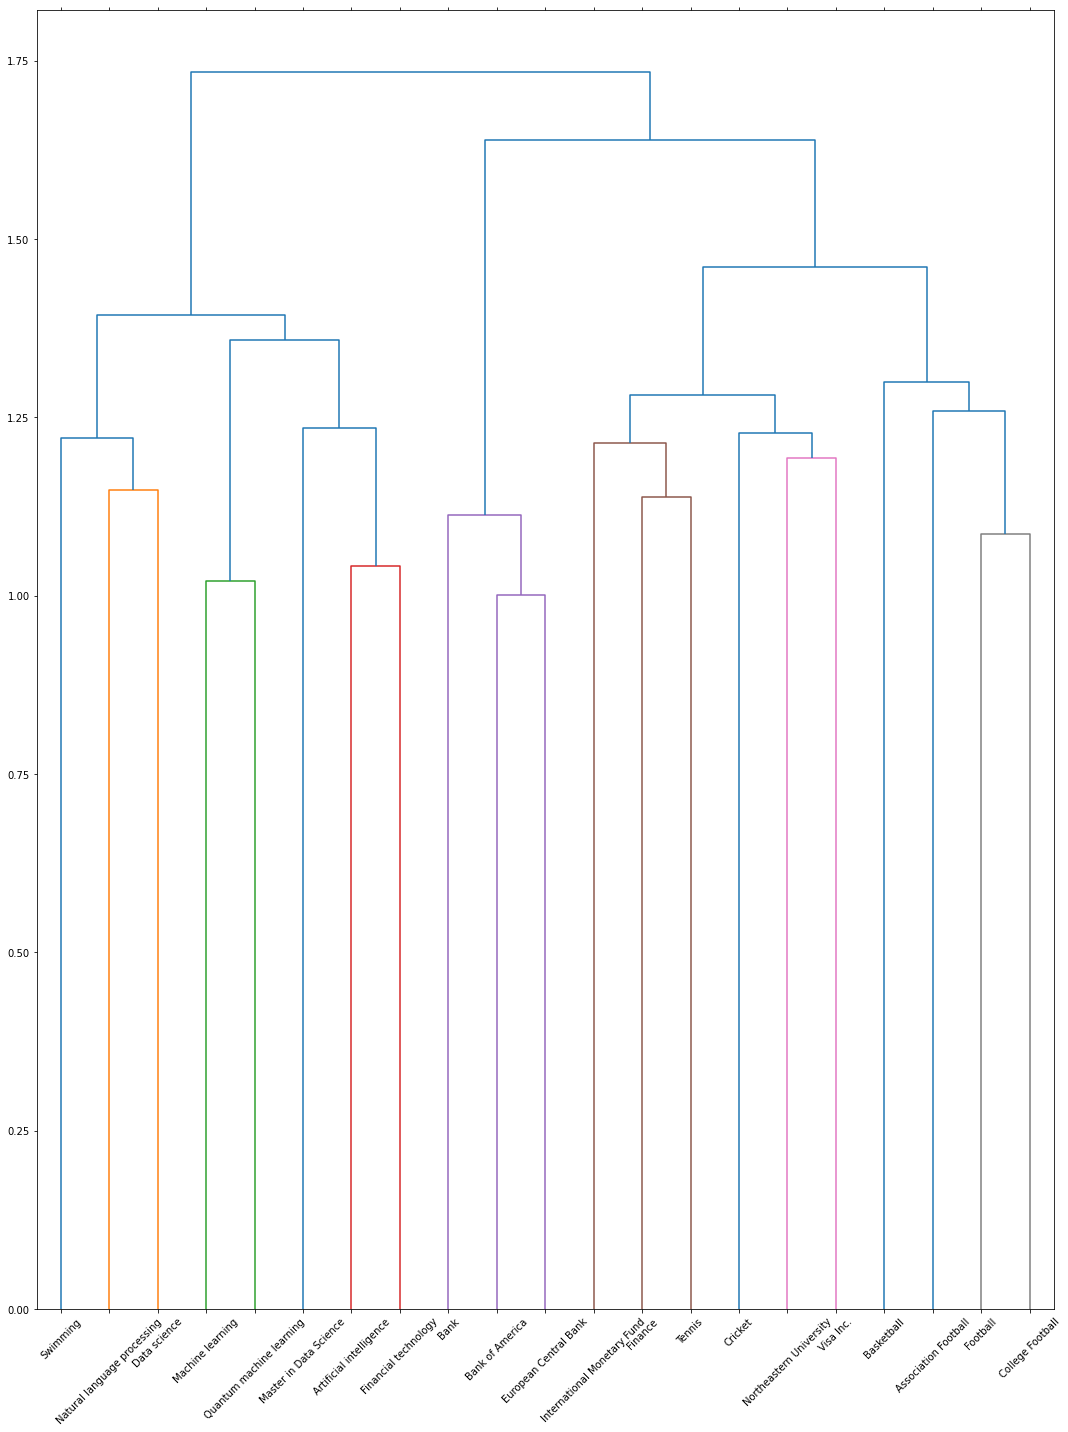

In [302]:
### importing the dependencies for dendrogram plotting ###
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import ward, dendrogram

### plot the dendrogram

from sklearn.metrics.pairwise import cosine_similarity

#1st try
# fig, ax = plt.subplots(figsize=(20, 10))
#plt.title("Dendrogram for articles")
# clusters = shc.linkage(X.toarray(), 
#             method='ward', 
#             metric="euclidean")
# shc.dendrogram(Z=clusters)
# plt.show()


#2nd try
dist = 1 - cosine_similarity(X)
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, labels=topics);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#3rd try
# X_principal = pd.DataFrame(X.toarray())
# X_principal.columns = topics
# plt.figure(figsize =(15, 20))
# plt.title('Visualising the data')
# Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
    

### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

## Task 4

In this step, we will assign cluster lables to each document/group using Agglomerative Hierarchical clustering.
We can decide number of clusters based on the dendogram and our requirement (how many categories we want).(eg. n_clusters = 3) 

In [321]:
### importing dependencies for agglomerative clustering ###
from sklearn.cluster import AgglomerativeClustering

### perform agglomerative clustering on the vectors

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
y_hc = cluster.fit_predict(X.toarray())
print(y_hc)
### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

[0 2 4 4 7 7 7 5 0 5 5 7 3 3 6 2 3 1 1 1 0]


## Task 5

Now, we will try to visualize top 50 words in each cluster using word clouds

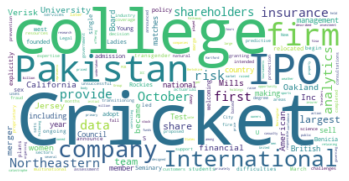

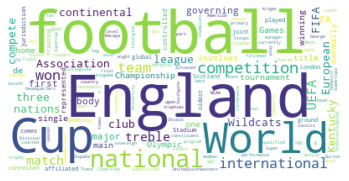

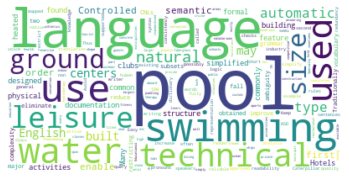

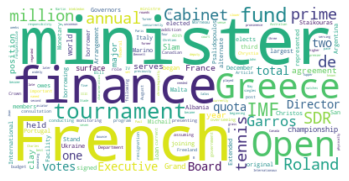

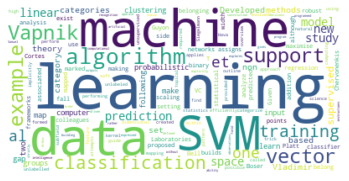

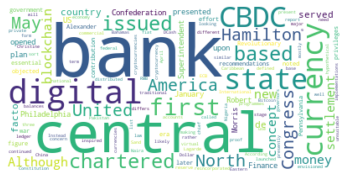

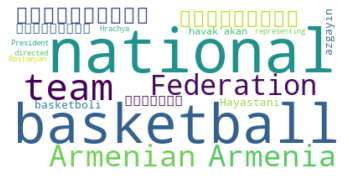

In [344]:
### importing dependencies for plotting clusters using wordcloud ###
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for i in range(7):
    cluster = np.where(y_hc == i)
#     print(cluster)
    text = ''
#     cluster = cluster.split()
#     print(np.array(cluster[i]))
#     print(len(np.array(cluster[0])))
    for index in range(len(np.array(cluster[0]))):
        text = text + " " + data[np.array(cluster[0][index])]
    #print(text)    
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    
# text = " ".join(each_data for each_data in data)    
# word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)


# ### plot the clusters using word clouds
# plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()
### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

***Question*** : Comment on the clusters formed above. Does they make any sense?

## Ques 3) Parts of speech tagging. 

Parts of Speech Tagging is the process of the assigning a parts of speech tag (noun, adjective etc..,) to each word in the input sentence. <br>

In this question we will be building HMMs and Viterbi Algorithm. 

### About the Dataset: <br>

For this task we will be using tagged datasets collected from Wall Street Journal. <br>

The file train.pos will be used for training and test.pos will for testing. Along with these two we will be providing vocab.txt the words in this file are the words from the training set that were used two or more times.<br>

The dataset will contain different tags like JJ which means adjective, DT means determiner etc.., for better understaning of the tags refer to [this link](http://relearn.be/2015/training-common-sense/sources/software/pattern-2.6-critical-fork/docs/html/mbsp-tags.html)

In [372]:
##############################################################################################
##### Dont change anything in this code cell , only change the data paths accordingly  #######
##############################################################################################

#Importing necessary packages

import pandas as pd
from collections import defaultdict
import math
import numpy as np
import string

# Punctuation characters
punct = set(string.punctuation)

# Morphology rules used to assign unknown word tokens
noun_suffix = ["action", "age", "ance", "cy", "dom", "ee", "ence", "er", "hood", "ion", "ism", "ist", "ity", "ling", "ment", "ness", "or", "ry", "scape", "ship", "ty"]
verb_suffix = ["ate", "ify", "ise", "ize"]
adj_suffix = ["able", "ese", "ful", "i", "ian", "ible", "ic", "ish", "ive", "less", "ly", "ous"]
adv_suffix = ["ward", "wards", "wise"]

# Utility functions which we further need

def get_word_tag(line, vocab): 
    if not line.split():
        word = "--n--"
        tag = "--s--"
        return word, tag
    else:
        word, tag = line.split()
        if word not in vocab: 
            # Handle unknown words
            word = assign_unk(word)
        return word, tag
    return None 


def preprocess(vocab, data_fp):
    """
    Preprocess data
    """
    orig = []
    prep = []

    # Read data
    with open(data_fp, "r") as data_file:

        for cnt, word in enumerate(data_file):

            # End of sentence
            if not word.split():
                orig.append(word.strip())
                word = "--n--"
                prep.append(word)
                continue

            # Handle unknown words
            elif word.strip() not in vocab:
                orig.append(word.strip())
                word = assign_unk(word)
                prep.append(word)
                continue

            else:
                orig.append(word.strip())
                prep.append(word.strip())

    assert(len(orig) == len(open(data_fp, "r").readlines()))
    assert(len(prep) == len(open(data_fp, "r").readlines()))

    return orig, prep


def assign_unk(tok):
    """
    Assign unknown word tokens
    """
    # Digits
    if any(char.isdigit() for char in tok):
        return "--unk_digit--"

    # Punctuation
    elif any(char in punct for char in tok):
        return "--unk_punct--"

    # Upper-case
    elif any(char.isupper() for char in tok):
        return "--unk_upper--"

    # Nouns
    elif any(tok.endswith(suffix) for suffix in noun_suffix):
        return "--unk_noun--"

    # Verbs
    elif any(tok.endswith(suffix) for suffix in verb_suffix):
        return "--unk_verb--"

    # Adjectives
    elif any(tok.endswith(suffix) for suffix in adj_suffix):
        return "--unk_adj--"

    # Adverbs
    elif any(tok.endswith(suffix) for suffix in adv_suffix):
        return "--unk_adv--"

    return "--unk--"


# for viterbi
def compute_accuracy(pred, y):
    '''
    Input: 
        pred: a list of the predicted parts-of-speech 
        y: a list of lines where each word is separated by a '\t' (i.e. word \t tag)
    Output: 
        
    '''
    num_correct = 0
    total = 0
    
    # Zip together the prediction and the labels
    for prediction, y in zip(pred, y):
        ### START CODE HERE (Replace instances of 'None' with your code) ###
        # Split the label into the word and the POS tag
        word_tag_tuple = y.split()
        
        # Check that there is actually a word and a tag
        # no more and no less than 2 items
        if len(word_tag_tuple)!=2: # complete this line
            continue 

        # store the word and tag separately
        word, tag = word_tag_tuple
        
        # Check if the POS tag label matches the prediction
        if prediction == tag: # complete this line
            
            # count the number of times that the prediction
            # and label match
            num_correct += 1
            
        # keep track of the total number of examples (that have valid labels)
        total += 1
        
        ### END CODE HERE ###
    return num_correct/total


# load in the training corpus
with open("training.pos.txt", 'r') as f:
    training_corpus = f.readlines()

# read the vocabulary data, split by each line of text, and save the list
with open("vocab.txt", 'r') as f:
    voc_l = f.read().split('\n')

# vocab: dictionary that has the index of the corresponding words
vocab = {} 

# Get the index of the corresponding words. 
for i, word in enumerate(sorted(voc_l)): 
    vocab[word] = i       
    

cnt = 0
for k,v in vocab.items():
    cnt += 1
    if cnt > 20:
        break

# load in the test corpus
with open("test.pos.txt", 'r') as f:
    y = f.readlines()

#corpus without tags, preprocessed
_, prep = preprocess(vocab, "test.words.txt")



### Task 3.1 

In this task we are expected to build a function which takes training_corpus as input and return transition counts, emission counts and tag counts. <br> 



1. `Tranition count`: maps prev_tag, tag) to the number of times it has appeared.
2. `Emission_counts`: maps (tag, word) to the number of times it appeared.
3. `Tag_counts`: maps (tag) to the number of times it has occured.



In [373]:
emission_counts = {}
transition_counts = {}
tag_counts = {}
states = []

In [374]:
def create_dictionaries(training_corpus, vocab):
    """
    Input: 
        training_corpus: a corpus where each line has a word followed by its tag.
        vocab: a dictionary where keys are words in vocabulary and value is an index
    Output: 
        emission_counts: a dictionary where the keys are (tag, word) and the values are the counts
        transition_counts: a dictionary where the keys are (prev_tag, tag) and the values are the counts
        tag_counts: a dictionary where the keys are the tags and the values are the counts
    """
    
    # initialize the dictionaries using defaultdict
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)
    
    # Initialize "prev_tag" (previous tag) with the start state, denoted by '--s--'
    prev_tag = '--s--' 
    
    # use 'i' to track the line number in the corpus
    i = 0 
    
    # Each item in the training corpus contains a word and its POS tag
    # Go through each word and its tag in the training corpus
    for word_tag in training_corpus:
        
        # Increment the word_tag count
        i += 1
            
        ### START CODE HERE (Replace instances of 'None' with your code) ###
        # get the word and tag using the get_word_tag helper function
        word, tag = get_word_tag(word_tag, vocab)
        
        # Increment the transition count for the previous word and tag
        tag_tuple = (prev_tag, tag)
        if(transition_counts.get(tag_tuple) == None):
            transition_counts[tag_tuple] = 0
        transition_counts[tag_tuple] += 1    
        # Increment the emission count for the tag and word
        word_tag_tuple = (tag, word)
        if(emission_counts.get(word_tag_tuple) == None):
            emission_counts[word_tag_tuple] = 0
        emission_counts[word_tag_tuple] += 1    
            
        # Increment the tag count
        if(tag_counts.get(tag) == None):
            tag_counts[tag] = 0
        tag_counts[tag] += 1 
            
        # Set the previous tag to this tag (for the next iteration of the loop)
        prev_tag = tag
        
        ### END CODE HERE ###
        
    return emission_counts, transition_counts, tag_counts

In [375]:
emission_counts, transition_counts, tag_counts = create_dictionaries(training_corpus, vocab)
# emission_list = list(emission_counts) 
# print(emission_list)

In [376]:
# get all the POS states. States are parts of speech designation found in the training dataset.
states = sorted(tag_counts.keys())
print(f"Number of POS tags (number of 'states'): {len(states)}")
print("View these POS tags (states)")
print(states)

Number of POS tags (number of 'states'): 46
View these POS tags (states)
['#', '$', "''", '(', ')', ',', '--s--', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']


##### Expected Output

```CPP
Number of POS tags (number of 'states'46
View these states
['#', '$', "''", '(', ')', ',', '--s--', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']
```

In [377]:
print("transition examples: ")
for ex in list(transition_counts.items())[:3]:
    print(ex)
print()

print("emission examples: ")
for ex in list(emission_counts.items())[:3]:
    print (ex)
print()

print("ambiguous word example: ")
for tup,cnt in list(emission_counts.items())[:3]:
    print(tup, cnt) 

transition examples: 
(('--s--', 'IN'), 5050)
(('IN', 'DT'), 32364)
(('DT', 'NNP'), 9044)

emission examples: 
(('IN', 'In'), 1735)
(('DT', 'an'), 3142)
(('NNP', 'Oct.'), 317)

ambiguous word example: 
('IN', 'In') 1735
('DT', 'an') 3142
('NNP', 'Oct.') 317



##### Expected Output

```CPP
transition examples: 
(('--s--', 'IN'), 5050)
(('IN', 'DT'), 32364)
(('DT', 'NNP'), 9044)

emission examples: 
(('IN', 'In'), 1735)
(('DT', 'an'), 3142)
(('NNP', 'Oct.'), 317)

ambiguous word example: 
('IN', 'In') 1735
('DT', 'an') 3142
('NNP', 'Oct.') 317
```

### Task 3.2: 

You need to complete the `predict_pos` function below which takes preprocessed test corpus (prep), Original tagged test corpus `y`, emission counts, vocab and states. <br>

Ultimately in this function for a given preprocessed test corpus, you will assign a parts-of-speech tag to every word in that corpus. Using the original tagged test corpus, you will then compute what percent of the tags you got correct. <br>

In [380]:
def predict_pos(prep, y, emission_counts, vocab, states):
    '''
    Input: 
        prep: a preprocessed version of 'y'. A list with the 'word' component of the tuples.
        y: a corpus composed of a list of tuples where each tuple consists of (word, POS)
        emission_counts: a dictionary where the keys are (tag,word) tuples and the value is the count
        vocab: a dictionary where keys are words in vocabulary and value is an index
        states: a sorted list of all possible tags for this assignment
    Output: 
        accuracy: Number of times you classified a word correctly
    '''
    
#     # Initialize the number of correct predictions to zero
#     # Get the (tag, word) tuples, stored as a set
#     correct_predictions = 0
#     tag_word_tuple = set(emission_counts)
# #     for tag in y:
# #         print(tag)
# #     print(prep)
#     vocab_list = list(vocab)
#     for each_word in vocab_list:
#         for tag_word in tag_word_tuple:
#             tag = tag_word[0]
#             word =  tag_word[1]
#             if each_word == word:
#                 for word_tag in y:
#                     main_word, main_tag = get_word_tag(word_tag, vocab)
#                     if main_word == word and tag == main_tag:
#                         correct_predictions += 1
           
                
       
#     ### END CODE HERE ###
#     accuracy = correct_predictions / len(vocab_list)

# Initialize the number of correct predictions to zero
    num_correct = 0
    
    # Get the (tag, word) tuples, stored as a set
    all_words = set(emission_counts.keys())
    
    # Get the number of (word, POS) tuples in the corpus 'y'
    total = len(y)
    for word, y_tup in zip(prep, y): 

        # Split the (word, POS) string into a list of two items
        y_tup_l = y_tup.split()
        
        # Verify that y_tup contain both word and POS
        if len(y_tup_l) == 2:
            
            # Set the true POS label for this word
            true_label = y_tup_l[1]

        else:
            # If the y_tup didn't contain word and POS, go to next word
            continue
    
        count_final = 0
        pos_final = ''
        
        # If the word is in the vocabulary...
        if word in vocab:
            for pos in states:

            ### START CODE HERE (Replace instances of 'None' with your code) ###
                        
                # define the key as the tuple containing the POS and word
                key = (pos, word)

                # check if the (pos, word) key exists in the emission_counts dictionary
                if key in emission_counts: # complete this line

                # get the emission count of the (pos,word) tuple 
                    count = emission_counts[key]

                    # keep track of the POS with the largest count
                    if count > count_final: # complete this line

                        # update the final count (largest count)
                        count_final = count

                        # update the final POS
                        pos_final = pos

            # If the final POS (with the largest count) matches the true POS:
            if pos_final == true_label: # complete this line
                
                # Update the number of correct predictions
                num_correct += 1
            
    ### END CODE HERE ###
    accuracy = num_correct / total
    
    return accuracy

In [381]:
accuracy_predict_pos = predict_pos(prep, y, emission_counts, vocab, states)
print(f"Accuracy of prediction using predict_pos is {accuracy_predict_pos:.4f}")

Accuracy of prediction using predict_pos is 0.8889


##### Expected Output

```CPP
Accuracy of prediction using predict_pos is 0.8889
```

### Task 3.3 Building Hidden Markov Models for POS.

**Hidden Markov Models** (HMMs) are a class of probabilistic graphical model that allow us to predict a sequence of unknown (hidden) variables from a set of observed variables. <br>

The Markov Model contains a number of states and the probability of transition between those states. 
- In this case, the states are the parts-of-speech. 
- A Markov Model utilizes a transition matrix, `A`. 
- A Hidden Markov Model adds an observation or emission matrix `B` which describes the probability of a visible observation when we are in a particular state. 
- In this case, the emissions are the words in the corpus
- The state, which is hidden, is the POS tag of that word.


### Creating the 'A' transition probabilities matrix

We will be using Smoothing to compute the matrix. 

The smoothing was done as follows: 

$$ P(t_i | t_{i-1}) = \frac{C(t_{i-1}, t_{i}) + \alpha }{C(t_{i-1}) +\alpha * N}$$

- $N$ is the total number of tags
- $C(t_{i-1}, t_{i})$ is the count of the tuple (previous POS, current POS) in `transition_counts` dictionary.
- $C(t_{i-1})$ is the count of the previous POS in the `tag_counts` dictionary.
- $\alpha$ is a smoothing parameter.

In [382]:
# GRADED FUNCTION: create_transition_matrix
def create_transition_matrix(alpha, tag_counts, transition_counts):
    ''' 
    Input: 
        alpha: number used for smoothing
        tag_counts: a dictionary mapping each tag to its respective count
        transition_counts: transition count for the previous word and tag
    Output:
        A: matrix of dimension (num_tags,num_tags)
    '''
    
    num_tags = len(tag_counts)
    A = np.zeros((num_tags, num_tags))
    # Create sorted version of the tag's list
    sorted_tags = sorted(states)
    

    ### Your Code Goes Here ###
    for i in range(num_tags):
        for j in range(num_tags):
#             print(sorted_tags[i])
#             print(sorted_tags[j])
            prev_current_tag = tuple([sorted_tags[i],sorted_tags[j]])
            A[i][j] = (transition_counts[prev_current_tag] + alpha) / (tag_counts[sorted_tags[i]] + (alpha * num_tags))   
    return A

In [383]:
alpha = 0.001
A = create_transition_matrix(alpha, tag_counts, transition_counts)
# Testing your function
print(f"A at row 0, col 0: {A[0,5]:.9f}")
print(f"A at row 3, col 1: {A[3,6]:.4f}")

print("View a subset of transition matrix A")
A_sub = pd.DataFrame(A[10:15,10:15], index=states[10:15], columns = states[10:15] )
print(A_sub)

A at row 0, col 0: 0.007047013
A at row 3, col 1: 0.0000
View a subset of transition matrix A
          CD        DT            EX        FW        IN
CD  0.201542  0.028850  2.734628e-08  0.000055  0.089997
DT  0.022922  0.001576  1.221866e-08  0.000257  0.009665
EX  0.000001  0.002319  1.158687e-06  0.000001  0.000001
FW  0.000004  0.008550  4.272664e-06  0.239273  0.029913
IN  0.059328  0.328388  1.582898e-03  0.000203  0.020415


#### Expected Output: 

```CPP
A at row 0, col 0: 0.007047013
A at row 3, col 1: 0.0000
View a subset of transition matrix A
          CD        DT            EX        FW        IN
CD  0.201542  0.028850  2.734628e-08  0.000055  0.089997
DT  0.022922  0.001576  1.221866e-08  0.000257  0.009665
EX  0.000001  0.002319  1.158687e-06  0.000001  0.000001
FW  0.000004  0.008550  4.272664e-06  0.239273  0.029913
IN  0.059328  0.328388  1.582898e-03  0.000203  0.020415
```

### Creating 'B' emission probabilities matrix

Now you will create the `B` transition matrix which computes the emission probability. 

You will use smoothing as defined below: 

$$P(w_i | t_i) = \frac{C(t_i, word_i)+ \alpha}{C(t_{i}) +\alpha * N}\$$

- $C(t_i, word_i)$ is the number of times $word_i$ was associated with $tag_i$ in the training data (stored in `emission_counts` dictionary).
- $C(t_i)$ is the number of times $tag_i$ was in the training data (stored in `tag_counts` dictionary).
- $N$ is the number of words in the vocabulary
- $\alpha$ is a smoothing parameter. 

The matrix `B` is of dimension (num_tags, N), where num_tags is the number of possible parts-of-speech tags. 

In [384]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: create_emission_matrix

def create_emission_matrix(alpha, tag_counts, emission_counts, vocab):
    '''
    Input: 
        alpha: tuning parameter used in smoothing 
        tag_counts: a dictionary mapping each tag to its respective count
        emission_counts: a dictionary where the keys are (tag, word) and the values are the counts
        vocab: a dictionary where keys are words in vocabulary and value is an index
    Output:
        B: a matrix of dimension (num_tags, len(vocab))
    '''
    num_tags = len(tag_counts)
    B = np.zeros((num_tags, len(vocab)))
    # Create sorted version of the tag's list
    

    #B = np.zeros((num_tags, len(vocab)))
    sorted_tags = sorted(states)
    vocab_list = list(vocab)

    # Create sorted version of the tag's list
   
    
    for i in range(num_tags):
        for j in range(len(vocab)):

            prev_current_tag = tuple([sorted_tags[i],vocab_list[j]])
            B[i][j] = (emission_counts[prev_current_tag] + alpha) / (tag_counts[sorted_tags[i]] + (alpha * len(vocab))) 
    

    return B

In [385]:
# creating your emission probability matrix. this takes a few minutes to run. 
B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocab))

print(f"View Matrix position at row 0, column 0: {B[0,0]:.9f}")
print(f"View Matrix position at row 3, column 1: {B[3,1]:.9f}")

# Try viewing emissions for a few words in a sample dataframe
cidx  = ['725','adroitly','engineers', 'promoted', 'synergy']

# Get the integer ID for each word
cols = [vocab[a] for a in cidx]

# Choose POS tags to show in a sample dataframe
rvals =['CD','NN','NNS', 'VB','RB','RP']

# For each POS tag, get the row number from the 'states' list
rows = [states.index(a) for a in rvals]

# Get the emissions for the sample of words, and the sample of POS tags
B_sub = pd.DataFrame(B[np.ix_(rows,cols)], index=rvals, columns = cidx )
print(B_sub)

View Matrix position at row 0, column 0: 0.000006032
View Matrix position at row 3, column 1: 0.000000720
              725      adroitly     engineers      promoted       synergy
CD   8.201296e-05  2.732854e-08  2.732854e-08  2.732854e-08  2.732854e-08
NN   7.521128e-09  7.521128e-09  7.521128e-09  7.521128e-09  2.257091e-05
NNS  1.670013e-08  1.670013e-08  4.676203e-04  1.670013e-08  1.670013e-08
VB   3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08
RB   3.226454e-08  6.456135e-05  3.226454e-08  3.226454e-08  3.226454e-08
RP   3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07


#### Expected Output: 

```CPP
View Matrix position at row 0, column 0: 0.000006032
View Matrix position at row 3, column 1: 0.000000720
              725      adroitly     engineers      promoted       synergy
CD   8.201296e-05  2.732854e-08  2.732854e-08  2.732854e-08  2.732854e-08
NN   7.521128e-09  7.521128e-09  7.521128e-09  7.521128e-09  2.257091e-05
NNS  1.670013e-08  1.670013e-08  4.676203e-04  1.670013e-08  1.670013e-08
VB   3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08
RB   3.226454e-08  6.456135e-05  3.226454e-08  3.226454e-08  3.226454e-08
RP   3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07
```

### Task 3.4 Viterbi Algorithm

In this part of the assignment you will implement the Viterbi algorithm. Specifically, you will use your two matrices, `A` and `B` to compute the Viterbi algorithm. 

We have decomposed this process into three main parts. 

* **Initialization** - In this part you initialize the `best_paths` and `best_probabilities` matrices that you will be populating in `feed_forward`.
* **Feed forward** - At each step, you calculate the probability of each path happening and the best paths up to that point. 
* **Feed backward**: This allows you to find the best path with the highest probabilities. 

### Task 3.4.1 Initialization 
Write a program below that initializes the `best_probs` and the `best_paths` matrix. 

Both matrices will be initialized to zero except for column zero of `best_probs`.  
- Column zero of `best_probs` is initialized with the assumption that the first word of the corpus was preceded by a start token ("--s--"). 
- This allows you to reference the **A** matrix for the transition probability

Here is how to initialize column 0 of `best_probs`:
- The probability of the best path going from the start index to a given POS tag indexed by integer $i$ is denoted by $\textrm{best_probs}[s_{idx}, i]$.
- This is estimated as the probability that the start tag transitions to the POS denoted by index $i$: $\mathbf{A}[s_{idx}, i]$ AND that the POS tag denoted by $i$ emits the first word of the given corpus, which is $\mathbf{B}[i, vocab[corpus[0]]]$.
- Note that vocab[corpus[0]] refers to the first word of the corpus (the word at position 0 of the corpus). 
- **vocab** is a dictionary that returns the unique integer that refers to that particular word.


In [394]:
import math

# GRADED FUNCTION: initialize
def initialize(states, tag_counts, A, B, corpus, vocab):
    '''
    Input: 
        states: a list of all possible parts-of-speech
        tag_counts: a dictionary mapping each tag to its respective count
        A: Transition Matrix of dimension (num_tags, num_tags)
        B: Emission Matrix of dimension (num_tags, len(vocab))
        corpus: a sequence of words whose POS is to be identified in a list 
        vocab: a dictionary where keys are words in vocabulary and value is an index
    Output:
        best_probs: matrix of dimension (num_tags, len(corpus)) of floats
        best_paths: matrix of dimension (num_tags, len(corpus)) of integers
    '''
    
#     sorted_tags = sorted(states)
    
#     num_tags = len(tag_counts)
#     best_probs = np.zeros((num_tags, len(corpus)))
#     best_paths = np.zeros((num_tags, len(corpus)))

#     #### Your code goes here ####
#     tag_list = list(tag_counts)
#     start_tag_index = sorted_tags.index("--s--")
#     vocab_list = list(vocab)
#     word_index = vocab_list.index(corpus[0])
#     for i in range(num_tags):
#         if A[start_tag_index][i] != 0.0:
#            best_probs[i][0] = math.log(A[start_tag_index][i]) + math.log(B[i][word_index])
#         else:
#            best_probs[i][0] =  float('-inf')          
#     return best_probs, best_paths


 # Get the total number of unique POS tags
    num_tags = len(tag_counts)
    
    # Initialize best_probs matrix 
    # POS tags in the rows, number of words in the corpus as the columns
    best_probs = np.zeros((num_tags, len(corpus)))
    
    # Initialize best_paths matrix
    # POS tags in the rows, number of words in the corpus as columns
    best_paths = np.zeros((num_tags, len(corpus)), dtype=int)
    
    # Define the start token
    s_idx = states.index("--s--")
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Go through each of the POS tags
    for i in range(num_tags): # complete this line
        
        # Handle the special case when the transition from start token to POS tag i is zero
        if A[s_idx,i] == 0: # complete this line
            
            # Initialize best_probs at POS tag 'i', column 0, to negative infinity
            best_probs[i,0] = float('-inf')
        
        # For all other cases when transition from start token to POS tag i is non-zero:
        else:
            
            # Initialize best_probs at POS tag 'i', column 0
            # Check the formula in the instructions above
            best_probs[i,0] = math.log(A[s_idx,i]) + math.log(B[i, vocab[corpus[0]]])
                        
    ### END CODE HERE ### 
    return best_probs, best_paths

In [395]:
best_probs, best_paths = initialize(states, tag_counts, A, B, prep, vocab)
print(best_probs)
print(best_probs.shape)

[[-22.60982633   0.           0.         ...   0.           0.
    0.        ]
 [-23.07660654   0.           0.         ...   0.           0.
    0.        ]
 [-23.57298822   0.           0.         ...   0.           0.
    0.        ]
 ...
 [-22.75551606   0.           0.         ...   0.           0.
    0.        ]
 [-19.6637215    0.           0.         ...   0.           0.
    0.        ]
 [-18.36288463   0.           0.         ...   0.           0.
    0.        ]]
(46, 34199)


In [396]:
# Test the function
print(f"best_probs[0,0]: {best_probs[0,0]:.4f}") 
print(f"best_paths[2,3]: {best_paths[2,3]:.4f}")

best_probs[0,0]: -22.6098
best_paths[2,3]: 0.0000


#### Expected Output: 

```CPP
best_probs[0,0]: -22.6098
best_paths[2,3]: 0.0000
```

### Task 3.4.2 Viterbi Forward Implementation

In this part of the assignment, you will implement the `viterbi_forward` segment. In other words, you will populate your `best_probs` and `best_paths` matrices.
- Walk forward through the corpus.
- For each word, compute a probability for each possible tag. 

Store the best_path and best_prob for every possible tag for each word in the matrices `best_probs` and `best_tags` using the pseudo code below.

`for each word in the corpus

    for each POS tag type that this word may be
    
        for POS tag type that the previous word could be
        
            compute the probability that the previous word had a given POS tag, that the current word has a given POS tag, and that the POS tag would emit this current word.
            
            retain the highest probability computed for the current word
            
            set best_probs to this highest probability
            
            set best_paths to the index 'k', representing the POS tag of the previous word which produced the highest probability `

In [397]:
import math
def viterbi_forward(A, B, test_corpus, best_probs, best_paths, vocab, corpus):
    '''
    Input: 
        A, B: The transiton and emission matrices respectively
        test_corpus: a list containing a preprocessed corpus
        best_probs: an initilized matrix of dimension (num_tags, len(corpus))
        best_paths: an initilized matrix of dimension (num_tags, len(corpus))
        vocab: a dictionary where keys are words in vocabulary and value is an index 
    Output: 
        best_probs: a completed matrix of dimension (num_tags, len(corpus))
        best_paths: a completed matrix of dimension (num_tags, len(corpus))
    '''

#     num_tags = len(best_probs)
#     sorted_tags = sorted(states)
#     for i in range(len(test_corpus)): 
#         current_probability = float('-inf') 
#         for j in range(num_tags):
#             if i != 0:
#                 for k in range(num_tags):
#                     if best_probs[k][i - 1] <= 0:
#                         probability = math.log(A[k][j]) 
#                         + math.log(B[j][vocab[test_corpus[i]]])
#                     else: 
#                         probability = math.log(best_probs[k][i - 1]) + math.log(A[k][j]) 
#                     + math.log(B[j][vocab[test_corpus[i]]])
# #                     print(probability)
# #                     print(current_probability)
#                     if probability > current_probability:
#                         current_probability = probability
#                         best_paths[j][i] = k
# #                     else:
# #                         best_paths[j][i] = i
#         best_probs[j][i] = current_probability     


     # Get the number of unique POS tags (which is the num of rows in best_probs)
    num_tags = best_probs.shape[0]
    
    # Go through every word in the corpus starting from word 1
    # Recall that word 0 was initialized in `initialize()`
    for i in range(1, len(test_corpus)): 
        
        # Print number of words processed, every 5000 words
        if i % 5000 == 0:
            print("Words processed: {:>8}".format(i))
            
        ### START CODE HERE (Replace instances of 'None' with your code EXCEPT the first 'best_path_i = None') ###
        # For each unique POS tag that the current word can be
        for j in range(num_tags): # complete this line
            
            # Initialize best_prob for word i to negative infinity
            best_prob_i = float("-inf")
            
            # Initialize best_path for current word i to None
            best_path_i = None

            # For each POS tag that the previous word can be:
            for k in range(num_tags): # complete this line
            
                # Calculate the probability = 
                # best probs of POS tag k, previous word i-1 + 
                # log(prob of transition from POS k to POS j) + 
                # log(prob that emission of POS j is word i)
                prob = best_probs[k, i - 1] + math.log(A[k, j]) + math.log(B[j, vocab[test_corpus[i]]])

                # check if this path's probability is greater than
                # the best probability up to and before this point
                if prob > best_prob_i: # complete this line
                    
                    # Keep track of the best probability
                    best_prob_i = prob
                    
                    # keep track of the POS tag of the previous word
                    # that is part of the best path.  
                    # Save the index (integer) associated with 
                    # that previous word's POS tag
                    best_path_i = k

            # Save the best probability for the 
            # given current word's POS tag
            # and the position of the current word inside the corpus
            best_probs[j,i] = best_prob_i
            
            # Save the unique integer ID of the previous POS tag
            # into best_paths matrix, for the POS tag of the current word
            # and the position of the current word inside the corpus.
            best_paths[j,i] = best_path_i

        ### END CODE HERE ###
    return best_probs, best_paths
       
        
    return best_probs, best_paths

In [398]:
# this will take a few minutes to run => processes ~ 30,000 words
best_probs, best_paths = viterbi_forward(A, B, prep, best_probs, best_paths, vocab, prep)

Words processed:     5000
Words processed:    10000
Words processed:    15000
Words processed:    20000
Words processed:    25000
Words processed:    30000


In [399]:
# Test this function 
print(f"best_probs[0,1]: {best_probs[0,1]:.4f}") 
print(f"best_probs[0,4]: {best_probs[0,4]:.4f}") 

best_probs[0,1]: -24.7822
best_probs[0,4]: -49.5601


#### Expected Output: 

```CPP
best_probs[0,1]: -35.2828
best_probs[0,4]: -54.4040
```

### Task 3.4.3 Viterbi Backward Implementation

<a name='2.4'></a>
## Part 2.4 Viterbi backward

Now you will implement the Viterbi backward algorithm.
- The Viterbi backward algorithm gets the predictions of the POS tags for each word in the corpus using the `best_paths` and the `best_probs` matrices.

The example below shows how to walk backwards through the best_paths matrix to get the POS tags of each word in the corpus. Recall that this example corpus has three words: "Loss tracks upward".

POS tag for 'upward' is `RB`
- Select the the most likely POS tag for the last word in the corpus, 'upward' in the `best_prob` table.
- Look for the row in the column for 'upward' that has the largest probability.
- Notice that in row 28 of `best_probs`, the estimated probability is -34.99, which is larger than the other values in the column.  So the most likely POS tag for 'upward' is `RB` an adverb, at row 28 of `best_prob`. 
- The variable `z` is an array that stores the unique integer ID of the predicted POS tags for each word in the corpus.  In array z, at position 2, store the value 28 to indicate that the word 'upward' (at index 2 in the corpus), most likely has the POS tag associated with unique ID 28 (which is `RB`).
- The variable `pred` contains the POS tags in string form.  So `pred` at index 2 stores the string `RB`.


POS tag for 'tracks' is `VBZ`
- The next step is to go backward one word in the corpus ('tracks').  Since the most likely POS tag for 'upward' is `RB`, which is uniquely identified by integer ID 28, go to the `best_paths` matrix in column 2, row 28.  The value stored in `best_paths`, column 2, row 28 indicates the unique ID of the POS tag of the previous word.  In this case, the value stored here is 40, which is the unique ID for POS tag `VBZ` (verb, 3rd person singular present).
- So the previous word at index 1 of the corpus ('tracks'), most likely has the POS tag with unique ID 40, which is `VBZ`.
- In array `z`, store the value 40 at position 1, and for array `pred`, store the string `VBZ` to indicate that the word 'tracks' most likely has POS tag `VBZ`.

POS tag for 'Loss' is `NN`
- In `best_paths` at column 1, the unique ID stored at row 40 is 20.  20 is the unique ID for POS tag `NN`.
- In array `z` at position 0, store 20.  In array `pred` at position 0, store `NN`.


In [400]:
# GRADED FUNCTION: viterbi_backward
def viterbi_backward(best_probs, best_paths, corpus, states):
    '''
    This function returns the best path.
    
    '''
#     maxProb = float('-inf')
#     maxIndex = 0
   
#     #### Your Code Goes Here ####
    
#     arr = np.empty(len(corpus), dtype=float)
#     row = 0
#     probability = float("-inf")
#     pred = np.empty(len(corpus), dtype=object)
#     i = len(corpus) - 1
#     for j in range(len(states)):
#         if (probability < best_probs[j][i]):
#             probability = best_probs[j][i]
#             row = j
#     arr[i] = j
#     pred[i] = states[j]
#     for i in reversed(range(len(corpus))) :    
#         if i != len(corpus) - 1:
#             index = best_paths[row][i + 1]
#             arr[i] = index
#             print(index)
#             pred[i] = states[index]
#             row = index
#     return pred



# Get the number of words in the corpus
    # which is also the number of columns in best_probs, best_paths
    m = best_paths.shape[1] 
    
    # Initialize array z, same length as the corpus
    z = [None] * m
    
    # Get the number of unique POS tags
    num_tags = best_probs.shape[0]
    
    # Initialize the best probability for the last word
    best_prob_for_last_word = float('-inf')
    
    # Initialize pred array, same length as corpus
    pred = [None] * m
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    ## Step 1 ##
    
    # Go through each POS tag for the last word (last column of best_probs)
    # in order to find the row (POS tag integer ID) 
    # with highest probability for the last word
    for k in range(num_tags): # complete this line

        # If the probability of POS tag at row k 
        # is better than the previosly best probability for the last word:
        if best_probs[k, m - 1] > best_prob_for_last_word: # complete this line
            
            # Store the new best probability for the last word
            best_prob_for_last_word = best_probs[k, m - 1]
    
            # Store the unique integer ID of the POS tag
            # which is also the row number in best_probs
            z[m - 1] = k
            
    # Convert the last word's predicted POS tag
    # from its unique integer ID into the string representation
    # using the 'states' list
    # store this in the 'pred' array for the last word
    pred[m - 1] = states[k]
    
    ## Step 2 ##
    # Find the best POS tags by walking backward through the best_paths
    # From the last word in the corpus to the 0th word in the corpus
    for i in range(len(corpus) - 1, -1, -1): # complete this line
        
        # Retrieve the unique integer ID of
        # the POS tag for the word at position 'i' in the corpus
        pos_tag_for_word_i = z[i]
        
        # In best_paths, go to the row representing the POS tag of word i
        # and the column representing the word's position in the corpus
        # to retrieve the predicted POS for the word at position i-1 in the corpus
        z[i - 1] = best_paths[pos_tag_for_word_i, i]
        
        # Get the previous word's POS tag in string form
        # Use the 'states' list, 
        # where the key is the unique integer ID of the POS tag,
        # and the value is the string representation of that POS tag
        pred[i - 1] = states[z[i - 1]]
        
     ### END CODE HERE ###
    return pred

In [401]:
# Run and test your function
pred = viterbi_backward(best_probs, best_paths, prep, states)
m=len(pred)
print('The prediction for pred[-7:m-1] is: \n', prep[-7:m-1], "\n", pred[-7:m-1], "\n")
print('The prediction for pred[0:8] is: \n', pred[0:7], "\n", prep[0:7])

The prediction for pred[-7:m-1] is: 
 ['see', 'them', 'here', 'with', 'us', '.'] 
 ['VB', 'PRP', 'RB', 'IN', 'PRP', '.'] 

The prediction for pred[0:8] is: 
 ['DT', 'NN', 'POS', 'NN', 'MD', 'VB', 'VBN'] 
 ['The', 'economy', "'s", 'temperature', 'will', 'be', 'taken']


#### Expected Output: 

```CPP
The prediction for pred[-7:m-1] is: 
 ['see', 'them', 'here', 'with', 'us', '.'] 
 ['VB', 'PRP', 'RB', 'IN', 'PRP', '.'] 

The prediction for pred[0:8] is: 
 ['DT', 'NN', 'POS', 'NN', 'MD', 'VB', 'VBN'] 
 ['The', 'economy', "'s", 'temperature', 'will', 'be', 'taken']
```

### Predicting on the dataset and print accuracy

In [402]:
print('The word is:', prep[3])
print('Your prediction is:', pred[3])
print('Your corresponding label y is: ', y[3])
print(f"Accuracy of the Viterbi algorithm is {compute_accuracy(pred, y):.4f}")

The word is: temperature
Your prediction is: NN
Your corresponding label y is:  temperature	NN

Accuracy of the Viterbi algorithm is 0.9531


#### Expected Output: 

```CPP
The word is: points
Your prediction is: VBZ
Your corresponding label y is:  points	NNS

Accuracy of the Viterbi algorithm is 0.9531
```